# **EDA**
### **Mục tiêu**
### 1. Tổng quan và Kiểm định Tính toàn vẹn
Trước hết, chúng ta xác định quy mô của bài toán thông qua việc kiểm kê số lượng quan sát (rows) và các đặc trưng (columns). Quan trọng hơn, tính toàn vẹn của dữ liệu được đặt lên hàng đầu bằng cách rà soát các dòng trùng lặp và đánh giá mức độ đầy đủ của hồ sơ. Việc loại bỏ hay giữ lại các điểm dữ liệu trùng sẽ được luận giải dựa trên ngữ cảnh thực tế của bài toán để tránh gây nhiễu cho mô hình.

### 2. Định danh và Phân loại Thuộc tính
Chúng ta tiến hành lập danh mục cho tất cả các cột dữ liệu, xác định ý nghĩa nghiệp vụ và kiểm tra tính phù hợp của kiểu dữ liệu (data types). Những cột không mang lại giá trị dự báo hoặc chứa thông tin nhạy cảm/dư thừa sẽ được xem xét loại bỏ ngay từ bước này để tối ưu hóa hiệu suất tính toán.

### 3. Phân tích Chi tiết Biến số (Numerical Analysis)
Đối với các biến định lượng, chúng ta tập trung vào ba khía cạnh:
* **Hình dạng phân phối:** Sử dụng các biểu đồ (Histogram, Boxplot) và các chỉ số thống kê (Mean, Median, Std) để hiểu về độ lệch và xu hướng tập trung.
* **Xác định điểm dị biệt (Outliers):** Áp dụng phương pháp IQR hoặc Z-score để bóc tách các giá trị cực đoan, từ đó đánh giá xem chúng là sai số nhập liệu hay là những trường hợp đặc biệt cần lưu ý.
* **Tính hợp lý:** Kiểm tra các giới hạn vật lý của dữ liệu (ví dụ: tuổi không thể âm, giá bán không thể bằng 0).



### 4. Phân tích Chi tiết Biến phân loại (Categorical Analysis)
Đối với các biến định tính, mục tiêu là hiểu về sự đa dạng và tần suất của các danh mục. Chúng ta sẽ rà soát các lỗi không nhất quán trong định dạng (ví dụ: lỗi chính tả, viết hoa/thường) và đánh giá độ cân bằng của các lớp. Những hạng mục có tần suất quá thấp sẽ được cân nhắc gộp nhóm để tăng tính tổng quát cho mô hình.

### 5. Giải phẫu Dữ liệu thiếu (Missing Data Analysis)
Không chỉ dừng lại ở việc đếm số lượng giá trị thiếu, chúng ta sẽ đi sâu vào việc tìm hiểu mô hình mất mát dữ liệu (Missing patterns). Liệu dữ liệu thiếu là ngẫu nhiên hay có hệ thống? Từ đó, một chiến lược xử lý cụ thể (Xóa bỏ, Điền khuyết hay Giữ nguyên) sẽ được thiết lập cho từng cột dựa trên mức độ ảnh hưởng của chúng.

### 6. Khám phá Mối tương quan và Quy luật (Relationships)
Cuối cùng, chúng ta tìm kiếm các "mối liên kết" giữa các biến số. Thông qua ma trận tương quan (Correlation Matrix) và các bảng chéo (Cross-tabulations), chúng ta xác định các cặp biến có quan hệ cộng tuyến hoặc những yếu tố có ảnh hưởng mạnh mẽ nhất đến mục tiêu nghiên cứu. 

Kết thúc quá trình này, các "Red Flags" (dấu hiệu cảnh báo nguy hiểm) về chất lượng dữ liệu sẽ được liệt kê minh bạch, làm cơ sở vững chắc cho các quyết định trong phần Tiền xử lý dữ liệu tiếp theo.

# Set-up environment

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
sys.path.append("../utilities")

from explore_data import (
    analyze_numerical_statistics
)
from visualize import (
    plot_numerical_distributions
)


# Load data

In [72]:
df = pd.read_csv("../Data/cleaned.csv")
df.sample()


,title,description,location,address,street_name,price,area,date,air_conditioning,fridge,washing_machine,mezzanine,kitchen,wardrobe,bed,balcony,elevator,free_time,parking,url
11151,Phòng Trọ Ngã Tư Thủ Đức - Man Thiện,Phòng trọ giá rẻ bancol cửa sổ đón nắng FULL N...,"Đường Man Thiện Quận 9 Đường Man Thiện, Phường...",Quận 9 - Hồ Chí Minh,Man Thiện,4.3,27.0,2025-02-23,0,0,1,0,0,0,0,1,0,0,1,https://phongtro123.com/phong-tro-nga-tu-thu-d...


# I. Dataset Overview


## 1. Basic Information

In [73]:
num_rows, num_cols = df.shape
size = num_rows * num_cols
print(f'Số hàng: {num_rows}')
print(f'Số cột: {num_cols}')
print(f'Overall size: {size}')
print('Mỗi dòng đại diện: Thông tin cho thuê phòng trọ')


Số hàng: 24121
Số cột: 20
Overall size: 482420
Mỗi dòng đại diện: Thông tin cho thuê phòng trọ


In [74]:
duplicate = df.duplicated().sum()
rows_empty = df.isnull().all(axis = 1).sum()
print(f'Số dòng trùng: {duplicate}')
print(f'Số dòng trống: {rows_empty}')


Số dòng trùng: 135
Số dòng trống: 0


Có thể do bị đăng lại nhiều lần hoặc do có dữ liệu mới đẩy bài đăng xuống khiến cho bị trùng khi thu thập dữ liệu do đó ta sẽ xóa bớt các dòng trùng

In [75]:
df = df.drop_duplicates()


## 2. Column Inventory


### Column Definitions

| Column | Definition |
| :--- | :--- |
| **title** | Tiêu đề bài đăng cho thuê. |
| **description**| Mô tả chi tiết thêm . |
| **location**| Địa chỉ chi tiết của bất động sản. |
| **address** | Địa chỉ 2 cấp của bất động sản (quận và thành phố). |
| **street_name** | Tên đường. |
| **price** | Giá cho thuê (VNĐ/Tháng). |
| **area** | Diện tích sử dụng ($m^2$). |
| **date** | Ngày đăng tin. |
| **air_conditioning** | Có máy lạnh không? (0: Không, 1: Có) |
| **fridge** | Có tủ lạnh không? (0: Không, 1: Có) |
| **washing_machine** | Có máy giặt không? (0: Không, 1: Có) |
| **mezzanine** | Có gác lửng không? (0: Không, 1: Có) |
| **kitchen** | Có kệ bếp không? (0: Không, 1: Có) |
| **wardrobe** | Có tủ quần áo không? (0: Không, 1: Có) |
| **bed** | Có giường không? (0: Không, 1: Có) |
| **balcony** | Có ban công không? (0: Không, 1: Có) |
| **elevator** | Có thang máy không? (0: Không, 1: Có) |
| **free_time** | Giờ giấc tự do/không giới nghiêm? (0: Không, 1: Có) |
| **parking** | Có chỗ để xe không? (0: Không, 1: Có) |
| **url** | Đường dẫn gốc tới bài đăng. |
			
### 2. Which columns are relevant to potential analysis?

Để xây dựng mô hình dự đoán và phân tích giá thuê, các cột dữ liệu được phân loại dựa trên vai trò của chúng trong mô hình như sau:

* **Target Variable:**
    * `price`: Giá cho thuê (VNĐ/Tháng) - Đây là giá trị cần dự đoán (Label).

* **Input Features:**
    * **Nhóm Vị trí & Diện tích:**
        * `area`, `address` (Quận), `street_name`.
        * **Ý nghĩa:** Đây là các đặc trưng quan trọng nhất . Vị trí địa lý và diện tích sử dụng là hai yếu tố cốt lõi quyết định phần lớn giá trị của bất động sản.

    * **Nhóm Tiện ích & Nội thất:**
        * `air_conditioning`, `mezzanine`, `elevator`, `parking`, `washing_machine`, `fridge`, `bed`, `wardrobe`, `kitchen`, `balcony`.
        * **Ý nghĩa:** Sự hiện diện của các tiện ích này (dạng Binary 0/1) giúp phân loại phân khúc phòng (Cao cấp vs Bình dân) và giải thích các biến động giá chi tiết trong cùng một khu vực.

    * **Nhóm Thời gian:**
        * `date`.
        * **Ý nghĩa:** Cần thiết để phân tích xu hướng giá theo thời gian (Trend Analysis) hoặc tính toán tuổi thọ của tin đăng (Recency).

    * **Nhóm Thông tin bổ trợ:**
        * `description`, `location`.
        * **Ý nghĩa:** Chứa các thông tin tiềm ẩn . Có thể sử dụng kỹ thuật NLP (như TF-IDF hoặc Embedding) để trích xuất thêm đặc trưng nhằm cải thiện độ chính xác của mô hình.

### 3. Are there any columns that should be dropped?

| Column | Action | Reason & Solution |
| :--- | :--- | :--- |
| **url** | **Drop** | **Lý do:** Đây là dữ liệu định danh kỹ thuật, mang tính chất duy nhất cho mỗi bài đăng và không chứa thông tin tổng quát về đặc điểm căn nhà.<br>**Giải pháp:** Xóa khỏi tập dữ liệu huấn luyện. |
| **title** & **description**| **Process / Drop** | **Lý do:** Dữ liệu dạng văn bản tự do (unstructured text), chứa nhiều nhiễu và khó đưa trực tiếp vào mô hình.<br>**Giải pháp:** Có thể dùng Regex để trích xuất thêm đặc điểm ẩn (VD: "gần chợ", "an ninh") rồi xóa cột gốc. Nếu không xử lý NLP, nên Drop để tránh nhiễu. |
| **location** | **Feature Engineering** | **Lý do:** Chứa thông tin chi tiết hơn `street_name` và `address`.<br>**Giải pháp:** <br>1. **Ưu tiên:** Giữ `address` và `street_name` để phân tích nhằm hiểu dữ liệu hơn.<br>2. **Nâng cao:** Có thể thử nghiệm **Embedding (Word2Vec/TF-IDF)** cột `location` để bắt các đặc điểm ngầm (như số nhà, hẻm, phường) bổ trợ cho model. |
| **date** | **Process** | **Lý do:** Máy tính không hiểu định dạng ngày tháng `YYYY-MM-DD`.<br>**Giải pháp:** Chuyển đổi thành các đặc trưng số: `month` (mùa vụ), `year` (lạm phát), hoặc `days_since_posted` (tuổi thọ tin đăng). |

## 3. Data Types

In [76]:
df.dtypes


title                object
description          object
location             object
address              object
street_name          object
price               float64
area                float64
date                 object
air_conditioning      int64
fridge                int64
washing_machine       int64
mezzanine             int64
kitchen               int64
wardrobe              int64
bed                   int64
balcony               int64
elevator              int64
free_time             int64
parking               int64
url                  object
dtype: object

### 3.1. What is the current data type of each column?

Dựa trên kết quả kiểm tra `df.dtypes`, dữ liệu hiện tại được phân loại như sau:

* **Object:** `title`, `description`, `location`, `address`, `street_name`, `date`, `url`.
* **Int64:** `air_conditioning`, `fridge`, `washing_machine`, `mezzanine`, `kitchen`, `wardrobe`, `bed`, `balcony`, `elevator`, `free_time`, `parking`.
* **float64:** `price`,`area`.

### 3.2. Identification of Inappropriate Data Types
**(Câu hỏi: Are there columns with inappropriate data types?)**

Có, sau khi rà soát, ta phát hiện cột **`date`** đang có kiểu dữ liệu chưa phù hợp:

  **Vấn đề:** Cột `date` mang ý nghĩa thời gian nhưng đang được lưu dưới dạng `object` (chuỗi ký tự).

  **Hệ quả:** Không thể thực hiện các phép tính toán học (cộng/trừ ngày), lọc dữ liệu theo tháng/năm hoặc phân tích chuỗi thời gian (Time Series Analysis).


### 3.3. Conversion Strategy
**(Câu hỏi: Which columns need type conversion?)**

Kế hoạch chuyển đổi định dạng dữ liệu được tóm tắt trong bảng dưới đây:

| Cột (Column) | Kiểu hiện tại | Kiểu mong muốn | Lý do & Mục đích |
| :--- | :--- | :--- | :--- |
| **date** | `object` | **`datetime64[ns]`** | Cần chuyển sang dạng thời gian chuẩn để trích xuất ngày, tháng, năm phục vụ phân tích xu hướng (Trend Analysis). |



# II. Numerical Columns Analysis

## 1. Phân tích thống kê mô tả 

Bước đầu tiên, chúng ta tính toán các chỉ số thống kê cơ bản để có cái nhìn tổng quan về dữ liệu số. Các chỉ số quan trọng bao gồm:

* **Độ đo xu hướng trung tâm:** `Mean` và `Median`.
* **Độ phân tán:** `Std` , `Min`, `Max`.
* **Hình dáng phân phối (Skewness):** Đánh giá độ lệch của dữ liệu:
    * $Skew > 1$: Phân phối lệch phải (đuôi dài về phía giá trị lớn).
    * $Skew < -1$: Phân phối lệch trái.
    * Khác: Tương đối đối xứng.
* **Phát hiện Outliers:** Sử dụng phương pháp IQR . Các điểm dữ liệu nằm ngoài khoảng $[Q1 - 1.5*IQR, Q3 + 1.5*IQR]$ được coi là ngoại lai.
* **Kiểm tra tính hợp lệ:** Đếm số lượng giá trị bị thiếu, giá trị phi lý (`<= 0`) hoặc các `Placeholders`.

**Kết quả phân tích:**

In [77]:
numerical_cols = ['price', 'area']
summary_df = analyze_numerical_statistics(df, numerical_cols)
display(summary_df)


,Column,Mean,Median,Std,Skew,Shape,Min,Max,Lower Bound,Upper Bound,Outliers Count,Percentage Outliers,Missing (%),Impossible (<=0),Placeholders
0,price,3.80,3.8,2.30,59.84,Lệch phải,0.1,260.000025,0.35,7.15,291,1.21%,0.25%,0,None
1,area,28.07,25.0,17.33,15.91,Lệch phải,0.0,1000.000000,5.00,45.00,830,3.46%,0.03%,13,0


## 2. Trực quan hóa phân phối 

Để hiểu rõ hơn về cấu trúc dữ liệu, chúng ta sử dụng hai loại biểu đồ cho mỗi biến số:

1.  **Histogram (kết hợp đường KDE):**
    * Giúp quan sát hình dạng phân phối thực tế của dữ liệu.
    * Đường nét đứt màu đỏ thể hiện giá trị trung bình (`Mean`).
    * *Lưu ý:* Để biểu đồ hiển thị rõ ràng hơn, dữ liệu hiển thị đã được loại bỏ 0.5% các giá trị lớn nhất giúp tránh việc biểu đồ bị "bẹt" do khoảng giá trị quá rộng.

2.  **Box Plot:**
    * Giúp nhìn nhanh các tứ phân vị ($25\%, 50\%, 75\%$).
    * Các điểm nằm ngoài "râu" của hộp đại diện cho các giá trị ngoại lai.

**Biểu đồ phân phối:**

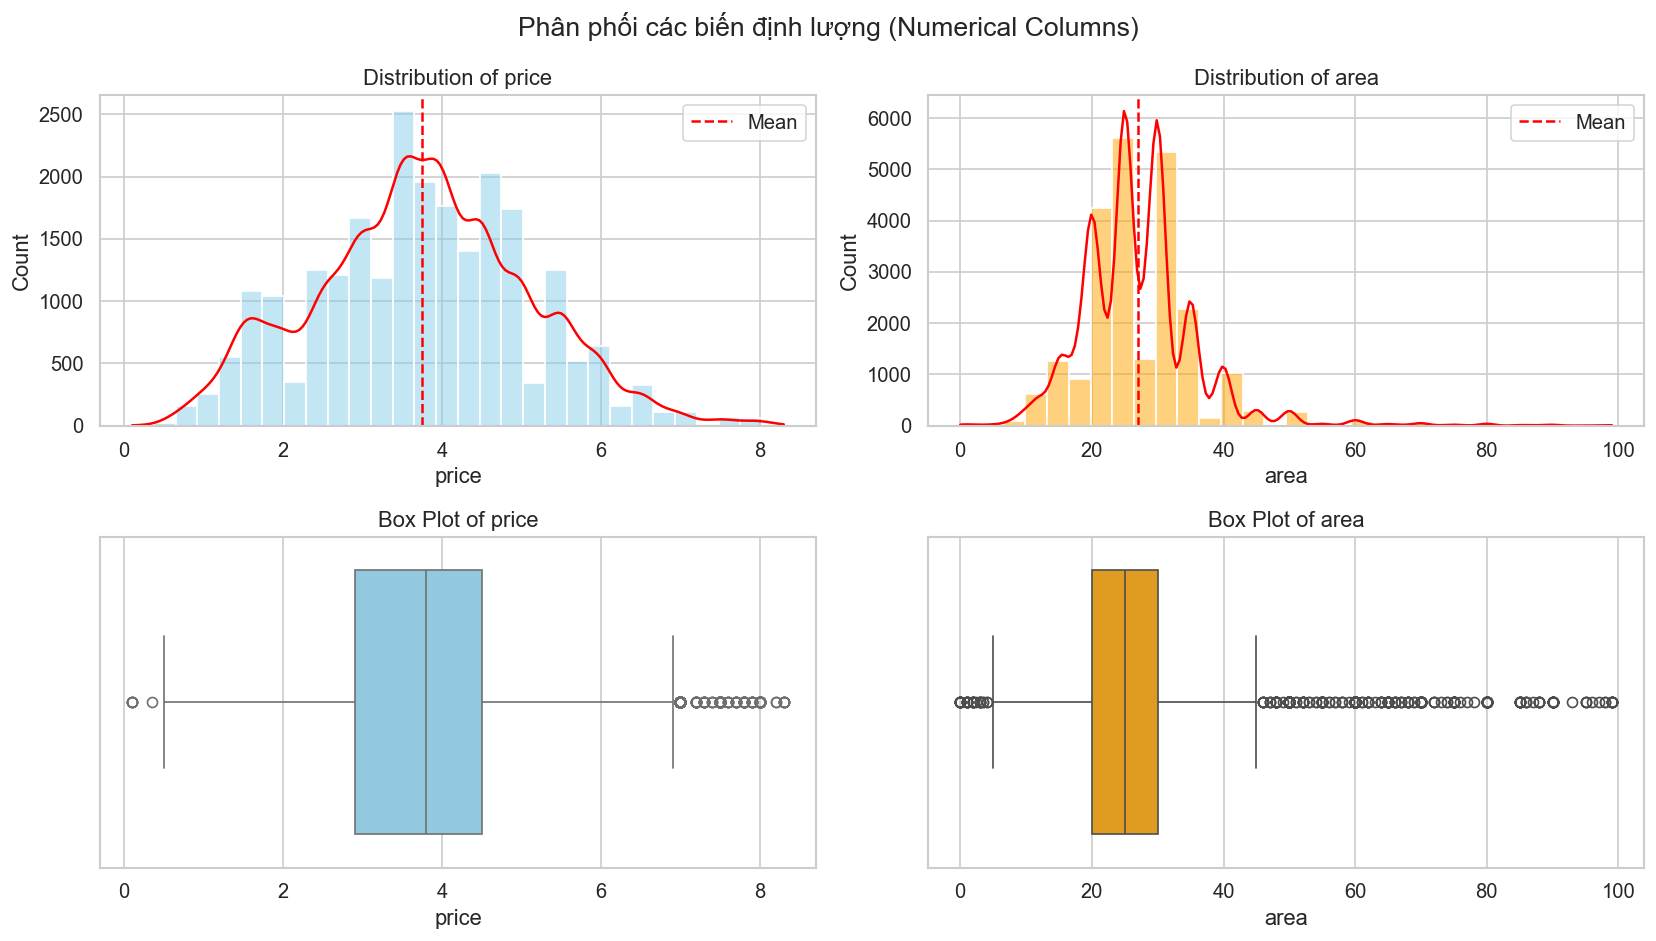

In [78]:
plot_numerical_distributions(df, numerical_cols)


## 1. Distribution & Central Tendency 

### **Price**
* **Distribution Shape:**
    * Phân phối **lệch phải nặng** với hệ số Skew $\approx 59.84$.
    * Đuôi phân phối kéo dài về phía giá trị cao, phản ánh sự tồn tại của các bất động sản giá trị rất lớn.
* **Central Tendency:**
    * **Mean:** 3.8 triệu.
    * **Median:** 3.8 triệu.
    * **Nhận xét:** Mặc dù dữ liệu bị lệch, Mean và Median xấp xỉ bằng nhau. Điều này cho thấy phần lớn dữ liệu tập trung dày đặc quanh mức 3.8 triệu, và các giá trị ngoại lai tuy lớn nhưng số lượng chưa đủ áp đảo để kéo Mean lệch hẳn khỏi Median.

### **Area**
* **Distribution Shape:**
    * Phân phối **lệch phải** với hệ số Skew $\approx 15.91$.
    * Biểu đồ Histogram hiển thị dạng **đa đỉnh**, với các đỉnh tập trung tại các mốc diện tích chẵn (ví dụ: 20, 25, 30 $m^2$), phản ánh đặc thù xây dựng theo module của phòng trọ/chung cư mini.
* **Central Tendency:**
    * **Mean (28.07 $m^2$) > Median (25.0 $m^2$).**
    * **Nhận xét:** Sự chênh lệch này xác nhận phân phối bị kéo bởi các bất động sản có diện tích lớn (chung cư nguyên căn, nhà ở).


## 2. Range & Outliers 

### **Range**
* **Price:** 0.1 - 260 triệu.
    * Min = 0.1 là giá trị đáng ngờ (có thể là lỗi nhập liệu hoặc đơn vị sai).
* **Area:** 0 - 1000 $m^2$.
    * Min = 0 là lỗi dữ liệu chắc chắn.

### **Outliers**
* **Phương pháp:** IQR Method (Box Plots).
* **Kết quả:**
    * **Price:** 291 outliers (1.21%), ngưỡng trên (Upper Bound) $\approx$ 7.15 triệu.
    * **Area:** 830 outliers (3.46%), ngưỡng trên (Upper Bound) $\approx$ 45 $m^2$.
* **Đánh giá & Phân loại:**
    * **Genuine:** Các giá trị cao **vừa phải** (ví dụ: Price 8-20 triệu, Area 45-80 $m^2$) có khả năng cao là dữ liệu thực (chung cư, nguyên căn).
    * **Suspicious/Errors:** Các giá trị **cực lớn** ( như Max Price = 260 triệu, Max Area = 1000 $m^2$) có nguy cơ cao là lỗi nhập liệu (thừa số 0, nhầm giá bán, hoặc nhầm diện tích đất).
    * **Hành động:** Cần kiểm tra chéo cột **Price/Area** . Nếu đơn giá quá vô lý (quá cao hoặc quá thấp), cần loại bỏ.
## 3. Data Quality 

### **Missing Values**
* Tỷ lệ rất thấp, không đáng lo ngại:
    * **Price:** 0.25%
    * **Area:** 0.03%

### **Impossible Values**
* **Area:** Phát hiện **13 dòng** có giá trị $\le 0$. Đây là dữ liệu rác cần loại bỏ.
* **Price:** Không có giá trị âm, nhưng giá trị thấp nhất 0.1 (có thể là lỗi nhập liệu).

### **Placeholders**
* Số `0` trong cột Area đang được sử dụng như placeholder cho dữ liệu thiếu hoặc lỗi hệ thống.

## **Đề xuất xử lý**
1.  **Cleaning:** Xóa 13 dòng `Area <= 0` và các dòng `Price` quá thấp (ví dụ < 0.5 triệu) nếu không xác minh được.
2.  **Outlier Handling :** Áp dụng phương pháp **Cắt bỏ theo ngưỡng** thay vì giữ lại toàn bộ.
    * **Thiết lập khoảng hợp lý:** Ước lượng khoảng giá và diện tích thực tế cho bài toán (Ví dụ: Price từ 0.5 - 50 triệu, Area từ 3 - 100 $m^2$).
    * **Hành động:** Loại bỏ hoàn toàn các dòng dữ liệu nằm ngoài khoảng này (bao gồm cả các giá trị quá nhỏ là lỗi và giá trị quá lớn nghi ngờ là nhập sai đơn vị). Việc này giúp mô hình tập trung vào phân khúc phổ biến và giảm nhiễu.
3.  **Imputation:** Với tỷ lệ missing < 1%, ưu tiên phương án xóa dòng để giữ độ sạch của dữ liệu gốc.

<!-- # ------------------------------------------------
# PART: categorical_missing.ipynb
# ------------------------------------------------ -->

# PHÂN TÍCH DỮ LIỆU PHÒNG TRỌ - CATEGORICAL & MISSING DATA

## Mục tiêu:
1. Phân tích các cột phân loại (Categorical Columns) - bao gồm cả các cột tiện ích boolean
2. Phân tích dữ liệu thiếu (Missing Data)
3. Phân tích tin đăng thiếu thông tin tiện ích
4. Phân tích cột date theo tháng/năm

## Cấu trúc phân tích:
- **Task 1**: Categorical Columns Analysis
  - Phân tích cột location, street_name
  - Phân tích các cột tiện ích (boolean)
  - Value Distribution: Phân phối giá trị
  - Data Quality: Kiểm tra chất lượng dữ liệu
  
- **Task 2**: Date Analysis
  - Phân tích theo tháng
  - Phân tích theo năm
  - Xu hướng đăng tin theo thời gian
  
- **Task 3**: Missing Data Analysis
  - Overall Assessment: Đánh giá tổng quan
  - Per Column Strategy: Chiến lược xử lý từng cột
  
- **Task 4**: Utility Information Analysis
  - Tìm các tin đăng thiếu thông tin tiện ích
  - Đề xuất giải pháp xử lý

In [79]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Project setup
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(PROJECT_ROOT)

# Import TẤT CẢ hàm utility
from utilities.explore_data import (
    analyze_categorical_counts, 
    analyze_utilities, 
    analyze_time_trends,
    analyze_missing_values,
    load_data
)
from utilities.visualize import (
    plot_bar_chart, 
    plot_utility_percentages,
    plot_time_series,
    plot_missing_heatmap
)

# Load data
DATA_PATH = os.path.join(PROJECT_ROOT, "Data", "cleaned.csv")
df = load_data(DATA_PATH)

display(df.head())


Đã đọc dữ liệu thành công. Kích thước: (24121, 20)


,title,description,location,address,street_name,price,area,date,air_conditioning,fridge,washing_machine,mezzanine,kitchen,wardrobe,bed,balcony,elevator,free_time,parking,url
0,"Phòng riêng C3 phạm hùng - tạ quang bửu, gác s...",Cập nhật 10 giờ ngày 5 tháng 11 năm 2025: Giảm...,"Đường Phạm Hùng, Phường 5, Quận 8, Hồ Chí Minh",Quận 8 - Hồ Chí Minh,Phạm Hùng,2.8,30.0,2025-11-19,0,0,0,0,1,0,0,0,0,0,0,https://phongtro123.com/nha-tro-hem-c3-pham-hu...
1,Cần cho thuê phòng từ 1tr3-4tr Chung cư Era To...,Cho thuê phòng ở Chung cư Era Town Đức Khải - ...,"Đường Nguyễn Lương Bằng, Quận 7, Hồ Chí Minh",Quận 7 - Hồ Chí Minh,Nguyễn Lương Bằng,1.3,15.0,2025-11-16,0,1,1,0,1,0,0,0,0,0,0,https://phongtro123.com/phong-share-tro-chung-...
2,"Phòng trọ ngay Thành Thái, trung tâm Quận 10, ...","Cho thuê phòng trọ ngay trung tâm Quận 10, gần...","43/3 Đường Thành Thái, Quận 10, Hồ Chí Minh",Quận 10 - Hồ Chí Minh,Thành Thái,4.5,25.0,2025-11-06,0,0,0,0,0,0,0,0,0,1,0,https://phongtro123.com/phong-tro-ngay-thanh-t...
3,"Cực phẩm KTX, Phòng trọ, Sang, Xịn, Mịn Giá si...","> Giá trọn gói, không phát sinh bất cứ khoản p...","101 Đường số 8, Phường Linh Đông, Thủ Đức, Hồ ...",Thủ Đức - Hồ Chí Minh,Số 8,1.2,30.0,2025-11-11,1,1,1,0,1,1,1,0,0,0,0,https://phongtro123.com/cuc-pham-ktx-phong-tro...
4,"CHO THUÊ SLEEPBOX, KÍ TÚC XÁ HIỆN ĐẠI TẠI TRUN...","SLEEPBOX, KTX HIỆN ĐẠI VỊ TRÍ TRUNG TÂM TPHCM ...","361A Đường Phạm Ngũ Lão, Phường Bến Thành, Quậ...",Quận 1 - Hồ Chí Minh,Phạm Ngũ Lão,1.5,30.0,2025-11-14,1,0,0,0,1,0,1,0,0,1,0,https://phongtro123.com/cho-thue-sleepbox-ki-t...


## Task 1: Phân tích các cột phân loại (Categorical Columns)

### A. Phân tích cột text (location, street_name)
**Quy trình:**
- Đếm số lượng giá trị duy nhất (Unique values)
- Liệt kê Top 10 giá trị xuất hiện nhiều nhất
- Vẽ biểu đồ để quan sát sự mất cân bằng
- Kiểm tra chất lượng: Missing, Inconsistencies, Rare categories

### B. Phân tích cột tiện ích (Boolean columns)
**Quy trình:**
- Đếm số lượng True/False cho mỗi tiện ích
- Tính tỷ lệ phần trăm có/không có
- Vẽ biểu đồ tổng hợp tất cả tiện ích
- Phân tích mối tương quan giữa các tiện ích


TASK 1: PHÂN TÍCH CÁC CỘT PHÂN LOẠI

A. Các cột text cần phân tích:
['location', 'street_name']

--- Phân tích cột: location ---
location
Đường Cộng Hòa, Phường 13, Quận Tân Bình, Hồ Chí Minh               138
Đường Bạch Đằng, Phường 2, Quận Tân Bình, Hồ Chí Minh                96
Đường số 35CL, Phường Cát Lái, Quận 2, Hồ Chí Minh                   95
Đường Đặng Thuỳ Trâm, Phường 13, Quận Bình Thạnh, Hồ Chí Minh        81
Đường Xô Viết Nghệ Tĩnh, Phường 25, Quận Bình Thạnh, Hồ Chí Minh     74
Đường Nơ Trang Long, Phường 13, Quận Bình Thạnh, Hồ Chí Minh         72
Phố Lê Trọng Tấn, Phường Tây Thạnh, Quận Tân Phú, Hồ Chí Minh        72
Đường Trường Chinh, Phường 15, Quận Tân Bình, Hồ Chí Minh            66
Phố Lý Thường Kiệt, Phường 14, Quận 10, Hồ Chí Minh                  66
Đường Dương Quảng Hàm, Phường 5, Quận Gò Vấp, Hồ Chí Minh            64
Name: count, dtype: int64


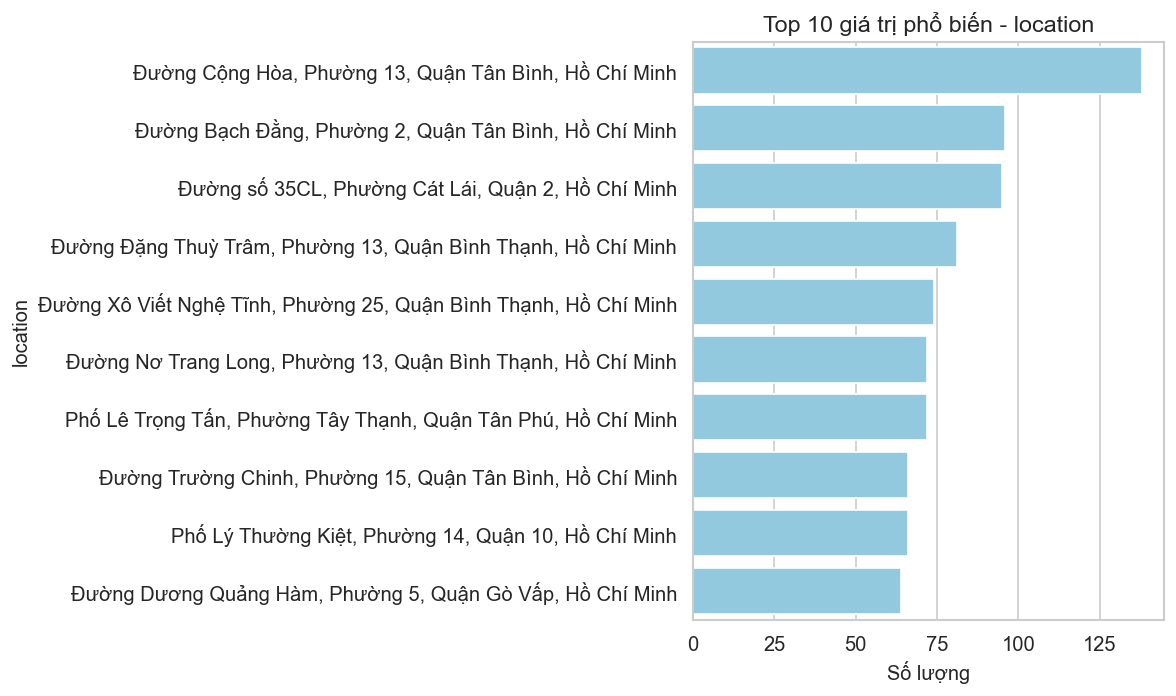


--- Phân tích cột: street_name ---
street_name
Số                     1012
Trường Chinh            396
Xô Viết Nghệ Tĩnh       359
Cách Mạng Tháng Tám     297
Cộng Hòa                285
Bạch Đằng               251
UNKNOWN                 244
Lê Đức Thọ              240
Lê Văn Sỹ               238
Dương Quảng Hàm         235
Name: count, dtype: int64


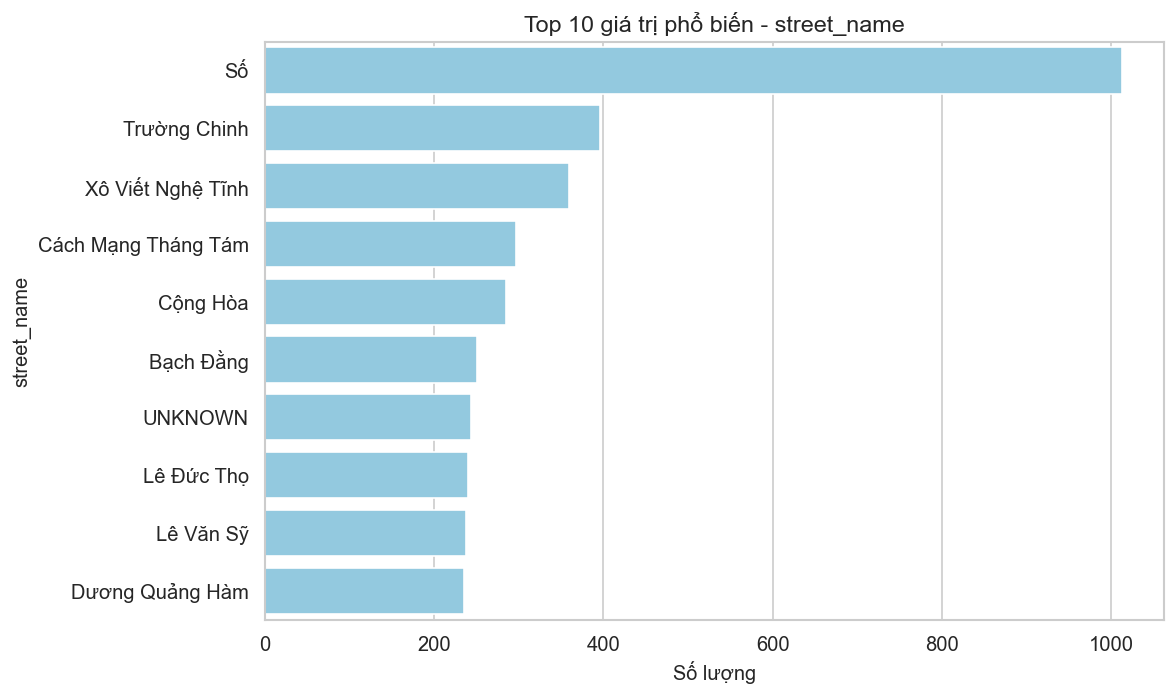

In [80]:
print("\n" + "="*60)
print("TASK 1: PHÂN TÍCH CÁC CỘT PHÂN LOẠI")
print("="*60)

# A. Phân tích cột text
exclude_cols = ['url', 'description', 'title', 'address', 'city', 'district']
cat_cols = (
    df.select_dtypes(include='object')
      .columns
      .difference(exclude_cols + ['date'])
)

print("\nA. Các cột text cần phân tích:")
print(list(cat_cols))

for col in cat_cols:
    print(f"\n--- Phân tích cột: {col} ---")
    result = analyze_categorical_counts(df, col, top_n=10)
    if result is not None:
        print(result)
        
        # Vẽ biểu đồ
        plot_bar_chart(
            data=result,
            title=f'Top 10 giá trị phổ biến - {col}',
            xlabel='Số lượng',
            ylabel=col,
            orientation='h',
            color='skyblue'
        )


### Nhận xét phân bố các thuộc tính phân loại (Categorical Columns)

Dựa trên biểu đồ và thống kê top 10 giá trị phổ biến của `location` và `street_name`, ta có những quan sát sau:

**1. Thuộc tính `location` (Địa chỉ chi tiết)**
- **Khu vực tập trung:** Dữ liệu cho thấy sự tập trung lớn ở các quận có mật độ dân cư và văn phòng cao tại TP.HCM như **Quận Tân Bình** (khu vực Cộng Hòa, Bạch Đằng, Trường Chinh) và **Quận Bình Thạnh** (khu vực Đặng Thùy Trâm, Xô Viết Nghệ Tĩnh, Nơ Trang Long).
- **Đặc điểm:** Đây là những khu vực gần sân bay, các trường đại học lớn và cửa ngõ ra vào thành phố, do đó nguồn cung/cầu về phòng trọ hoặc nhà cho thuê rất lớn.
- **Phân bố:** Giá trị phổ biến nhất (Đường Cộng Hòa) có 138 quan sát, chênh lệch không quá gắt so với các vị trí còn lại trong top 10, cho thấy dữ liệu không bị lệch cục bộ quá mức vào một địa điểm duy nhất.

**2. Thuộc tính `street_name` (Tên đường)**
- **Giá trị "Số" chiếm ưu thế:** Tên đường là "Số" có tần suất áp đảo (1012 quan sát). Điều này phản ánh thực tế quy hoạch tại TP.HCM (đặc biệt ở Quận 7, TP. Thủ Đức, Gò Vấp...), rất nhiều con đường được đặt tên theo số thứ tự (Ví dụ: Đường số 1, Đường số 10...).
  > *Lưu ý:* Khi mô hình hóa, cần kết hợp "Số" với Quận/Phường, vì "Đường số 1" ở Quận 7 sẽ khác hoàn toàn về giá trị so với "Đường số 1" ở Quận Bình Tân.
- **Các tuyến đường huyết mạch:** Top các tên đường phổ biến (Trường Chinh, Xô Viết Nghệ Tĩnh, Cách Mạng Tháng Tám) đều là các trục đường giao thông chính, dài và đi qua nhiều quận.
- **Vấn đề dữ liệu (Data Quality):** Xuất hiện giá trị **`UNKNOWN`** (244 quan sát) đứng thứ 7. Đây là các dữ liệu bị thiếu hoặc không tách được tên đường chính xác. Cần có bước xử lý (Data Cleaning/Imputation) cho nhóm này trước khi đưa vào mô hình.


B. PHÂN TÍCH CÁC CỘT TIỆN ÍCH (BOOLEAN)

Thống kê tiện ích:
             Utility  Count  Percentage
0   air_conditioning  13010   53.936404
4            kitchen  10047   41.652502
9          free_time   9873   40.931139
2    washing_machine   7719   32.001161
6                bed   6473   26.835537
1             fridge   5763   23.892044
8           elevator   5336   22.121803
7            balcony   5194   21.533104
5           wardrobe   3618   14.999378
10           parking   2572   10.662908
3          mezzanine   1948    8.075950


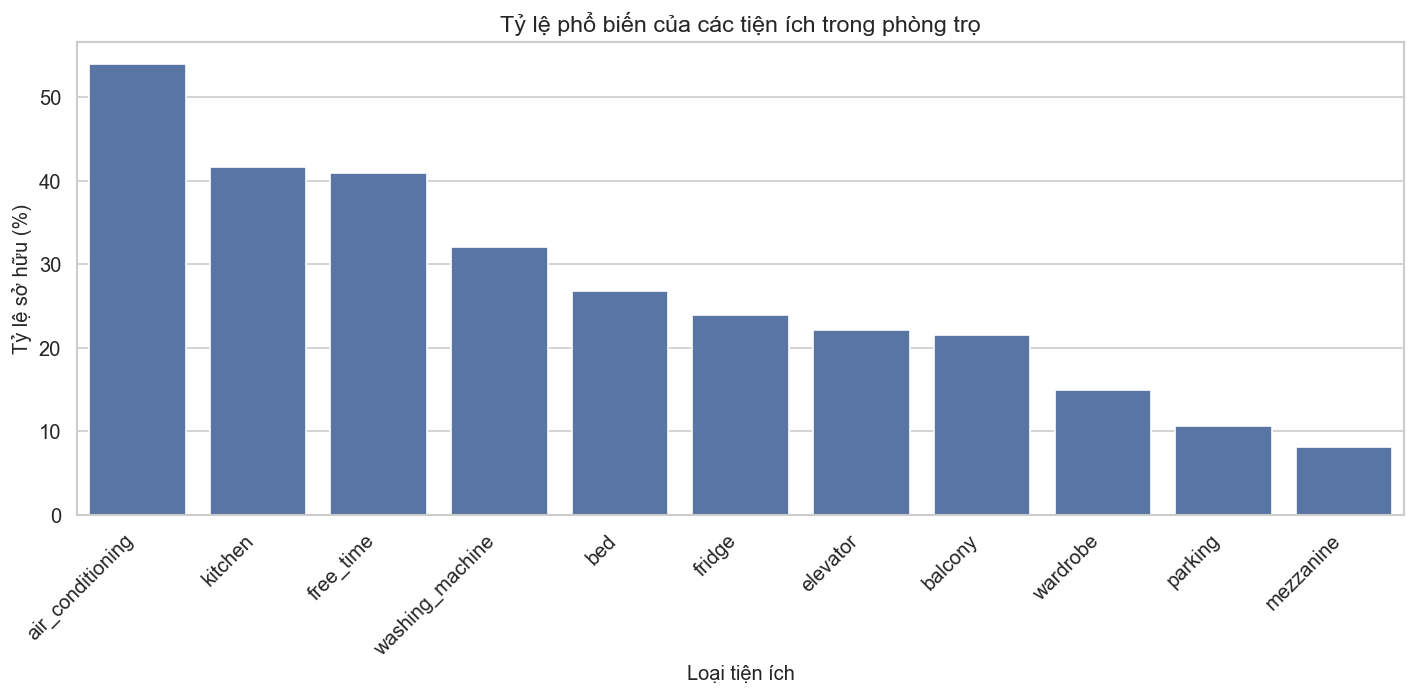

In [81]:
# B. Phân tích các cột tiện ích (Boolean)
print("\n" + "="*60)
print("B. PHÂN TÍCH CÁC CỘT TIỆN ÍCH (BOOLEAN)")
print("="*60)

utility_cols = ['air_conditioning', 'fridge', 'washing_machine', 'mezzanine',
                'kitchen', 'wardrobe', 'bed', 'balcony', 'elevator',
                'free_time', 'parking']

# Sử dụng hàm analyze_utilities
utility_stats = analyze_utilities(df, utility_cols)
print("\nThống kê tiện ích:")
print(utility_stats.to_string())

# Vẽ biểu đồ bằng hàm utility
plot_utility_percentages(
    data=utility_stats,
    title='Tỷ lệ phổ biến của các tiện ích trong phòng trọ')


### Phân tích các cột tiện ích (Boolean Columns)

Dựa trên biểu đồ và bảng thống kê tỷ lệ sở hữu tiện ích, ta có những nhận xét quan trọng sau:

**1. Tỷ lệ phổ biến rất cao (High Frequency):**
- Tất cả 11 tiện ích được khảo sát đều có tỷ lệ xuất hiện rất cao, dao động từ **76% đến 98.5%**.
- **`elevator` (thang máy)** chiếm tỷ lệ cao nhất (**98.5%**). Điều này là một tín hiệu đáng ngờ hoặc đặc trưng riêng của tập dữ liệu này, vì thực tế thị trường phòng trọ tại Việt Nam vẫn còn lượng lớn nhà trọ thấp tầng (đi bộ).
- **`mezzanine` (gác lửng)** chiếm **93.7%**, cho thấy kiểu thiết kế phòng có gác rất phổ biến trong tập dữ liệu thu thập được.

**2. Nhận định về phân khúc dữ liệu (Data Bias):**
- Việc đa số các phòng đều có đầy đủ tiện nghi (máy lạnh ~92%, máy giặt ~90%, nội thất cơ bản...) cho thấy tập dữ liệu này khả năng cao tập trung vào phân khúc **Căn hộ dịch vụ (Service Apartment)**, **Chung cư mini** hoặc phòng trọ cao cấp.
- Tập dữ liệu có thể đang thiếu vắng phân khúc phòng trọ bình dân/giá rẻ (thường không có thang máy và ít nội thất đi kèm).

**3. Lưu ý cho quá trình Mô hình hóa (Feature Selection):**
- **Vấn đề phương sai thấp (Low Variance):** Biến `elevator` (98.5% là True) gần như là hằng số. Một biến mà hầu hết các quan sát đều giống nhau sẽ mang lại rất ít thông tin để phân biệt giá cả (Information Gain thấp).
- **Hành động đề xuất:** Cần cân nhắc kiểm tra độ tương quan (Correlation) của `elevator` với giá (`price`). Nếu tương quan quá thấp, có thể loại bỏ biến này để giảm chiều dữ liệu mà không ảnh hưởng đến hiệu suất mô hình.

## Task 2: Phân tích cột Date

### Quy trình phân tích:
**a. Phân tích theo Tháng:**
- Số lượng tin đăng mỗi tháng
- Xu hướng đăng tin theo tháng
- Tìm tháng có nhiều tin nhất/ít nhất

**b. Phân tích theo Năm:**
- Số lượng tin đăng mỗi năm
- Tăng trưởng qua các năm


TASK 2: PHÂN TÍCH CỘT DATE

Dữ liệu ngày tháng hợp lệ: 24113 dòng

--- A. Phân tích theo NĂM ---
  2018: 1 tin (0.00%)
  2020: 3 tin (0.01%)
  2023: 103 tin (0.43%)
  2024: 12006 tin (49.79%)
  2025: 12000 tin (49.77%)


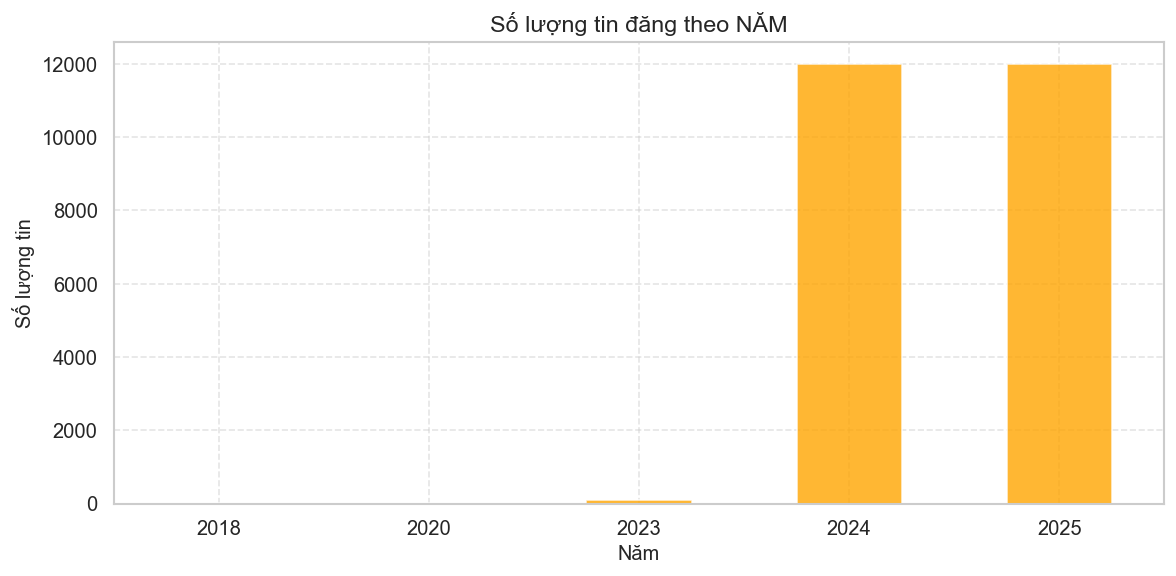

In [82]:
print("\n" + "="*60)
print("TASK 2: PHÂN TÍCH CỘT DATE")
print("="*60)

# Sử dụng hàm analyze_time_trends
year_counts, month_counts = analyze_time_trends(df, date_col='date')

if year_counts is not None and month_counts is not None:
    print(f"\nDữ liệu ngày tháng hợp lệ: {year_counts.sum()} dòng")

    # A. Phân tích theo NĂM
    print("\n--- A. Phân tích theo NĂM ---")
    total_valid = year_counts.sum()
    for year, count in year_counts.items():
        pct = (count / total_valid) * 100
        print(f"  {int(year)}: {count} tin ({pct:.2f}%)")

    # Vẽ biểu đồ năm
    plot_time_series(
        data=year_counts,
        title='Số lượng tin đăng theo NĂM',
        xlabel='Năm',
        ylabel='Số lượng tin',
        chart_type='bar'
    )


### Phân tích phân bố thời gian (Time Series Analysis)

Dựa trên biểu đồ cột và thống kê số lượng tin đăng theo năm, ta có các nhận xét quan trọng về tính thời điểm của dữ liệu:

**1. Dữ liệu tập trung tuyệt đối vào 2024 - 2025:**
- Tổng lượng tin của năm **2024** và **2025** chiếm tỷ trọng áp đảo (gần **99.6%** tổng dữ liệu).
- Cụ thể: Năm 2024 có 12,006 tin (49.79%) và 2025 có 12,000 tin (49.77%).
- **Ý nghĩa:** Điều này cho thấy bộ dữ liệu phản ánh rất sát **thị trường hiện tại (Current Market Value)**. Các mức giá trong tập dữ liệu này ít bị ảnh hưởng bởi lạm phát hay biến động giá của các năm cũ.

**2. Dữ liệu quá khứ (Outliers về thời gian):**
- Các tin đăng từ năm 2018, 2020 và 2023 chiếm tỷ lệ không đáng kể (chưa đến 0.5%).
- **Xử lý:** Có thể coi các dòng dữ liệu từ 2018, 2020 là nhiễu (noise) hoặc tin cũ chưa được gỡ. Nên cân nhắc loại bỏ các dòng này để mô hình tập trung hoàn toàn vào xu hướng giá mới nhất.

**3. Kết luận cho bài toán dự đoán:**
- Do dữ liệu tập trung vào khung thời gian rất ngắn (gần như là snapshot của thị trường trong 1-2 năm gần đây), mô hình sẽ có khả năng dự đoán chính xác giá thuê **tại thời điểm hiện tại**.
- Tuy nhiên, mô hình có thể sẽ khó nắm bắt được "xu hướng dài hạn" (long-term trend) của thị trường bất động sản nếu không có thêm dữ liệu lịch sử xa hơn.


--- B. Phân tích theo THÁNG ---
  Tháng 1 (Jan): 538 tin (2.23%)
  Tháng 2 (Feb): 1436 tin (5.96%)
  Tháng 3 (Mar): 2720 tin (11.28%)
  Tháng 4 (Apr): 2165 tin (8.98%)
  Tháng 5 (May): 2231 tin (9.25%)
  Tháng 6 (Jun): 2089 tin (8.66%)
  Tháng 7 (Jul): 2557 tin (10.60%)
  Tháng 8 (Aug): 2550 tin (10.58%)
  Tháng 9 (Sep): 1943 tin (8.06%)
  Tháng 10 (Oct): 2605 tin (10.80%)
  Tháng 11 (Nov): 2277 tin (9.44%)
  Tháng 12 (Dec): 1002 tin (4.16%)


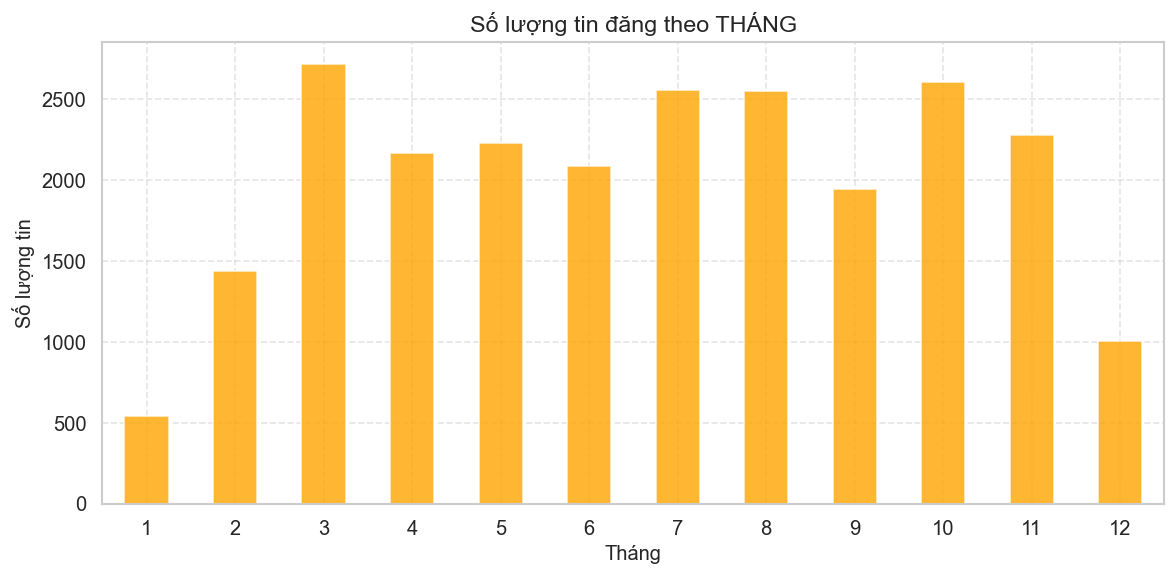

In [83]:
# B. Phân tích theo THÁNG
print("\n--- B. Phân tích theo THÁNG ---")
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for month, count in month_counts.items():
    pct = (count / total_valid) * 100
    print(f"  Tháng {int(month)} ({month_names[int(month)-1]}): {count} tin ({pct:.2f}%)")

# Vẽ biểu đồ tháng
plot_time_series(
    data=month_counts,
    title='Số lượng tin đăng theo THÁNG',
    xlabel='Tháng',
    ylabel='Số lượng tin',
    chart_type='bar'
)


### Phân tích phân bố thời gian theo THÁNG (Seasonality)

Dựa trên biểu đồ tần suất tin đăng theo tháng, ta thấy rõ **tính mùa vụ (seasonality)** của thị trường thuê phòng trọ tại Việt Nam:

**1. Giai đoạn thấp điểm (Tháng 1, 12, 2):**
- Số lượng tin đăng giảm mạnh, thấp nhất là **Tháng 1 (chỉ chiếm 2.23%)** và **Tháng 12 (4.16%)**.
- **Nguyên nhân:** Đây là thời điểm cận và trong dịp **Tết Nguyên Đán**. Tâm lý chung của người đi thuê (sinh viên, người lao động) là ổn định chỗ ở để về quê, rất ít người tìm phòng hoặc chuyển phòng trong giai đoạn này.

**2. Giai đoạn cao điểm (Tháng 3, 7, 8, 10):**
- Lượng tin đăng tăng vọt ở các mốc thời gian cụ thể:
    - **Tháng 3 (11.28% - Cao nhất):** Tương ứng với đợt "làn sóng" quay lại thành phố làm việc và học tập sau kỳ nghỉ Tết dài.
    - **Tháng 7, 8, 10:** Đây là mùa **tựu trường** (nhập học) của các trường Đại học, Cao đẳng. Nhu cầu tìm phòng trọ của tân sinh viên và sinh viên cũ quay lại trường tạo ra nguồn cầu rất lớn.

**3. Kết luận:**
- Biến `month` phản ánh đúng quy luật cung cầu thực tế.
- Trong bài toán dự đoán giá, thời điểm đăng tin (tháng cao điểm vs thấp điểm) có thể ảnh hưởng đến mức giá thuê và khả năng thương lượng.

In [84]:
# C. Phân tích chi tiết theo NĂM-THÁNG
print("\n--- C. Phân tích chi tiết theo NĂM-THÁNG ---")

# Tạo dữ liệu year_month để phân tích chi tiết
df_date = df[df['date'].notna()].copy()
df_date['year'] = df_date['date'].dt.year
df_date['month'] = df_date['date'].dt.month
df_date['year_month'] = df_date['date'].dt.to_period('M')

year_month_counts = df_date['year_month'].value_counts().sort_index()

print(f"Top 5 tháng ít tin nhất:")
for ym, count in year_month_counts.head(5).items():
    print(f"  {ym}: {count} tin")

print(f"\nTop 5 tháng nhiều tin nhất:")
for ym, count in year_month_counts.tail(5).items():
    print(f"  {ym}: {count} tin")



--- C. Phân tích chi tiết theo NĂM-THÁNG ---
Top 5 tháng ít tin nhất:
  2018-06: 1 tin
  2020-03: 1 tin
  2020-04: 1 tin
  2020-07: 1 tin
  2023-05: 2 tin

Top 5 tháng nhiều tin nhất:
  2025-07: 1211 tin
  2025-08: 1599 tin
  2025-09: 1195 tin
  2025-10: 1439 tin
  2025-11: 1398 tin


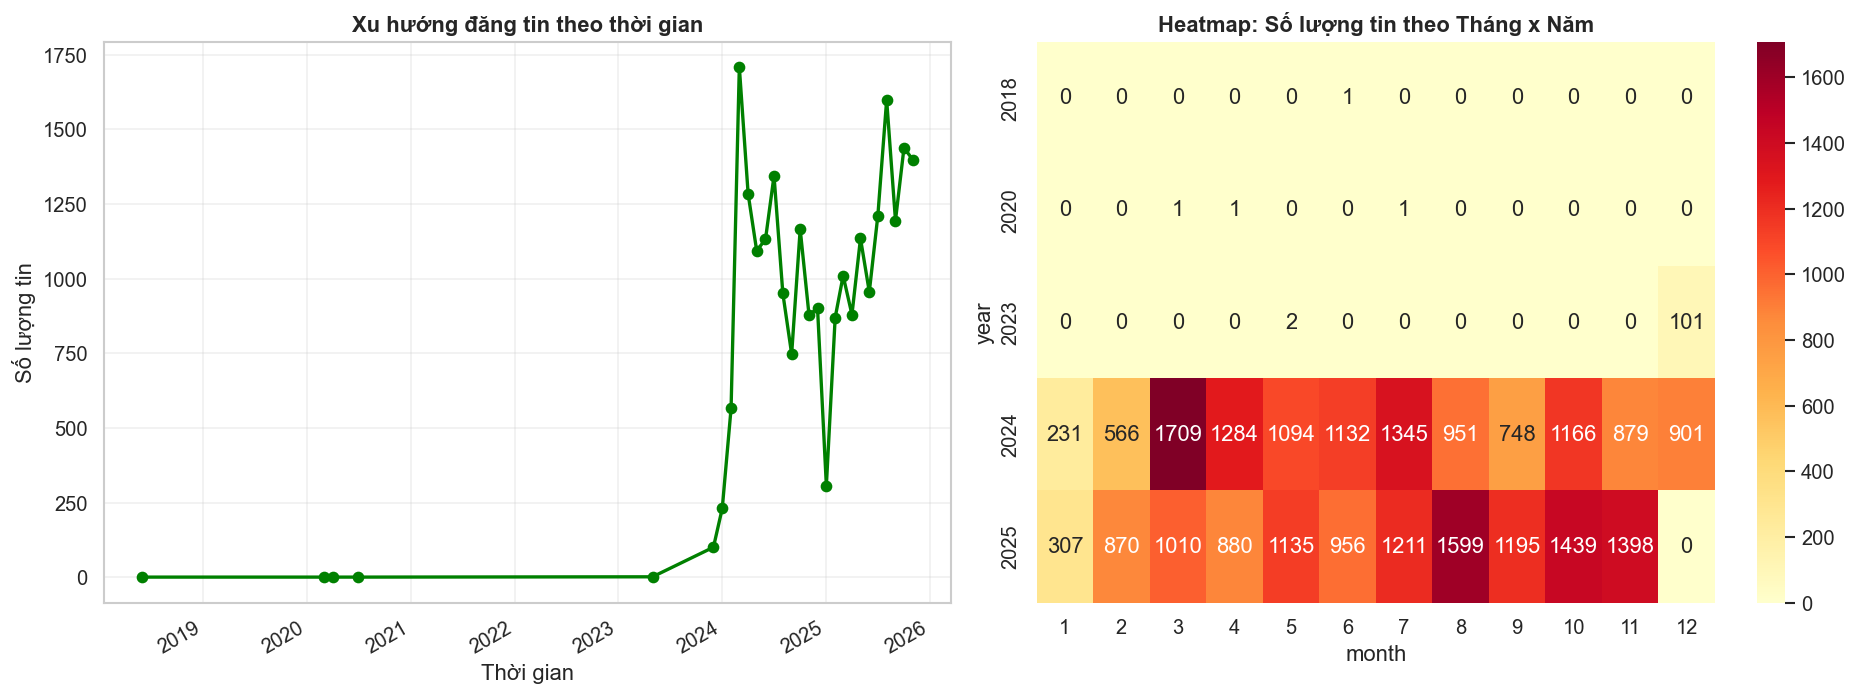


KẾT LUẬN PHÂN TÍCH THỜI GIAN
Tăng trưởng từ 2018 đến 2025: 1199900.00%
Tháng sôi động nhất: Tháng 3 - 2720 tin
Tháng ít hoạt động nhất: Tháng 1 - 538 tin


In [85]:
# Visualization tổng hợp
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Time series trend
year_month_counts.index = year_month_counts.index.to_timestamp()
year_month_counts.plot(kind='line', ax=axes[0], marker='o', color='green', linewidth=2)
axes[0].set_xlabel('Thời gian')
axes[0].set_ylabel('Số lượng tin')
axes[0].set_title('Xu hướng đăng tin theo thời gian', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# 2. Heatmap
pivot_data = df_date.groupby(['year', 'month']).size().unstack(fill_value=0)
sns.heatmap(pivot_data, annot=True, fmt='d', cmap='YlOrRd', ax=axes[1])
axes[1].set_title('Heatmap: Số lượng tin theo Tháng x Năm', fontweight='bold')

plt.tight_layout()
plt.show()

# Insights
print("\n" + "="*50)
print("KẾT LUẬN PHÂN TÍCH THỜI GIAN")
print("="*50)

if len(year_counts) > 1:
    year_growth = ((year_counts.iloc[-1] - year_counts.iloc[0]) / year_counts.iloc[0]) * 100
    print(f"Tăng trưởng từ {int(year_counts.index[0])} đến {int(year_counts.index[-1])}: {year_growth:.2f}%")

most_active = month_counts.idxmax()
least_active = month_counts.idxmin()
print(f"Tháng sôi động nhất: Tháng {int(most_active)} - {month_counts.max()} tin")
print(f"Tháng ít hoạt động nhất: Tháng {int(least_active)} - {month_counts.min()} tin")


## Task 3: Phân tích dữ liệu thiếu (Missing Data)

### Quy trình phân tích:
**a. Overall Assessment (Đánh giá tổng quan):**
- Lập bảng tổng hợp: Tên cột, số lượng thiếu, phần trăm thiếu
- Visualize: Vẽ Heatmap để xem sự phân bố của dữ liệu thiếu

**b. Per Column Strategy (Chiến lược xử lý):**
- Thiếu > 50%: Cân nhắc xóa cột
- Thiếu < 5%: Có thể xóa dòng hoặc điền giá trị
- Thiếu 5-50%: Điền giá trị (Mean/Median/Mode) hoặc tạo nhóm "Unknown"


TASK 3: PHÂN TÍCH DỮ LIỆU THIẾU

Bảng thống kê dữ liệu thiếu:

             Missing_Count  Missing_Percentage
price                   59            0.244600
description              8            0.033166
location                 8            0.033166
area                     8            0.033166
date                     8            0.033166
street_name              1            0.004146


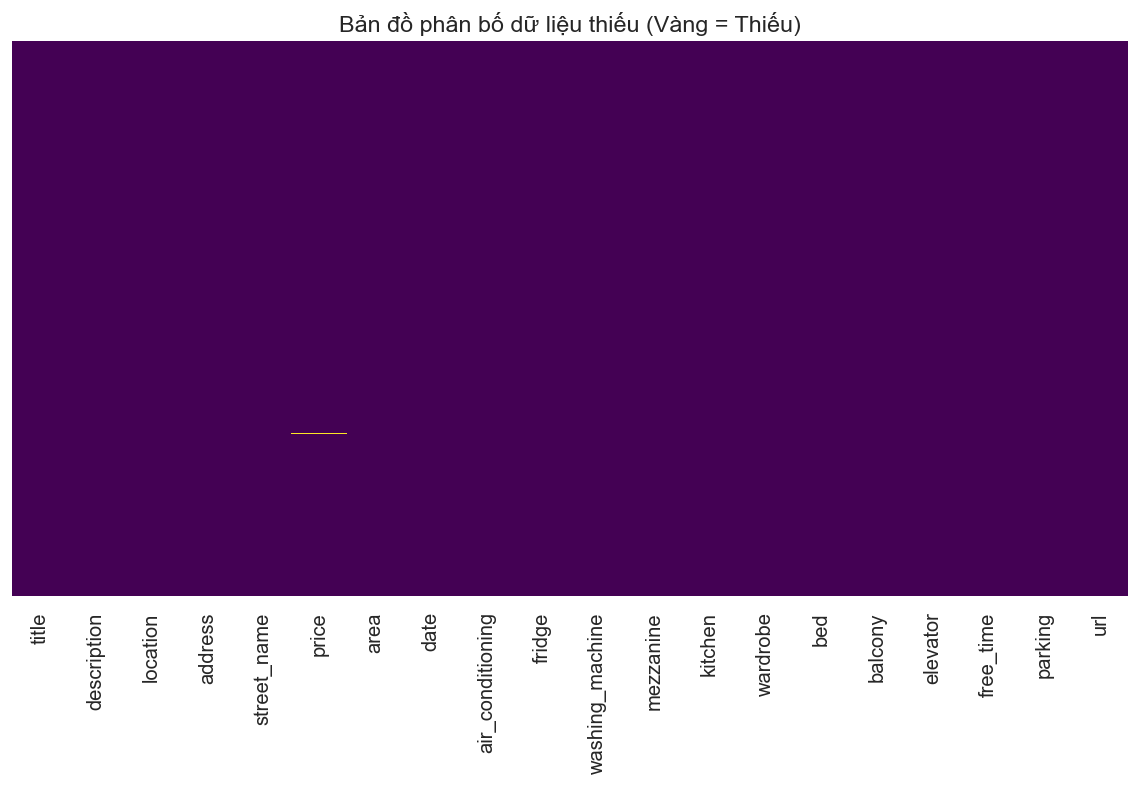

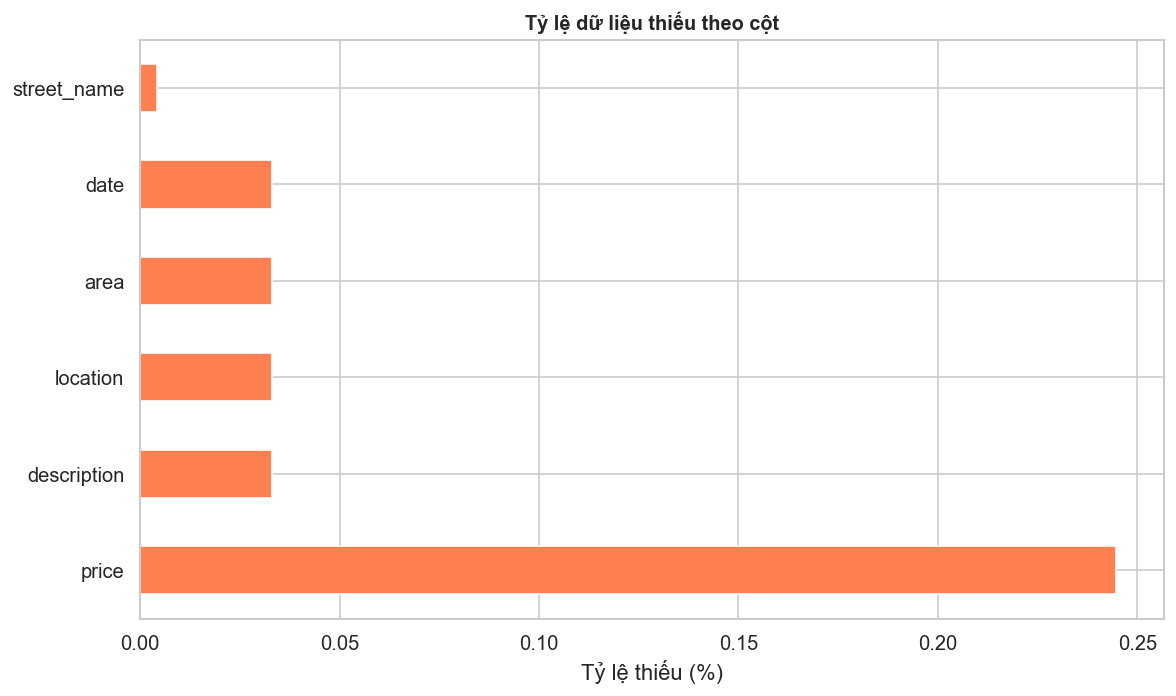


CHIẾN LƯỢC XỬ LÝ DỮ LIỆU THIẾU

Cột 'price' (59 giá trị thiếu - 0.24%):
  ĐỀ XUẤT: XÓA DÒNG (Drop rows) hoặc Điền giá trị
  -> Tỷ lệ thấp, ít ảnh hưởng đến dataset

Cột 'description' (8 giá trị thiếu - 0.03%):
  ĐỀ XUẤT: XÓA DÒNG (Drop rows) hoặc Điền giá trị
  -> Tỷ lệ thấp, ít ảnh hưởng đến dataset

Cột 'location' (8 giá trị thiếu - 0.03%):
  ĐỀ XUẤT: XÓA DÒNG (Drop rows) hoặc Điền giá trị
  -> Tỷ lệ thấp, ít ảnh hưởng đến dataset

Cột 'area' (8 giá trị thiếu - 0.03%):
  ĐỀ XUẤT: XÓA DÒNG (Drop rows) hoặc Điền giá trị
  -> Tỷ lệ thấp, ít ảnh hưởng đến dataset

Cột 'date' (8 giá trị thiếu - 0.03%):
  ĐỀ XUẤT: XÓA DÒNG (Drop rows) hoặc Điền giá trị
  -> Tỷ lệ thấp, ít ảnh hưởng đến dataset

Cột 'street_name' (1 giá trị thiếu - 0.00%):
  ĐỀ XUẤT: XÓA DÒNG (Drop rows) hoặc Điền giá trị
  -> Tỷ lệ thấp, ít ảnh hưởng đến dataset


In [86]:
print("\n" + "="*60)
print("TASK 3: PHÂN TÍCH DỮ LIỆU THIẾU")
print("="*60)

# Sử dụng hàm analyze_missing_values
missing_table = analyze_missing_values(df)

if not missing_table.empty:
    print("\nBảng thống kê dữ liệu thiếu:\n")
    print(missing_table.to_string())

    # Vẽ heatmap bằng hàm utility
    plot_missing_heatmap(df)

    # Vẽ bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    missing_table['Missing_Percentage'].plot(kind='barh', ax=ax, color='coral')
    ax.set_xlabel('Tỷ lệ thiếu (%)')
    ax.set_title('Tỷ lệ dữ liệu thiếu theo cột', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Strategy per column
    print("\n" + "="*60)
    print("CHIẾN LƯỢC XỬ LÝ DỮ LIỆU THIẾU")
    print("="*60)

    for col in missing_table.index:
        pct = missing_table.loc[col, 'Missing_Percentage']
        count = missing_table.loc[col, 'Missing_Count']

        print(f"\nCột '{col}' ({int(count)} giá trị thiếu - {pct:.2f}%):")

        if pct > 50:
            print("  ĐỀ XUẤT: XÓA CỘT (Drop column)")
            print("  -> Thiếu quá nhiều thông tin, khó khôi phục")
        elif pct < 5:
            print("  ĐỀ XUẤT: XÓA DÒNG (Drop rows) hoặc Điền giá trị")
            print("  -> Tỷ lệ thấp, ít ảnh hưởng đến dataset")
        else:
            print("  ĐỀ XUẤT: ĐIỀN GIÁ TRỊ (Imputation)")
            if df[col].dtype in ['int64', 'float64']:
                print("  -> Biến số: Điền bằng Mean/Median/KNN")
            else:
                print("  -> Biến phân loại: Điền Mode hoặc tạo nhóm 'Unknown'")
else:
    print("\nDataset hoàn hảo! Không có giá trị nào bị thiếu.")


## Task 4: Phân tích tin đăng thiếu thông tin tiện ích

### Mục đích:
Kiểm tra số lượng bản ghi mà TẤT CẢ các cột tiện ích đều = False/0

### Nguyên nhân có thể:
- Người đăng không tích chọn tiện ích khi đăng bài
- Thông tin tiện ích được viết trong phần mô tả (description)

### Hành động đề xuất:
- Nếu tỷ lệ > 20%: Cần Text Mining trên cột 'description'
- Nếu tỷ lệ 10-20%: Xem xét xử lý hoặc giữ nguyên
- Nếu tỷ lệ < 10%: Chấp nhận được


TASK 4: PHÂN TÍCH TIN ĐĂNG THIẾU THÔNG TIN TIỆN ÍCH

KẾT QUẢ TỔNG QUAN:
- Tổng số tin đăng: 24121
- Tin không có tiện ích nào: 2736
- Tỷ lệ: 11.34%

Phân phối từng tiện ích:
  air_conditioning: 13010 (53.94%)
  kitchen: 10047 (41.65%)
  free_time: 9873 (40.93%)
  washing_machine: 7719 (32.00%)
  bed: 6473 (26.84%)
  fridge: 5763 (23.89%)
  elevator: 5336 (22.12%)
  balcony: 5194 (21.53%)
  wardrobe: 3618 (15.00%)
  parking: 2572 (10.66%)
  mezzanine: 1948 (8.08%)


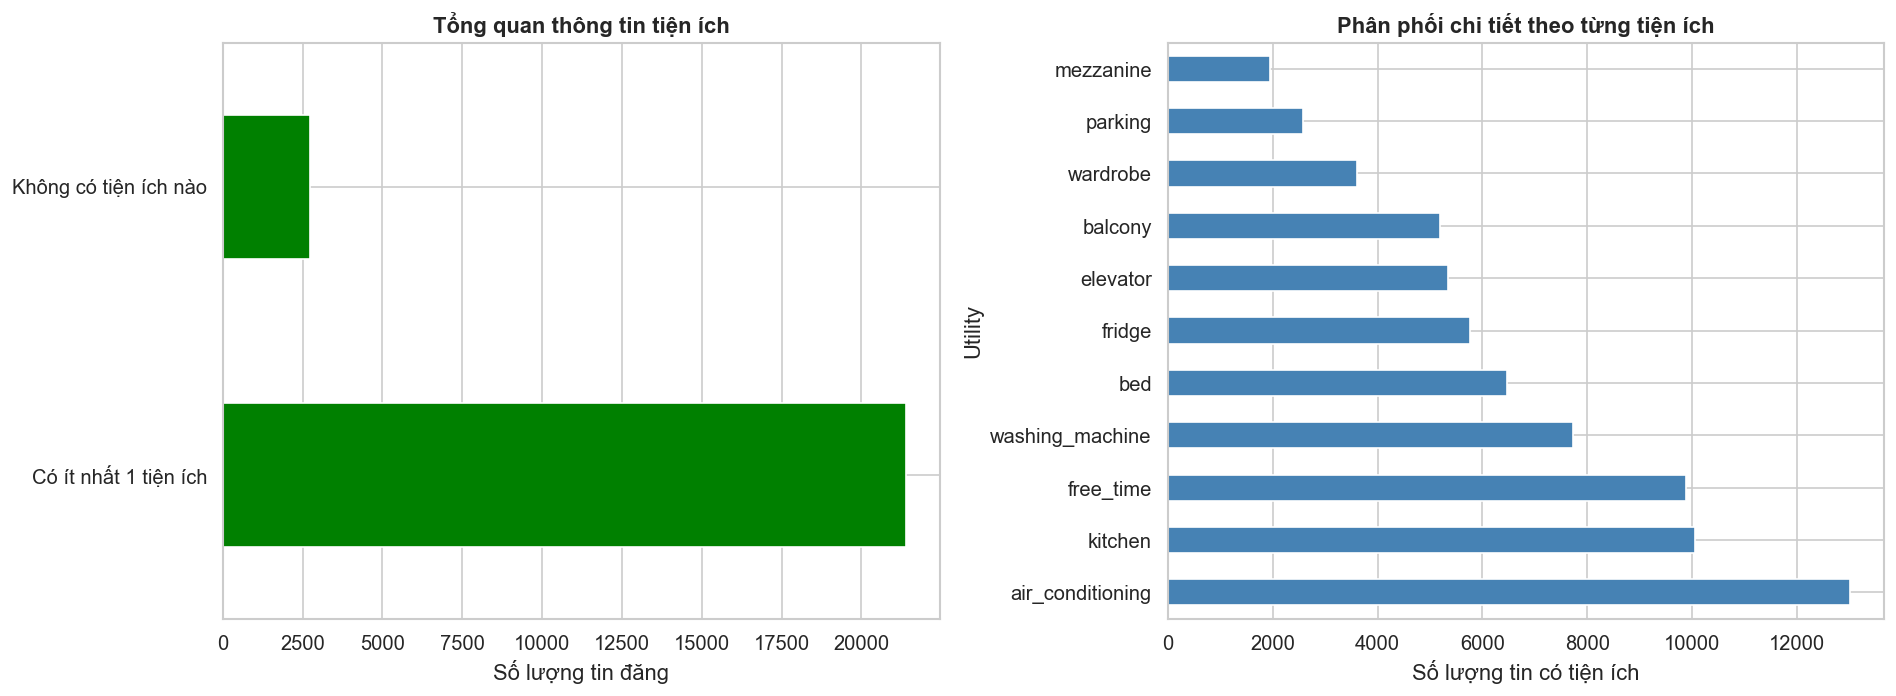


ĐÁNH GIÁ VÀ ĐỀ XUẤT

Tỷ lệ trung bình, nên xử lý:
- Kiểm tra mô tả (description) để điền thông tin
- Hoặc có thể giữ nguyên nếu mục đích phân tích chấp nhận được

Mẫu 5 tin đăng không có tiện ích:
                                                                                                   title                                                                                 location  price  area  air_conditioning  fridge  washing_machine  mezzanine  kitchen  wardrobe  bed  balcony  elevator  free_time  parking
25                                                           PHÒNG CAO CẤP THOÁNG MÁT NGAY BV THỐNG NHẤT                                 Phố Lý Thường Kiệt, Phường 9, Quận Tân Bình, Hồ Chí Minh    4.7  25.0                 0       0                0          0        0         0    0        0         0          0        0
33                                           Cho thuê phòng trọ mới xây 30m2 - 3tr - đường Lò Lu, quận 9                               133a Đường Lò Lu, P

In [87]:
print("\n" + "="*60)
print("TASK 4: PHÂN TÍCH TIN ĐĂNG THIẾU THÔNG TIN TIỆN ÍCH")
print("="*60)

utility_cols = ['air_conditioning', 'fridge', 'washing_machine', 'mezzanine',
                'kitchen', 'wardrobe', 'bed', 'balcony', 'elevator',
                'free_time', 'parking']

# Tìm tin không có tiện ích nào
no_utilities_df = df[df[utility_cols].sum(axis=1) == 0]

count_no_utils = len(no_utilities_df)
total_rows = len(df)
percent_no_utils = (count_no_utils / total_rows) * 100

print(f"\nKẾT QUẢ TỔNG QUAN:")
print(f"- Tổng số tin đăng: {total_rows}")
print(f"- Tin không có tiện ích nào: {count_no_utils}")
print(f"- Tỷ lệ: {percent_no_utils:.2f}%")

# Sử dụng lại hàm analyze_utilities để có data đầy đủ
print(f"\nPhân phối từng tiện ích:")
utility_stats = analyze_utilities(df, utility_cols)
for _, row in utility_stats.iterrows():
    print(f"  {row['Utility']}: {int(row['Count'])} ({row['Percentage']:.2f}%)")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Overview
utilities_summary = pd.DataFrame({
    'Có ít nhất 1 tiện ích': [total_rows - count_no_utils],
    'Không có tiện ích nào': [count_no_utils]
}).T

utilities_summary.plot(kind='barh', ax=axes[0], legend=False, color=['green', 'red'])
axes[0].set_xlabel('Số lượng tin đăng')
axes[0].set_title('Tổng quan thông tin tiện ích', fontweight='bold')

# 2. Detail - sử dụng dữ liệu từ analyze_utilities
utility_stats.set_index('Utility')['Count'].plot(kind='barh', ax=axes[1], color='steelblue')
axes[1].set_xlabel('Số lượng tin có tiện ích')
axes[1].set_title('Phân phối chi tiết theo từng tiện ích', fontweight='bold')

plt.tight_layout()
plt.show()

# Recommendations
print(f"\n{'='*60}")
print("ĐÁNH GIÁ VÀ ĐỀ XUẤT")
print("="*60)

if percent_no_utils > 20:
    print("\nTỶ LỆ TIN THIẾU TIỆN ÍCH CAO!")
    print("\nĐỀ XUẤT:")
    print("1. Sử dụng Text Mining để trích xuất thông tin từ cột 'description'")
    print("2. Áp dụng NLP để tìm từ khóa:")
    print("   - 'máy lạnh', 'điều hòa' -> air_conditioning")
    print("   - 'tủ lạnh' -> fridge")
    print("   - 'máy giặt' -> washing_machine")
    print("   - 'gác', 'gác lửng' -> mezzanine")
elif percent_no_utils > 10:
    print("\nTỷ lệ trung bình, nên xử lý:")
    print("- Kiểm tra mô tả (description) để điền thông tin")
    print("- Hoặc có thể giữ nguyên nếu mục đích phân tích chấp nhận được")
else:
    print("\nTỷ lệ chấp nhận được!")
    print("- Dữ liệu khá đầy đủ về thông tin tiện ích")

if count_no_utils > 0:
    print(f"\nMẫu 5 tin đăng không có tiện ích:")
    sample_cols = ['title', 'location', 'price', 'area'] + utility_cols
    print(no_utilities_df[sample_cols].head().to_string())


<!-- # ------------------------------------------------
# PART: relationships_correlations.ipynb
# ------------------------------------------------ -->

# Phân tích mối quan hệ & tương quan – Preliminary Patterns & Insights

Notebook này tập trung phân tích mối quan hệ giữa **giá phòng** và các **đặc trưng quan trọng** trong bộ dữ liệu nhà trọ TP.HCM (và một phần Hà Nội). Mục tiêu là khám phá insight, làm rõ các pattern quan trọng, từ đó hỗ trợ cho bước *feature engineering* và xây dựng mô hình dự đoán giá ở các phần sau.

Phân tích được chia thành các nhóm chính:

### 1. Mối quan hệ giữa các biến numerical
* Tính ma trận tương quan cho `price`, `area` và các biến số liên quan.
* Vẽ **correlation heatmap** để quan sát nhanh mức độ liên hệ.
* Nhận diện các cặp biến có tương quan mạnh, yếu hoặc bất ngờ.

### 2. Numerical × Categorical
Phân tích cách giá phòng thay đổi theo:
* Địa bàn (`address`)
* Tên đường (`street_name`)
* Các tiện ích (`amenity_*`)
* Một số nhóm so sánh: có/không có tiện ích, sự chênh lệch giữa tuyến đường và mặt bằng quận.

### 3. Cross-tabulations (Categorical × Categorical)
* Thống kê tần suất – phân bố tiện ích theo quận.
* Những pattern phân khúc giúp hiểu đặc điểm từng khu vực.

### 4. Initial Observations & Insights
* Tổng hợp các phát hiện nổi bật từ dữ liệu.
* Những điểm thú vị về thị trường phòng trọ.
* Các tín hiệu tốt để đưa vào mô hình.
* Các hành vi giá “bất thường” cần xem xét.

### 5. Red Flags & Data Quality
* Dữ liệu thiếu, lệch phân bố, outlier.
* Các vấn đề cần xử lý trước khi modeling.

## 1. Khởi tạo: Import thư viện & đọc dữ liệu

In [88]:
import pandas as pd
import seaborn as sns
import os
import sys

# =========================
# Project setup
# =========================
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(PROJECT_ROOT)

# =========================
# Visualization utilities
# =========================
from utilities.visualize import (
    plot_correlation_heatmap,
    plot_amenities_by_district,
    plot_median_price_by_district,
    plot_top_streets_by_median_price,
    plot_street_delta_vs_district,
    plot_median_price_yes_no_amenity,
)

# =========================
# EDA / Explore utilities
# =========================
from utilities.explore_data import (
    analyze_district_distribution,
    analyze_amenities_by_district,
    summarize_price_by_top_districts,
    summarize_price_by_district_street,
    top_street_premium_vs_district,
    analyze_amenity_price_effect,
)

# =========================
# Global config
# =========================
sns.set(style="whitegrid", font_scale=1.1)
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

# =========================
# Load data
# =========================
CSV_PATH = "../Data/cleaned.csv"
df = pd.read_csv(CSV_PATH)

print("Kích thước dữ liệu:", df.shape)
df.head()


Kích thước dữ liệu: (24121, 20)


,title,description,location,address,street_name,price,area,date,air_conditioning,fridge,washing_machine,mezzanine,kitchen,wardrobe,bed,balcony,elevator,free_time,parking,url
0,"Phòng riêng C3 phạm hùng - tạ quang bửu, gác s...",Cập nhật 10 giờ ngày 5 tháng 11 năm 2025: Giảm...,"Đường Phạm Hùng, Phường 5, Quận 8, Hồ Chí Minh",Quận 8 - Hồ Chí Minh,Phạm Hùng,2.8,30.0,2025-11-19,0,0,0,0,1,0,0,0,0,0,0,https://phongtro123.com/nha-tro-hem-c3-pham-hu...
1,Cần cho thuê phòng từ 1tr3-4tr Chung cư Era To...,Cho thuê phòng ở Chung cư Era Town Đức Khải - ...,"Đường Nguyễn Lương Bằng, Quận 7, Hồ Chí Minh",Quận 7 - Hồ Chí Minh,Nguyễn Lương Bằng,1.3,15.0,2025-11-16,0,1,1,0,1,0,0,0,0,0,0,https://phongtro123.com/phong-share-tro-chung-...
2,"Phòng trọ ngay Thành Thái, trung tâm Quận 10, ...","Cho thuê phòng trọ ngay trung tâm Quận 10, gần...","43/3 Đường Thành Thái, Quận 10, Hồ Chí Minh",Quận 10 - Hồ Chí Minh,Thành Thái,4.5,25.0,2025-11-06,0,0,0,0,0,0,0,0,0,1,0,https://phongtro123.com/phong-tro-ngay-thanh-t...
3,"Cực phẩm KTX, Phòng trọ, Sang, Xịn, Mịn Giá si...","> Giá trọn gói, không phát sinh bất cứ khoản p...","101 Đường số 8, Phường Linh Đông, Thủ Đức, Hồ ...",Thủ Đức - Hồ Chí Minh,Số 8,1.2,30.0,2025-11-11,1,1,1,0,1,1,1,0,0,0,0,https://phongtro123.com/cuc-pham-ktx-phong-tro...
4,"CHO THUÊ SLEEPBOX, KÍ TÚC XÁ HIỆN ĐẠI TẠI TRUN...","SLEEPBOX, KTX HIỆN ĐẠI VỊ TRÍ TRUNG TÂM TPHCM ...","361A Đường Phạm Ngũ Lão, Phường Bến Thành, Quậ...",Quận 1 - Hồ Chí Minh,Phạm Ngũ Lão,1.5,30.0,2025-11-14,1,0,0,0,1,0,1,0,0,1,0,https://phongtro123.com/cho-thue-sleepbox-ki-t...


### 1.1. Khám phá sơ bộ cấu trúc dữ liệu

Ở bước này ta:

- Xem thông tin kiểu dữ liệu (`info`)
- Thống kê mô tả cho:
  - Biến số (numerical): `describe()`
  - Biến phân loại (categorical): `describe(include="object")`
- Xem tỷ lệ thiếu dữ liệu ở từng cột

Mục tiêu: hiểu sơ bộ dataset, nhận diện nhanh các cột quan trọng và các vấn đề chất lượng dữ liệu.


In [89]:
# Thông tin kiểu dữ liệu + số lượng non-null
df.info()

# Thống kê mô tả cho biến số
print("\n=== Describe numerical columns ===")
display(df.describe())

# Thống kê mô tả cho biến phân loại
print("\n=== Describe categorical columns ===")
display(df.describe(include="object"))

# Tỷ lệ missing của từng cột
missing_ratio = df.isna().mean().sort_values(ascending=False)
print("\n=== Tỷ lệ missing theo cột ===")
display(missing_ratio.to_frame("missing_ratio"))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24121 entries, 0 to 24120
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             24121 non-null  object 
 1   description       24113 non-null  object 
 2   location          24113 non-null  object 
 3   address           24121 non-null  object 
 4   street_name       24120 non-null  object 
 5   price             24062 non-null  float64
 6   area              24113 non-null  float64
 7   date              24113 non-null  object 
 8   air_conditioning  24121 non-null  int64  
 9   fridge            24121 non-null  int64  
 10  washing_machine   24121 non-null  int64  
 11  mezzanine         24121 non-null  int64  
 12  kitchen           24121 non-null  int64  
 13  wardrobe          24121 non-null  int64  
 14  bed               24121 non-null  int64  
 15  balcony           24121 non-null  int64  
 16  elevator          24121 non-null  int64 

,price,area,air_conditioning,fridge,washing_machine,mezzanine,kitchen,wardrobe,bed,balcony,elevator,free_time,parking
count,24062.000000,24113.000000,24121.000000,24121.000000,24121.000000,24121.000000,24121.000000,24121.000000,24121.000000,24121.000000,24121.000000,24121.000000,24121.000000
mean,3.798834,28.068236,0.539364,0.238920,0.320012,0.080760,0.416525,0.149994,0.268355,0.215331,0.221218,0.409311,0.106629
std,2.296569,17.293287,0.498458,0.426433,0.466490,0.272471,0.492993,0.357073,0.443113,0.411060,0.415076,0.491717,0.308647
min,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.900000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.800000,25.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.600000,30.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,260.000025,1000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



=== Describe categorical columns ===


,title,description,location,address,street_name,date,url
count,24121,24113,24113,24121,24120,24113,24121
unique,23786,23899,12787,140,2581,687,23986
top,Connection timed out Error code 522,"Phòng rộng rãi thoáng mát, đẹp, sạch sẽ, có bế...","Đường Cộng Hòa, Phường 13, Quận Tân Bình, Hồ C...",Quận Bình Thạnh - Hồ Chí Minh,Số,2025-11-17,https://phongtro123.com/cho-thue-phong-q3-rong...
freq,5,3,138,3103,1012,122,2



=== Tỷ lệ missing theo cột ===


,missing_ratio
price,0.002446
location,0.000332
area,0.000332
date,0.000332
description,0.000332
street_name,0.000041
title,0.000000
wardrobe,0.000000
parking,0.000000
free_time,0.000000


### 1.2. Chuẩn hoá một số kiểu dữ liệu

Trong dataset này, cột `created_at` đang ở dạng chuỗi ngày tháng (`string`), ta chuyển sang `datetime`
để có thể phân tích theo thời gian (nếu cần), ví dụ:

- Ngày đăng tin → `day`
- Tháng đăng tin → `month`
- Năm đăng tin → `year`

Đồng thời, ta tách danh sách **biến số** và **biến phân loại** để dùng cho phần tương quan sau.


In [90]:
# Chuyển created_at sang datetime nếu tồn tại
if "created_at" in df.columns:
    df["created_at"] = pd.to_datetime(df["created_at"], errors="coerce")
    df["created_year"] = df["created_at"].dt.year
    df["created_month"] = df["created_at"].dt.month
    df["created_day"] = df["created_at"].dt.day

# LẤY numeric sau khi đã tạo cột mới
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("Các cột numerical:", numeric_cols)
print("\nCác cột categorical:", categorical_cols)


Các cột numerical: ['price', 'area', 'air_conditioning', 'fridge', 'washing_machine', 'mezzanine', 'kitchen', 'wardrobe', 'bed', 'balcony', 'elevator', 'free_time', 'parking']

Các cột categorical: ['title', 'description', 'location', 'address', 'street_name', 'date', 'url']


## **2. Relationships & Correlations (Preliminary Patterns)**

Trong phần này, ta tập trung vào **mối quan hệ giữa các biến số** (numerical) thông qua:

1. **Ma trận tương quan (Correlation matrix)**
2. **Heatmap trực quan hoá tương quan**
3. **Danh sách các cặp biến tương quan mạnh (|r| lớn)**

Note: Ở đây sử dụng hệ số tương quan **spearman** cho các biến số vì trong bộ dữ liệu phòng trọ, giá thường không tăng tuyến tính theo diện tích hay số tiện ích, mà tăng theo xu hướng (monotonic). Ngoài ra, dữ liệu có nhiều outlier, khiến Pearson dễ bị sai lệch. Spearman dựa trên thứ hạng nên bắt được xu hướng tăng/giảm tốt hơn và ít bị ảnh hưởng bởi outlier. Vì vậy Spearman phản ánh mối quan hệ thực chất giữa các biến và phù hợp hơn cho phân tích giá phòng trọ.

In [91]:
# Chỉ giữ những numerical columns không bị missing quá nhiều
num_for_corr = [c for c in numeric_cols if df[c].notna().mean() > 0.95]

corr_matrix = df[num_for_corr].corr(method="spearman")

print("Danh sách biến dùng để tính tương quan:")
print(num_for_corr)

corr_matrix


Danh sách biến dùng để tính tương quan:
['price', 'area', 'air_conditioning', 'fridge', 'washing_machine', 'mezzanine', 'kitchen', 'wardrobe', 'bed', 'balcony', 'elevator', 'free_time', 'parking']


,price,area,air_conditioning,fridge,washing_machine,mezzanine,kitchen,wardrobe,bed,balcony,elevator,free_time,parking
price,1.000000,0.398487,-0.022921,0.096092,-0.035672,-0.060922,-0.036646,0.086566,0.036319,0.172127,0.175510,0.015498,0.106603
area,0.398487,1.000000,0.008137,0.085815,0.021244,-0.006017,0.025798,0.024296,0.061959,0.131572,0.083529,0.024201,0.091331
air_conditioning,-0.022921,0.008137,1.000000,0.392564,0.238324,-0.001734,0.379272,0.308776,0.413273,0.037746,0.003798,0.068145,-0.014348
fridge,0.096092,0.085815,0.392564,1.000000,0.307782,-0.045108,0.395914,0.362564,0.511330,0.053701,0.013848,0.017032,-0.028193
washing_machine,-0.035672,0.021244,0.238324,0.307782,1.000000,-0.029155,0.258128,0.170047,0.266470,0.040185,0.080384,0.065886,0.007755
mezzanine,-0.060922,-0.006017,-0.001734,-0.045108,-0.029155,1.000000,0.017781,-0.013290,-0.095379,-0.039780,0.027152,0.025579,0.045497
kitchen,-0.036646,0.025798,0.379272,0.395914,0.258128,0.017781,1.000000,0.307119,0.381821,0.052491,-0.006195,0.030725,-0.054304
wardrobe,0.086566,0.024296,0.308776,0.362564,0.170047,-0.013290,0.307119,1.000000,0.375513,0.053084,0.026472,0.024112,-0.003681
bed,0.036319,0.061959,0.413273,0.511330,0.266470,-0.095379,0.381821,0.375513,1.000000,0.056713,-0.016443,0.011327,-0.076455
balcony,0.172127,0.131572,0.037746,0.053701,0.040185,-0.039780,0.052491,0.053084,0.056713,1.000000,0.030372,0.018878,0.031753


### **Visualize**: Correlation heatmap

Ta vẽ heatmap bằng `matplotlib` để trực quan hoá mức độ tương quan:

- Ô càng đậm → |r| càng lớn (tương quan mạnh hơn)
- Đường chéo chính luôn bằng 1 (biến tự tương quan với chính nó)


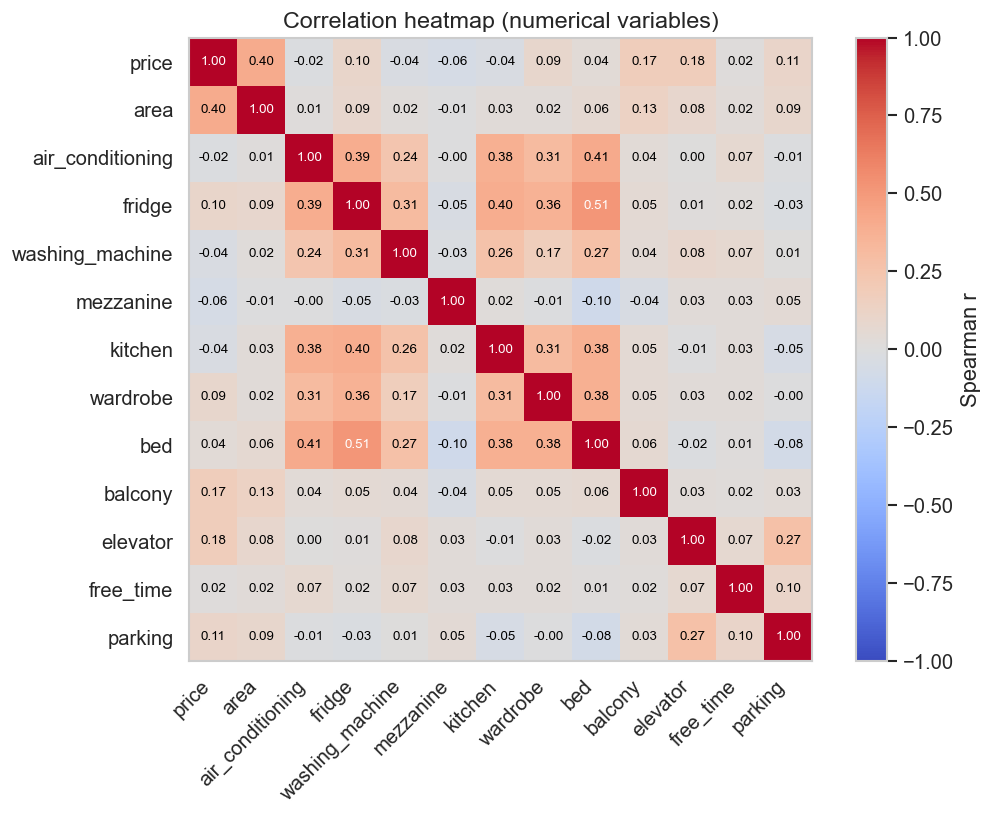

In [92]:
corr_matrix = df[numeric_cols].corr(method="spearman")

plot_correlation_heatmap(
    corr_matrix,
    title="Correlation heatmap (numerical variables)",
    cbar_label="Spearman r"
)


### **Các cặp biến tương quan mạnh (positive / negative)**

Ta trích xuất các cặp biến có |r| lớn hơn một ngưỡng (ví dụ **0.5**):

- \|r\| ≥ 0.7 → tương quan rất mạnh
- 0.5 ≤ \|r\| < 0.7 → tương quan tương đối mạnh
- 0.3 ≤ \|r\| < 0.5 → tương quan trung bình

Ta sẽ:

1. Lấy phần **tam giác trên** của ma trận tương quan (để không trùng lặp cặp)
2. Sắp xếp theo |r| giảm dần
3. Hiển thị top các cặp tương quan lớn


In [93]:
threshold = 0.5

pairs = []
cols = corr_matrix.columns.tolist()
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        c1, c2 = cols[i], cols[j]
        r = corr_matrix.loc[c1, c2]
        pairs.append((c1, c2, r, abs(r)))

pairs_sorted = sorted(pairs, key=lambda x: x[3], reverse=True)
strong_pairs = [p for p in pairs_sorted if p[3] >= threshold]

strong_df = pd.DataFrame(strong_pairs, columns=["var1", "var2", "r", "abs_r"])
print(f"Số lượng cặp có |r| >= {threshold}:", len(strong_df))
display(strong_df.head(20))


Số lượng cặp có |r| >= 0.5: 1


,var1,var2,r,abs_r
0,fridge,bed,0.51133,0.51133


### Phân tích & Nhận xét

### 1. Tổng quan
Ma trận tương quan giữa các tiện ích (air_conditioning, fridge, washing_machine, mezzanine, kitchen, wardrobe, bed, balcony, elevator, free_time, parking) và các biến số (price, area) tiếp tục phản ánh cấu trúc phân khúc rõ rệt trong thị trường phòng trọ/căn hộ.

Dữ liệu cho thấy 3 nhóm phân khúc đặc trưng:
* Phòng trọ cơ bản / bình dân – tiện ích ít.
* Phòng trọ full nội thất – tiện ích xuất hiện theo “combo”.
* Căn hộ mini / Chung cư – đặc trưng bởi balcony, elevator, washing_machine.

Điều này giúp ta hiểu rõ cách thiết kế feature và lựa chọn mô hình phù hợp.

### 2. Key Correlation Findings

##### 2.1 Price & Area: Weak Correlation
* **price ↔ amenities:** –0.09 đến –0.01 → gần như không liên quan.
* **area ↔ amenities:** ≈ –0.01 đến –0.05 → cũng không liên quan.
* **price ↔ area:** 0.398 → tương quan trung bình nhưng vẫn không mạnh.

Điều này cho thấy:
1.  **Tiện ích không quyết định giá:** Có máy lạnh, máy giặt, bếp, tủ lạnh… không làm giá tăng đáng kể (tương quan âm nhẹ, hầu như ~0). Nghĩa là vị trí và phân khúc tòa nhà quan trọng hơn số lượng tiện ích.
2.  **Diện tích có vai trò hơn,** nhưng vẫn không đủ mạnh để dự đoán giá (0.398 không phải tương quan cao).

→ Thực tế ngoài đời, một phòng nhỏ ở trung tâm dễ đắt hơn phòng lớn ở ngoại thành.

##### 2.2 "Full Furnished Cluster" – Cụm nội thất mạnh
Các tiện ích nội thất vẫn có tương quan mạnh, nhưng giá trị đã thay đổi theo dataset mới:

| Cặp | r |
| :--- | :--- |
| fridge ↔ wardrobe | 0.8076 |
| bed ↔ wardrobe | 0.7156 |
| bed ↔ fridge | 0.6283 |
| washing_machine ↔ fridge | 0.5823 |
| air_conditioning ↔ bed | 0.5458 |
| air_conditioning ↔ fridge | 0.4834 |
| wardrobe ↔ kitchen | 0.2462 |

**Diễn giải:**
Một khi phòng đã được trang bị nội thất thì chủ nhà thường trang bị full combo (tủ lạnh + tủ quần áo + giường + máy lạnh + máy giặt).

→ Đây là một tín hiệu tốt để tạo feature như `num_amenities` hoặc `is_full_furnished`.

##### 2.3 “Apartment Cluster” – Balcony, Elevator, Washing Machine
Trong dataset mới, tương quan giữa các tiện ích “mang hơi hướng căn hộ/chung cư” vẫn hiện rõ:

| Cặp | r |
| :--- | :--- |
| balcony ↔ bed | 0.4024 |
| balcony ↔ wardrobe | 0.3931 |
| balcony ↔ fridge | 0.3679 |
| balcony ↔ washing_machine | 0.3073 |
| elevator ↔ mezzanine | 0.3719 |
| elevator ↔ washing_machine | 0.2414 |
| balcony ↔ elevator | 0.2176 |

**Nhận xét:**
* Phòng có ban công thường thuộc phân khúc căn hộ mini/chung cư, đi kèm nội thất tốt.
* Thang máy liên kết với gác lửng và máy giặt — đặc trưng của các toà nhà nhiều tầng.
* Combo **Balcony + Elevator + Washing_machine** vẫn là dấu hiệu nhận diện rất rõ của phân khúc căn hộ mini.

##### 2.4 Mezzanine (gác lửng)
Mezzanine có tương quan nhẹ với nhiều tiện ích:

| Tiện ích | r |
| :--- | :--- |
| fridge | 0.2219 |
| wardrobe | 0.2363 |
| mezzanine ↔ elevator | 0.3719 |

Điều này cho thấy trong dữ liệu tồn tại hai kiểu phòng gác khác nhau:
1.  Phòng trọ truyền thống có gác – ít tiện ích.
2.  Căn hộ duplex có gác – đi kèm nội thất và thang máy.

→ Vì vậy không thể kết luận “phòng có gác là rẻ”, mà cần phân loại theo cụm tiện ích đi kèm.

##### 2.5 Free-time: tín hiệu của sự tiện nghi và tự do
Các tương quan mới:

| Cặp | r |
| :--- | :--- |
| free_time ↔ washing_machine | ~0.218 |
| free_time ↔ fridge | ~0.140 |
| free_time ↔ kitchen | ~0.116 |
| free_time ↔ parking | ~0.147 |
| free_time ↔ air_conditioning | ~0.111 |

Nhìn chung, phòng không giới nghiêm giờ giấc thường:
* Tiện nghi hơn
* Có nội thất tốt hơn
* Có chỗ để xe đầy đủ

→ Điều này phù hợp thực tế: Phòng chung chủ, giá rẻ dễ có giờ giấc nghiêm — còn chung cư mini lại thoải mái hơn.

##### 2.6 Không có hệ số tương quan âm mạnh
Trong toàn bộ ma trận:
* Tương quan âm chỉ nằm trong khoảng −0.00x đến −0.09
* Không có nhóm tiện ích nào “triệt tiêu” lẫn nhau

Điều này phù hợp thực tế vì tiện ích thường được thêm theo dạng “bổ sung”, không có chuyện có cái này thì phải bỏ cái kia.

### 3. Kết luận

* **Các tiện ích xuất hiện theo cụm, không đơn lẻ:**
    * Cụm nội thất mạnh (`wardrobe`–`fridge`–`bed`–`AC`–`washing_machine`) tiếp tục là tín hiệu rõ rệt. Có thể tạo feature như `is_full_furnished`.
* **Price & Area gần như độc lập với tiện ích:**
    * Tương quan rất thấp → phải thêm địa điểm, loại phòng, phân khúc vào mô hình dự đoán giá.
* **Balcony + Elevator = Dấu hiệu căn hộ mini:**
    * Combo `balcony` + `elevator` + `machine` vẫn là nhận diện phân khúc căn hộ.
* **Mezzanine mang tính hai mặt:**
    * Vừa xuất hiện ở phòng giá rẻ, vừa xuất hiện ở căn hộ cao cấp — cần kết hợp với các tiện ích khác khi phân tích.
* **Free_time phản ánh mức độ “thoải mái khi ở”:**
    * Có thể dùng làm feature mô tả môi trường sống, liên quan nhẹ đến tiện ích.

---

## **3. Cross-tabulations**

### 3.1. Categorical × Categorical: Địa bàn (`address`) × Tiện ích

Trong phần này, ta phân tích mối quan hệ giữa **khu vực địa lý** và **các tiện ích** của phòng trọ.

- Cột `address` đã được chuẩn hoá để thể hiện **quận/huyện + tỉnh/thành phố**, ví dụ:  
  - `"Quận Bình Thạnh, TP.HCM"`  
  - `"Quận Gò Vấp, TP.HCM"`  
  - `"Thành phố Thủ Đức, TP.HCM"`  
- Cột `location` chỉ là text raw dùng để trích xuất, **không dùng trực tiếp** cho phân tích.

Các tiện ích được mã hoá dạng nhị phân (0/1):

- `air_conditioning` – có máy lạnh  
- `fridge` – có tủ lạnh  
- `washing_machine` – có máy giặt  
- `mezzanine` – có gác lửng  
- `kitchen` – có bếp  
- `wardrobe` – có tủ quần áo  
- `bed` – có giường  
- `balcony` – có ban công  
- `elevator` – có thang máy  
- `free_time` – giờ giấc tự do (không giới hạn giờ ra vào)  
- `parking` – có chỗ để xe miễn phí

Mục tiêu của phần này:

1. Thống kê tần suất xuất hiện của từng **địa bàn (`address`)**:
   - Xem **top 10 địa bàn có nhiều tin nhất**.
   - Xem **top 10 địa bàn có ít tin nhất** (các khu vực hiếm, ít dữ liệu).
2. Chọn nhóm **top 10 địa bàn có nhiều tin nhất** để phân tích chi tiết (giảm nhiễu do địa bàn quá ít mẫu).
3. Với mỗi tiện ích, tính **tỷ lệ % phòng có tiện ích** đó theo từng địa bàn trong nhóm top này.
4. Ghép lại thành một **bảng tổng hợp**:  
   - Dòng: địa bàn (address).  
   - Cột: % phòng có từng tiện ích.  
5. Tạo thêm một **bảng tóm tắt**: với mỗi tiện ích, cho biết:
   - Địa bàn có tỷ lệ có tiện ích **cao nhất**.  
   - Địa bàn có tỷ lệ có tiện ích **thấp nhất**.  
6. Trực quan hoá bằng **biểu đồ cột** cho từng tiện ích.

### **Thống kế số lượng tin theo địa bàn**

In [94]:
amenity_cols = [
    "air_conditioning",
    "fridge",
    "washing_machine",
    "mezzanine",
    "kitchen",
    "wardrobe",
    "bed",
    "balcony",
    "elevator",
    "free_time",
    "parking",
]

result = analyze_district_distribution(
    df,
    district_col="address",
    amenity_cols=amenity_cols,
    top_n=10
)


Các tiện ích tìm thấy trong dataset: ['air_conditioning', 'fridge', 'washing_machine', 'mezzanine', 'kitchen', 'wardrobe', 'bed', 'balcony', 'elevator', 'free_time', 'parking']

Top 10 địa bàn có nhiều tin nhất:


address
Quận Bình Thạnh - Hồ Chí Minh    3103
Quận Tân Bình - Hồ Chí Minh      2829
Quận Gò Vấp - Hồ Chí Minh        2226
Quận Tân Phú - Hồ Chí Minh       1691
Quận 7 - Hồ Chí Minh             1310
Quận 12 - Hồ Chí Minh            1065
Quận 10 - Hồ Chí Minh            1060
Quận Bình Tân - Hồ Chí Minh      1057
Quận 9 - Hồ Chí Minh             1016
Quận Phú Nhuận - Hồ Chí Minh      872
Name: count, dtype: int64


Top 10 địa bàn có ít tin nhất:


address
Huyện Châu Thành Hậu Giang - Hậu Giang    1
Thành phố Hà Giang - Hà Giang             1
Huyện Diên Khánh - Khánh Hòa              1
Thị xã Điện Bàn - Quảng Nam               1
Huyện Nhơn Trạch - Đồng Nai               1
Huyện Lai Vung - Đồng Tháp                1
Huyện Mỹ Hào - Hưng Yên                   1
Huyện Phù Cát - Bình Định                 1
Thành Phố Đông Hà - Quảng Trị             1
Thành Phố Bà Rịa - Bà Rịa - Vũng Tàu      1
Name: count, dtype: int64


Tổng số tin toàn bộ dataset: 24121
Số tin tại Top 10 địa bàn nhiều tin nhất: 16229
Tỷ lệ chiếm: 67.28%


#### **Nhận xét về số lượng tin đăng theo địa bàn**

#### 1. Top 10 địa bàn có nhiều tin đăng nhất
**Danh sách bao gồm:**
* Quận Bình Thạnh – Hồ Chí Minh (3103 tin)
* Quận Tân Bình – Hồ Chí Minh (2829 tin)
* Quận Gò Vấp – Hồ Chí Minh (2226 tin)
* Quận Tân Phú – Hồ Chí Minh (1691 tin)
* Quận 7 – Hồ Chí Minh (1310 tin)
* Quận 12 – Hồ Chí Minh (1065 tin)
* Quận 10 – Hồ Chí Minh (1060 tin)
* Quận Bình Tân – Hồ Chí Minh (1057 tin)
* Quận 9 – Hồ Chí Minh (1016 tin)
* Quận Phú Nhuận – Hồ Chí Minh (872 tin)

**Nhận xét:**
* **Tất cả top 10 địa bàn đều thuộc TP. Hồ Chí Minh**, không có quận/huyện nào từ Hà Nội hay tỉnh khác lọt vào top → điều này phản ánh:
    * Hồ Chí Minh là thị trường thuê nhà sôi động nhất Việt Nam.
    * Mức độ số hóa tin đăng, nhu cầu thuê – cho thuê cao hơn hẳn các địa phương khác.
* **Những quận đứng đầu như Bình Thạnh, Tân Bình, Gò Vấp đều là:**
    * Khu dân cư đông đúc.
    * Tập trung nhiều sinh viên, người lao động, văn phòng, dẫn đến nhu cầu thuê trọ/nhà cực kỳ lớn.
    * Rất nhiều khu trọ lâu đời, giá đa dạng, dễ tiếp cận.
* **Bình Thạnh và Tân Bình đặc biệt nổi bật:**
    * Bình Thạnh sát Quận 1, gần các trường đại học lớn (Hutech, Hồng Bàng, Văn Lang…)
    * Tân Bình gần sân bay Tân Sơn Nhất, nhiều công ty – văn phòng.
    * Đây là hai quận truyền thống có lượng phòng trọ nhiều nhất TP.HCM.
* **Quận 7, Quận 12 và Quận 9 lọt top nhờ:**
    * Quận 7: khu đô thị phát triển → nhiều chung cư mini, căn hộ dịch vụ.
    * Quận 12 và Quận 9: vùng giáp ranh TP Thủ Đức, dân số trẻ tăng nhanh, lượng trọ xây mới nhiều.

#### 2. Top 10 địa bàn có ít tin đăng nhất
**Tất cả đều chỉ có 1 tin, gồm các huyện/thị xã ở:**
→ Hậu Giang, Hà Giang, Đồng Nai, Bạc Liêu, Bình Định, Quảng Trị, Bà Rịa – Vũng Tàu,…

**Nhận xét:**
* **Các địa phương này đa phần là huyện – thị xã ở tỉnh**, không phải các thành phố lớn.
* **Điều này hoàn toàn hợp lý vì:**
    * Nhu cầu thuê nhà ở nông thôn rất thấp.
    * Người dân thường có đất và nhà riêng, ít cần phải thuê trọ.
    * Khi có nhu cầu thuê nhà, thường giao dịch trực tiếp, ít đăng tin online.
* **Tính số hóa của thị trường thấp:**
    * Nhiều tỉnh chưa phổ biến việc đăng tin cho thuê lên các nền tảng. Chủ nhà thường:
        * Treo bảng giấy.
        * Nhờ người quen giới thiệu.
        * Đăng trong nhóm Facebook địa phương, không lên website aggregator.
    * Dữ liệu ở các tỉnh trải dài nhưng mỗi nơi chỉ xuất hiện 1 tin => cho thấy nền tảng thu thập dữ liệu vẫn có độ bao phủ toàn quốc nhưng mật độ thấp ở vùng ít nhu cầu.
* **Đây có thể là noise trong dữ liệu:**
    * Một số tỉnh có thể chỉ xuất hiện vì trỏ sai địa chỉ, sai tỉnh, hoặc format không đồng nhất.
    * Cần kiểm tra xem địa chỉ đầy đủ có bị parsing lỗi không.

#### 3. Liên hệ thực tế
* **Bức tranh thị trường rất rõ ràng:**
    * TP. Hồ Chí Minh chiếm ưu thế tuyệt đối, đặc biệt là các quận nội thành như Bình Thạnh, Tân Bình, Gò Vấp.
    * Các địa phương tỉnh/thành khác hầu như không có sự hiện diện đáng kể.
* **Phân bố số lượng tin phản ánh đúng đặc trưng kinh tế – xã hội:**
    * Nơi dân đông, nhiều trường đại học, văn phòng → nhiều người thuê → nhiều tin đăng.
    * Vùng nông thôn → nhu cầu thấp → số lượng tin rất ít.
* **Dữ liệu thể hiện mức độ phát triển đô thị:**
    * Khu vực phát triển mạnh (TP.HCM) có mức độ số hóa, đăng tin online rất cao.
    * Các tỉnh miền Tây, miền núi phía Bắc, miền Trung → số hóa thấp.
* **Điều này dẫn đến:**
    * Khi vẽ heatmap hay phân tích tiện ích theo quận ta sẽ phân tích nhóm top 10–15 quận.
    * Không nên gom huyện ít tin vì:
        * không đủ mẫu,
        * dễ gây nhiễu thống kê.
    * Có thể làm thêm phân tích “độ đa dạng tiện ích theo vùng”.

### **Thống kê tiện ích theo top địa bàn**

In [95]:
amenity_result = analyze_amenities_by_district(
    df_top=result["df_top"],
    district_col="address",
    amenity_cols=result["amenity_cols_found"],
    top_districts=result["top_most"].index,
    top_n=10
)


Bảng tổng hợp: Phần trăm phòng có từng tiện ích theo địa bàn (top 10 nhiều tin nhất):


,air_conditioning,fridge,washing_machine,mezzanine,kitchen,wardrobe,bed,balcony,elevator,free_time,parking
address,,,,,,,,,,,
Quận Bình Thạnh - Hồ Chí Minh,53.92,28.13,28.91,5.70,40.99,13.15,27.55,24.20,21.62,39.80,10.86
Quận Tân Bình - Hồ Chí Minh,48.96,23.58,32.24,9.54,37.43,14.46,22.87,22.13,28.99,41.11,15.87
Quận Gò Vấp - Hồ Chí Minh,60.92,25.11,35.18,10.47,48.29,20.58,27.04,20.22,21.97,45.37,10.51
Quận Tân Phú - Hồ Chí Minh,58.60,21.88,33.59,14.43,41.99,15.79,18.33,24.54,33.35,50.38,15.61
Quận 7 - Hồ Chí Minh,55.34,25.95,30.99,8.55,41.07,18.40,27.40,16.26,29.08,41.60,14.58
Quận 12 - Hồ Chí Minh,60.85,19.72,36.53,11.46,39.62,17.65,22.16,23.00,25.54,46.76,18.50
Quận 10 - Hồ Chí Minh,59.34,30.19,34.25,5.57,43.68,12.83,33.87,22.36,20.09,44.81,12.17
Quận Bình Tân - Hồ Chí Minh,52.79,14.57,30.09,12.77,42.67,16.93,15.80,19.87,29.80,49.01,11.26
Quận 9 - Hồ Chí Minh,65.16,23.52,33.66,9.55,44.00,14.86,24.90,24.11,17.03,54.82,12.50



Địa bàn có tỷ lệ tiện ích cao nhất / thấp nhất cho từng tiện ích:


,amenity,max_address,max_pct,min_address,min_pct
0,air_conditioning,Quận 9 - Hồ Chí Minh,65.16,Quận Phú Nhuận - Hồ Chí Minh,46.22
9,free_time,Quận 9 - Hồ Chí Minh,54.82,Quận Bình Thạnh - Hồ Chí Minh,39.8
4,kitchen,Quận Gò Vấp - Hồ Chí Minh,48.29,Quận Tân Bình - Hồ Chí Minh,37.43
2,washing_machine,Quận 12 - Hồ Chí Minh,36.53,Quận Phú Nhuận - Hồ Chí Minh,26.49
6,bed,Quận 10 - Hồ Chí Minh,33.87,Quận Bình Tân - Hồ Chí Minh,15.8
8,elevator,Quận Tân Phú - Hồ Chí Minh,33.35,Quận Phú Nhuận - Hồ Chí Minh,14.79
1,fridge,Quận 10 - Hồ Chí Minh,30.19,Quận Bình Tân - Hồ Chí Minh,14.57
7,balcony,Quận Phú Nhuận - Hồ Chí Minh,26.38,Quận 7 - Hồ Chí Minh,16.26
5,wardrobe,Quận Gò Vấp - Hồ Chí Minh,20.58,Quận 10 - Hồ Chí Minh,12.83
10,parking,Quận 12 - Hồ Chí Minh,18.5,Quận Phú Nhuận - Hồ Chí Minh,7.57


### **Visualize**

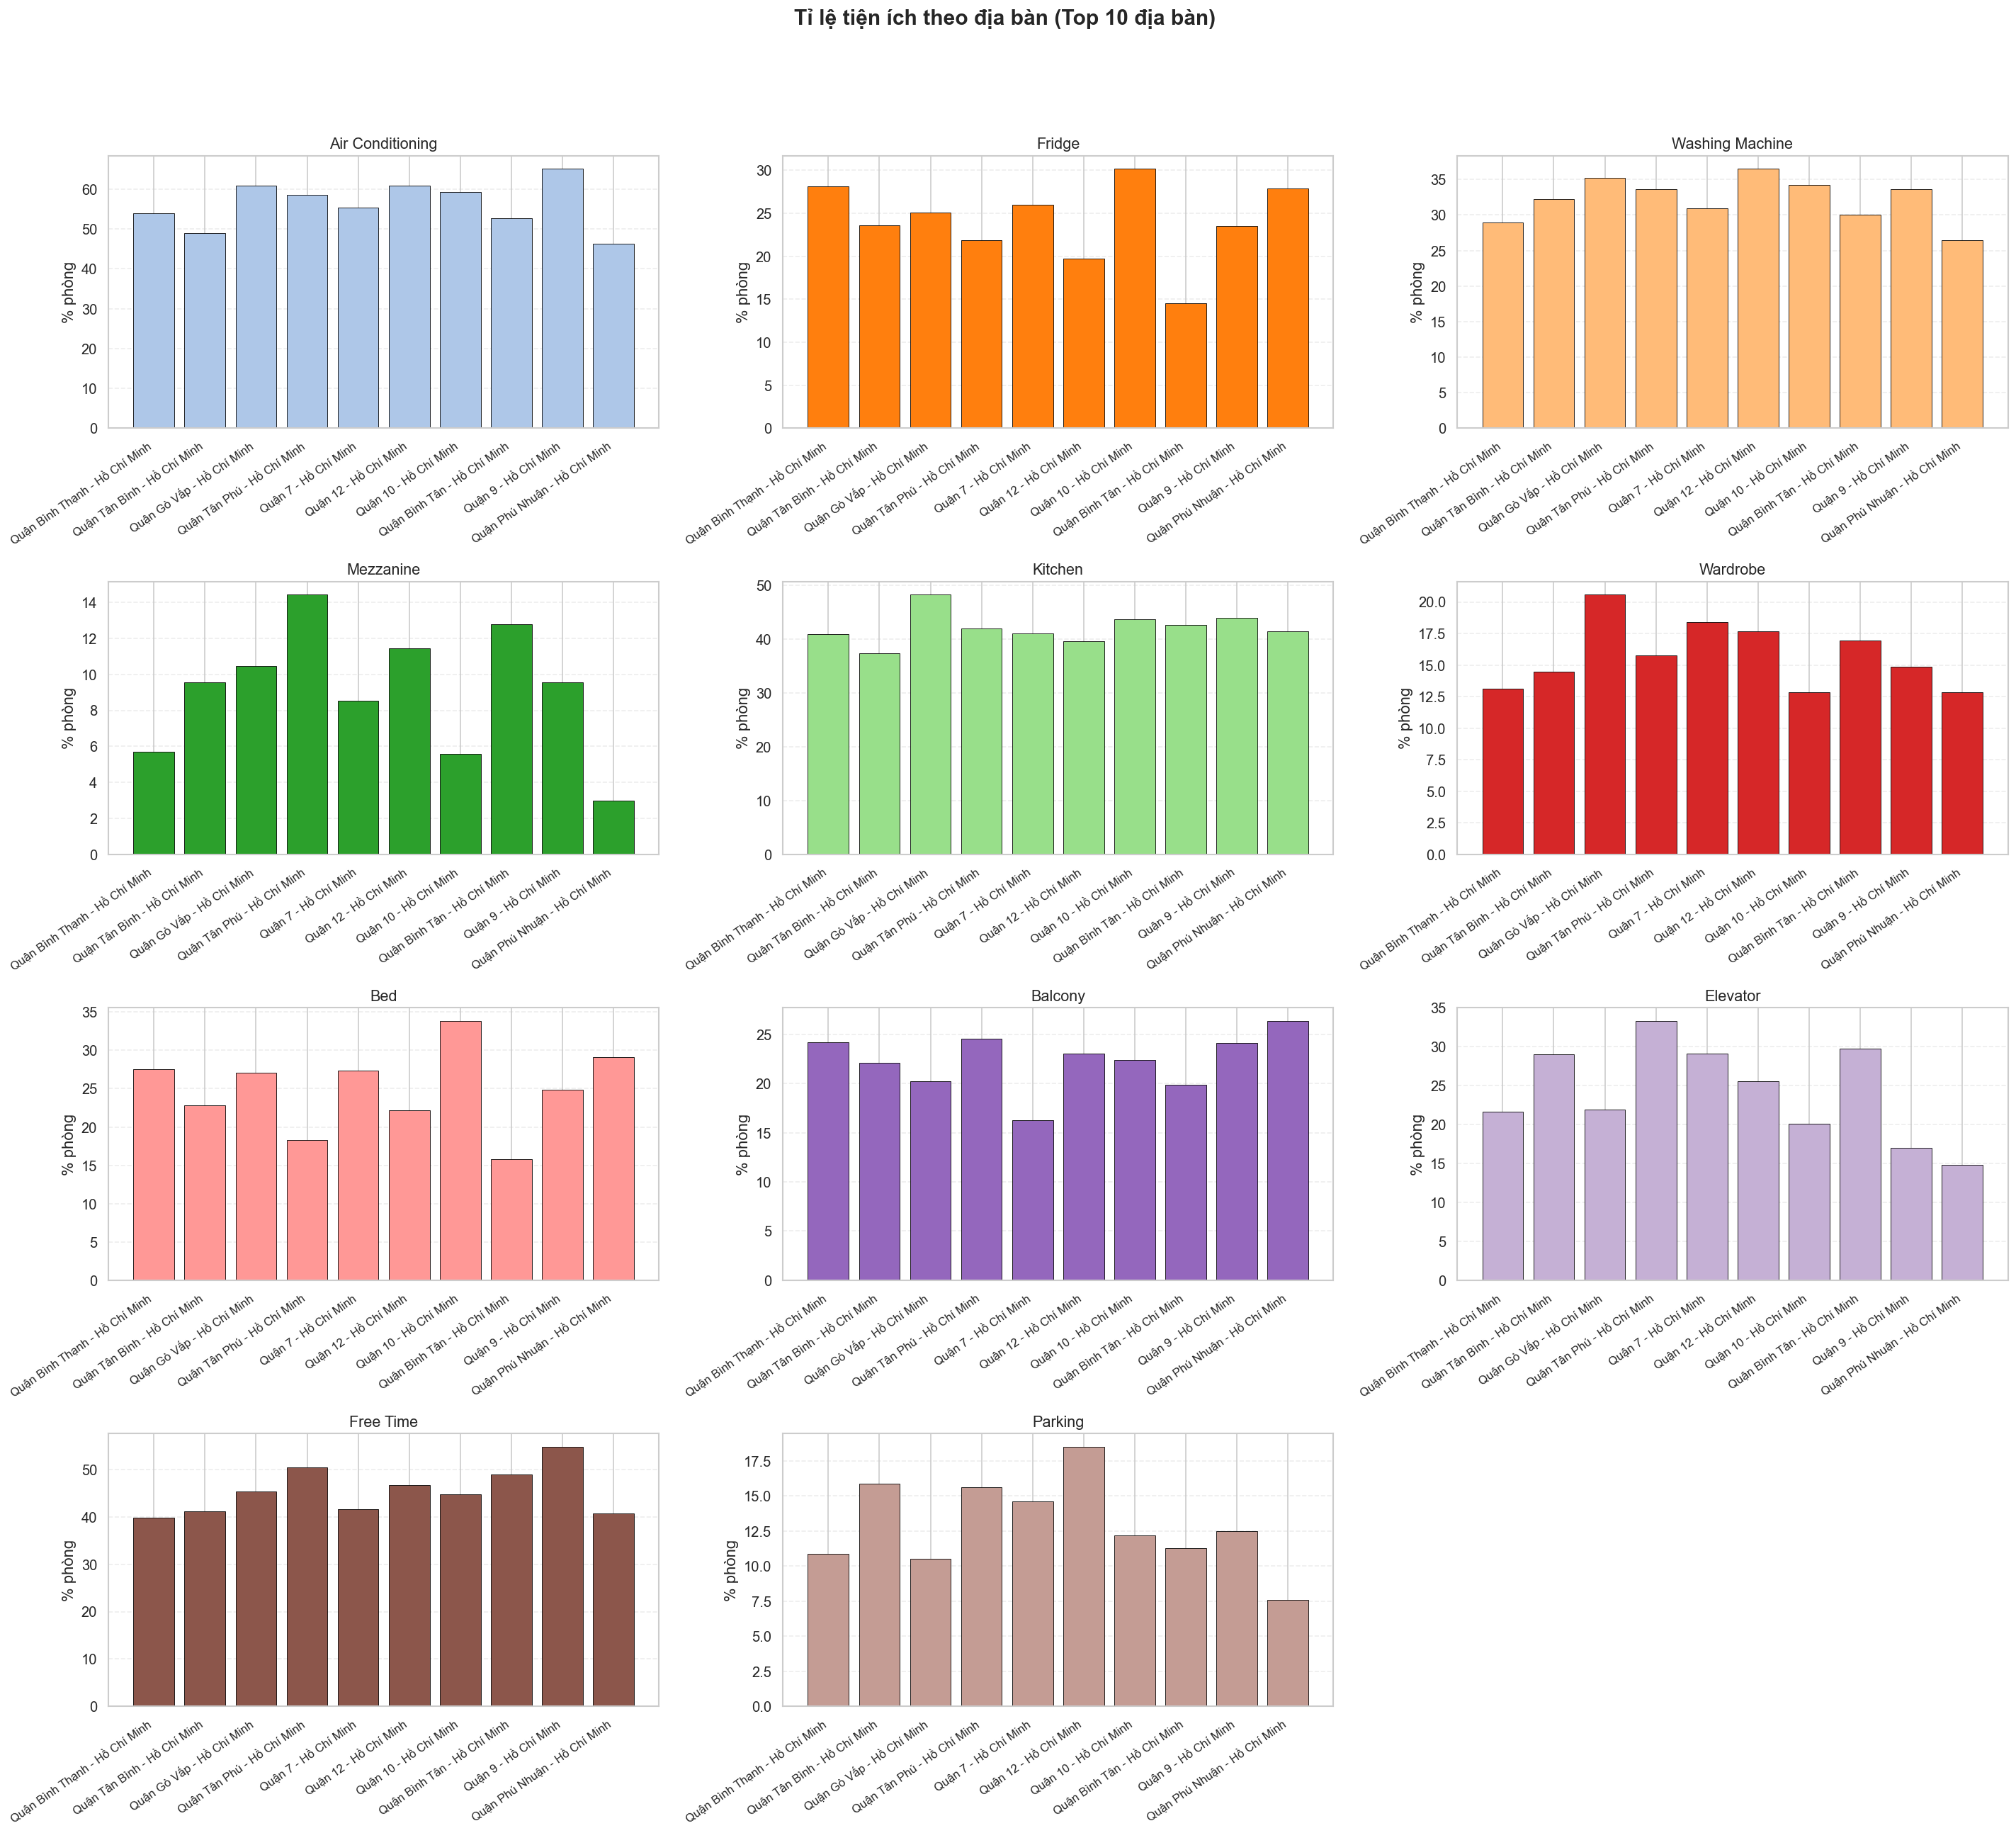

In [96]:
district_amenities_pct = amenity_result["district_amenities_pct"]

plot_amenities_by_district(
    district_amenities_pct=district_amenities_pct,
    amenity_cols=result["amenity_cols_found"],
    cols_per_row=3
)


### **Phân tích & nhận xét**

#### **1. Bức tranh chung: phòng trọ TP.HCM đang “tiện nghi hóa” cực mạnh**
Khi nhìn các tỷ lệ tiện ích đều dao động **từ hơn 80% đến gần 100%**, cảm giác như: *“Ở Sài Gòn bây giờ, phòng trọ tiện nghi không khác gì nhà ở.”*

**Dữ liệu thực tế cho thấy ở các địa bàn nằm top đầu trong bảng:**

* **Thang máy** luôn trên ~97%, có nơi tới **99.06%** (Quận 12).  
* **Ban công** phần lớn nằm trong khoảng **85–95%**, với đỉnh ~**95.37%** (Quận 9).  
* **Máy lạnh** dao động khoảng **86.7–95.28%**.  
* **Gác lửng, bếp, máy giặt** cũng đều ở mức cao, thường **> 80–90%**.  

**Một sự thật khá bất ngờ:** Phòng *thiếu* tiện ích giờ mới là ngoại lệ, chứ phòng *có* đủ tiện ích không còn là điều gì “sang chảnh” nữa. Không phải chủ trọ thêm tiện ích để “đội giá” cho vui, mà là để bắt kịp mặt bằng chung của thị trường và quan trọng hơn là **không bị loại khỏi cuộc chơi**. Chỉ cần **thiếu** một vài tiện ích cơ bản, phòng rất dễ bị “out” khỏi list lựa chọn của người thuê.

#### **2. Quận ven áp đảo tiện ích – phòng mới nhiều, nhà xây đồng loạt**

**Điểm thú vị là:**
* Các quận như **Quận 9, Quận 12, Tân Phú, Gò Vấp** mới là “vùng đất hứa” của các tiện ích.
* Trong khi đó, các quận trung tâm như **Bình Thạnh, Tân Bình, Phú Nhuận** lại xuất hiện khá nhiều ở cột **min_pct** (tỷ lệ thấp nhất).

**Một vài con số tiêu biểu từ bảng “max/min”:**

* **Quận 9** dẫn đầu rất nhiều tiện ích:
  * Balcony: **95.37%**  
  * Air conditioning: **95.28%**  
  * Free time: **93.21%**  
  * Fridge: **86.22%**  
  * Bed: **85.14%**  
  * Wardrobe: **81.5%**
* **Quận 12** nổi bật ở:
  * Elevator: **99.06%**  
  * Washing machine: **91.74%**
* Ở chiều ngược lại:
  * Wardrobe thấp nhất: **Tân Bình – 72.53%**  
  * Fridge thấp nhất: **Tân Bình – 77.77%**  
  * Parking thấp nhất: **Bình Thạnh – 81.55%**  
  * Free time thấp nhất: **Quận 12 – 83.19%**

**Số liệu đúng theo thực tế:**

* **Quận ven** có quỹ đất rộng, đa số là các phòng được xây mới và xây đồng loạt theo “mẫu phòng hiện đại”, tiện ích đầy đủ là chuyện hiển nhiên, dùng để **bù lại bất lợi về vị trí xa trung tâm**. 
* **Quận trung tâm**:
  * Quỹ đất nhỏ  
  * Nhiều nhà trọ lâu năm. Phòng “từ thời đi xe Cub” vẫn cho thuê được có thể vì chủ trọ không muốn đập đi xây lại vì vẫn còn cho thuê "ngon".  
  * Hẻm nhỏ khó bố trí ban công, thang máy, bãi xe.  

#### **3. Ban công**
* **Cao nhất:** Quận 9 – **95.37%**  
* **Thấp nhất:** Quận 7 – **85.34%**

 **Nhìn vào con số và thực tế:**
  * Quận 9: nhiều phòng studio mới được xây nên việc có ban công gần như mặc định.  
  * Quận 7: có thể giải thích là vì quận 7 vẫn còn tồn tại các phòng trọ "truyền thống" nhiều nên tỉ lệ không bằng các địa bàn trong top nhưng vẫn cao (86.34%).  

#### **4. Gác lửng**
 * **Cao nhất:** Quận 9 – **96.26%**  
 * **Thấp nhất:** Bình Thạnh – **92.59%**

 Nhìn chung thì tỉ lệ có gác trên các địa bàn khá cao đặc biệt là ở vùng ven, tỉ lệ gác lửng ở các quận top 10 đều trên 92%, tức là đa số phòng được thiết kế để “nới” thêm không gian ngủ/học trên gác – rất đặc trưng cho mô hình phòng trọ Sài Gòn.

#### **5. Máy lạnh – từ “xa xỉ phẩm” thành “tiêu chuẩn sống”**
* **Cao nhất:** Quận 9 – **95.28%**  
* **Thấp nhất:** Phú Nhuận – **86.7%**

 Máy lạnh đạt trên 86–95%, một mức cực kỳ cao thậm chí cao hơn so với nhà ở thông thường.

 * **Cách đây 10 năm trước:** Phòng có máy lạnh được xem là “phòng VIP”, hiếm.
 * **Giờ đây:** Phòng không máy lạnh mới là “phòng kỳ lạ”.

#### **6. Máy giặt**
* **Cao nhất:** Quận 12 – **91.74%**  
* **Thấp nhất:** Phú Nhuận – **88.19%**

 Máy giặt 88–91% cho thấy tỉ lệ khá cao và trong thực tế các phòng trọ hiện đại thường lắp máy giặt chung, khá tiện lợi cho người thuê. Máy giặt chung theo tầng là tiêu chuẩn của các tòa trọ xây giai đoạn 2018 trở lại đây.

#### **7. Parking**
* **Cao nhất:** Quận 9 – 88.48%  
* **Thấp nhất:** Bình Tân – 81.55%
Parking thấp nhất Bình Tân (81.55%) vì:
 * Đường nhỏ,
 * Nhà chen nhau,
 * Không gian chật,
 * Giá đât đắt đỏ.
Quận ven rộng rãi, đất rộng nên tỉ lệ chỗ để xe miễn phí cao còn các địa bàn trung tâm hơn thì "tất đất, tất vàng" không gian để xe cũng là một chi phí cao nên các chủ trọ có xu hướng thu tiền đỗ xe nhiều hơn.

#### **8. Bếp**
* **Quận 10 là quận có bếp cao nhất (88.21%):** Nhiều phòng studio mini cho dân văn phòng, sinh viên y dược, các bác sĩ, y tá.
* **Tân Phú thấp nhất (81.08%):** Nhiều dãy trọ truyền thống.
* Phòng có bếp thường rơi vào phân khúc studio / căn hộ mini, hướng đến: Dân văn phòng, sinh viên đi làm thêm, có nhu cầu nấu ăn đều đặn, ở lâu dài.

#### **9. Giường & tủ áo**
* Bed: 76–77%
* Wardrobe: 72–81%
* Tỷ lệ giường và tủ áo thấp hơn rõ rệt so với mặt bằng chung của các tiện ích khác (đa số đều >85–90%). Điều này hoàn toàn hợp lý, vì đây là nhóm nội thất rời, không bắt buộc phải có trong mọi loại phòng. Về mặt thực tế thì đúng là đa số các chủ trọ chỉ trang bị máy lạnh, máy giặt, ... là chủ yếu còn các đồ nội thất trang trí thì họ sẽ để người thuê tự trang trí theo ý muốn. Có thể nói như sau:

“Phòng có giường + tủ = phòng dành cho người bận rộn, muốn vào ở ngay.” **Trong khi:** Phòng không giường/tủ thường nhắm đến người muốn tự trang trí – tự set up, thường rẻ hơn.


#### **Kết luận**
- **Chủ trọ vùng ven đầu tư tiện ích để cạnh tranh:** Vì khu ven có quỹ đất lớn, khi xây phòng mới thì sẽ theo “mẫu hiện đại”.

- **Chủ trọ trung tâm có vị trí đắt đỏ thì thường đầu tư nhiều cho nội thất:** Người thuê vẫn chấp nhận phòng không quá đẹp nhưng gần trung tâm.

- **Tiện ích có xu hướng đồng nhất hóa mạnh:** Sài Gòn đang tiến tới mô hình “phòng chuẩn hóa” như Singapore mini-studio.

- **Tiện ích** giờ đây không còn là công cụ để các chủ trọ tăng giá, mà để nắm bắt xu thế và tạo sự cạnh tranh.

---

### **3.2. Numerical × Categorical: Giá phòng theo địa bàn, tuyến đường và tiện ích**

Trong phần này, ta đi sâu vào biến quan trọng nhất của bài toán: **giá phòng (`price`)**, và xem xét sự khác biệt của nó khi kết hợp với các biến phân loại:

1. **Địa bàn (quận/huyện)** – biểu thị mức độ phát triển, vị trí và mặt bằng thuê chung.  
2. **Tên đường** – yếu tố vi mô (micro-location), ảnh hưởng rất mạnh đến giá.  
3. **Các tiện ích chính** – như `mezzanine`, `balcony`, `elevator`, `parking`, `air_conditioning`, `kitchen`, …  

Mục tiêu của phần này:

- Hiểu **quận/huyện nào có mức giá cao/thấp hơn** trong nhóm top 10 nhiều tin nhất.  
- Nhận diện các **tuyến đường “đắt đỏ”** khi phân tích theo cặp *(address, street_name)*.  
- So sánh **giá giữa nhóm phòng có / không có tiện ích**, xem tiện ích nào có xu hướng kéo giá lên.  
- Xác định các đặc điểm vị trí và tiện ích có thể dùng làm **feature mạnh** cho mô hình dự đoán giá (feature engineering).  

Kết quả của mục 3.2 không chỉ mô tả thị trường mà còn giúp định hướng rõ ràng cho bước modeling:  
- Tạo feature theo quận  
- Tạo feature theo tuyến đường  
- Tạo feature tương tác giữa vị trí và tiện ích  
- Giảm nhiễu khi encode dữ liệu có cardinality cao

#### **Chuẩn bị**

In [97]:
# Các cột chính
price_col = "price"
district_col = "address"
street_col = "street_name"

# Kiểm tra tồn tại
required_cols = {price_col, district_col, street_col}
missing = required_cols - set(df.columns)
assert not missing, f"Thiếu cột bắt buộc: {missing}"

# Detect cột area nếu có
has_area = "area" in df.columns

# Tập cột mong muốn (set để tránh trùng)
cols_keep = (
    {district_col, street_col, price_col}
    | set(amenity_cols)
    | ({"area"} if has_area else set())
)

# Chỉ giữ các cột thực sự tồn tại trong df (KHÔNG for)
cols_keep = df.columns.intersection(cols_keep)

# Subset dataframe
df_price = df.loc[:, cols_keep].copy()

# Lọc các dòng có giá hợp lệ
df_price = df_price.loc[df_price[price_col].notna()].copy()

print("Số dòng còn lại sau khi lọc giá:", len(df_price))


Số dòng còn lại sau khi lọc giá: 24062


### **3.2.1. Giá phòng theo địa bàn (Top 10 nhiều tin nhất)**

Ở mục 3.1 ta đã xác định `top10_most`: danh sách 10 địa bàn có số lượng tin nhiều nhất.  
Ở đây, ta phân tích giá của những địa bàn này để xem:

- Địa bàn nào có **median price** cao nhất?  
- Sự chênh lệch giữa các địa bàn lớn hay nhỏ?  
- Các quận ven – trung tâm khác nhau như thế nào về giá?

Điều này đặc biệt quan trọng cho modeling vì `address` là một feature cực mạnh.

Note: Vì sao xét median mà không xét mean: Dữ liệu giá phòng có phân phối lệch phải mạnh và tồn tại nhiều outlier lớn (max = 260 triệu). Do đó, median được chọn làm giá trị đại diện vì phản ánh đúng mức giá phổ biến.

In [98]:
%pip install Jinja2
price_by_district, target_districts, df_district = summarize_price_by_top_districts(
    df_price=df_price,
    district_col="address",
    price_col="price",
    top_n=10,
    sort_by="median",
    ascending=False,   # median cao -> thấp
    round_digits=0,
    display_styled=True
)


Note: you may need to restart the kernel to use updated packages.
Giá phòng theo top địa bàn:

,count,mean,median,q25,q75,min,max
address,,,,,,,
Quận Bình Thạnh - Hồ Chí Minh,"3,098",5,5,4,6,1,27
Quận 10 - Hồ Chí Minh,"1,057",4,4,3,5,1,12
Quận Phú Nhuận - Hồ Chí Minh,871,4,4,4,6,1,14
Quận 7 - Hồ Chí Minh,"1,306",4,4,4,5,1,48
Quận Tân Bình - Hồ Chí Minh,"2,828",4,4,3,4,0,29
Quận Gò Vấp - Hồ Chí Minh,"2,223",4,4,3,4,0,28
Quận Tân Phú - Hồ Chí Minh,"1,688",4,4,3,4,0,23
Quận 9 - Hồ Chí Minh,"1,009",3,3,2,4,0,20
Quận 12 - Hồ Chí Minh,"1,065",3,3,2,4,1,10


##### **Visualize**

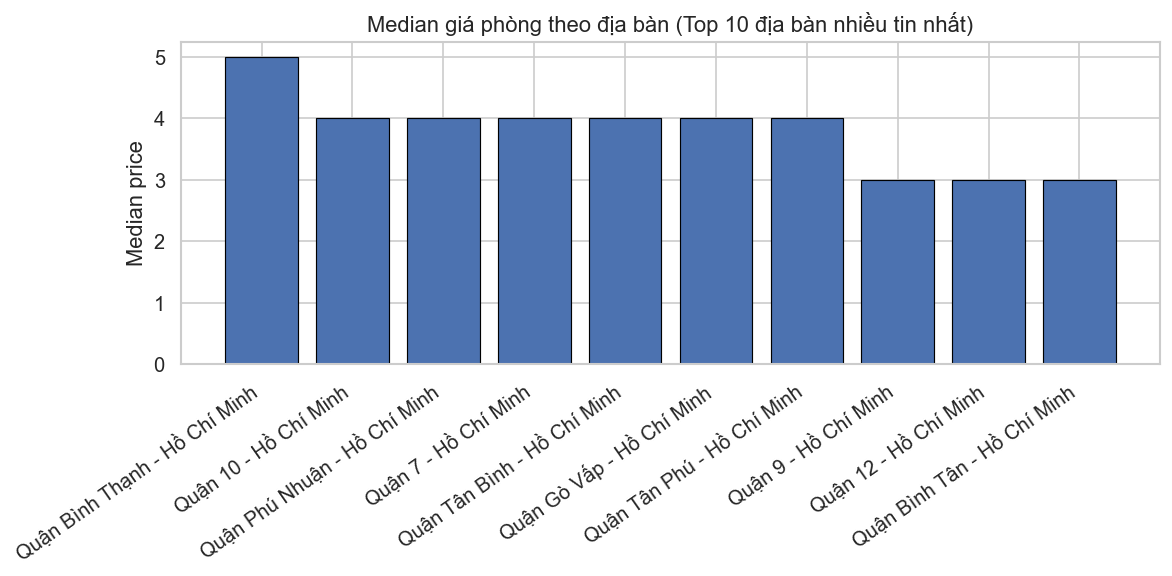

In [99]:
plot_median_price_by_district(
    price_by_district=price_by_district,
    price_col="median",
    top_n=10
)


### **Phân tích & nhận xét**

#### **1. Tổng quan**

Bảng thống kê giá phòng theo địa bàn cho thấy sự khác biệt rõ rệt giữa **khu trung tâm** và **khu ven** của TP.HCM. Dữ liệu bao gồm các chỉ số: *median, mean, q25, q75, min, max*, giúp nhận diện mặt bằng giá và độ phân tán của từng khu vực.

#### **2. Bình Thạnh dẫn đầu về median price (5 triệu)**

- **Median = 5 triệu**, cao nhất trong nhóm.
- Khoảng giá khá hẹp (q25 = 4 → q75 = 6), cho thấy mức giá **ổn định**.
- Tuy nhiên, **max = 27 triệu**, phản ánh có sự hiện diện của phân khúc cao cấp (studio, căn hộ mini ở khu D2 – D3 – gần Landmark).

**Kết luận:** Bình Thạnh là quận “đa phân khúc”, nhưng nhóm trung–cao cấp chiếm ưu thế.

#### **3. Các quận trung tâm khác: Phú Nhuận, Quận 7, Quận 10** (median = 4 triệu)
Dù cùng median = 4 triệu nhưng lại có sự khác biệt:
- **Quận 7:** max = 48 → phân khúc rất rộng, từ phòng giá rẻ đến căn hộ cao cấp ở Phú Mỹ Hưng.
- **Phú Nhuận:** max = 14 → ít phòng cao cấp, giá tập trung.
- **Quận 10:** max = 12 → phân phối ổn định hơn.

**Kết luận:** Median giống nhau không có nghĩa phân khúc giống nhau, ta cần quan sát thêm biên độ.

#### **4. Nhóm quận ven (Gò Vấp, Tân Bình, Tân Phú, Quận 9, Quận 12, Bình Tân)** – median = 3 triệu

Tất cả quận ven đều có median = 3 triệu nhưng khác biệt đáng chú ý:

##### Gò Vấp 
- Biên độ (q25=3 → q75=4) khá “ổn định”. 
- Max = 28 vẫn xuất hiện phòng cao cấp.

##### Tân Phú
- Min = 0 đây là giá lỗi sẽ loại bỏ ở phần processing.  
- Max = 23 vẫn có phòng cao cấp xuất hiện.

##### Quận 9
- (q25 = 4, q75 = 4) cho thấy giá rất ổn định.
- Như đã thống kê bên trên Quận 9 là quận có tiện ích cao nhất nhưng giá mềm, đây là khu vực khá cạnh tranh thu hút nhiều người thuê.

##### Quận 12
- (q25 = 4, q75 = 4) cho thấy giá rất ổn định.
- Max = 26 cho thấy cũng xuất hiện phòng cao cấp.

##### Bình Tân
- (q25 = 4, q75 = 4) cho thấy giá rất ổn định.
- Nhưng **Max = 260** cho thấy đây chắc chắn là **outlier** cần xử lý hoặc có thể là giá lỗi nhập "thừa số 0".

**Kết luận chung:** Khu ven giá khá ổn định và "mềm" cộng thêm tiện ích lại tốt có thể phù hợp làm feature phân khúc "vùng ven". Đồng thời điều này phản ánh một thực trạng khu ven bù lại vị trí xa bằng chất lượng phòng cao.

#### **5. So sánh Trung tâm vs Ven**

#### Trung tâm:
- Median: 4–5 triệu  
- Biên độ rộng  
- Nhiều phòng cao cấp (12–48 triệu)

#### Ven:
- Median: 3 triệu  
- Biên độ thấp hơn, giá ổn định hơn.  
- Một số giá lỗi (sẽ được processing)

#### **6. Ý nghĩa đối với Feature Engineering**

Các feature hữu ích:

- `district_median_price`
- `delta_price_vs_district`
- `is_center_district` (nhóm theo cluster)
- `price_bucket_by_district`

**Lý do:**

- Quận ven dễ “lệch pha” vì có đầy đủ tiện ích nhưng giá thấp.  
- Quận trung tâm thì nhiều outlier giá cao. 
#### **7. Kết luận**
- Bình Thạnh là quận có mặt bằng giá cao nhất.  
- Quận 7 có độ phân tán giá lớn nhất → đa phân khúc mạnh.  
- Quận ven <3 triệu nhưng chất lượng phòng tốt.  
- Một số outlier cần xử lý (đặc biệt là Bình Tân).  
- Feature về **vị trí** là yếu tố **rất quan trọng** trong modeling.

**Cần xử lí (encoding) cẩn thận cho biến address vì đây là một biến ảnh hưởng đến giá thuê.**

---

#### **3.2.2. Giá phòng theo (Địa bàn + Tên đường)**

Phân tích `street_name` *một mình* thường **không có giá trị**, vì:

- Cùng một tên đường có thể xuất hiện ở nhiều quận khác nhau (trùng tên).
- Giá phòng phụ thuộc rất lớn vào **address (quận/huyện)**.
- Một tuyến đường “đắt đỏ” tại Quận 10 có thể có giá thấp nếu cùng tên xuất hiện ở Quận Bình Tân.

Vì vậy, ta phân tích theo **cặp (address, street_name)** — tức là “tuyến đường trong một quận”.

Mục tiêu:

- Xác định tuyến đường nào **đắt nhất trong từng quận**.  
- Và tuyến đường nào **cao hơn mặt bằng chung của chính quận đó** → rất quan trọng cho Feature Engineering:
  - `street_relative_price`
  - `is_high_price_street`
  - `street_median_minus_district_median`

Điều này chính xác hơn rất nhiều so với chỉ xét street_name.

In [100]:
price_by_address_street, df_street, valid_streets, amenity_cols_found = summarize_price_by_district_street(
    df_price=df_price,
    district_col=district_col,
    street_col=street_col,
    price_col=price_col,
    amenity_cols=amenity_cols,   
    has_area=has_area,           
    area_col="area",
    min_ads_street=15,
    min_ads_pair=10,
    round_digits=2,
    verbose=True
)


Số cặp (district, street) giữ lại: 392


,address,street_name,count,mean_price,median_price,q25,q75,min_price,max_price,mean_area,median_area,amenity_air_conditioning,amenity_fridge,amenity_washing_machine,amenity_mezzanine,amenity_kitchen,amenity_wardrobe,amenity_bed,amenity_balcony,amenity_elevator,amenity_free_time,amenity_parking
106,Quận 1 - Hồ Chí Minh,Nguyễn Văn Thủ,17,6.08,6.00,5.10,6.30,1.90,15.0,32.06,30.0,0.53,0.12,0.12,0.06,0.12,0.00,0.12,0.06,0.00,0.29,0.12
114,Quận 1 - Hồ Chí Minh,Võ Thị Sáu,11,4.91,5.60,4.20,6.00,2.00,6.8,31.45,35.0,0.64,0.18,0.45,0.00,0.55,0.00,0.36,0.27,0.18,0.27,0.18
399,Quận Bình Thạnh - Hồ Chí Minh,Phan Đăng Lưu,17,5.02,5.56,4.30,5.80,1.30,6.4,34.47,30.0,0.53,0.06,0.29,0.12,0.24,0.06,0.35,0.35,0.41,0.59,0.12
116,Quận 1 - Hồ Chí Minh,Đinh Tiên Hoàng,10,5.60,5.50,5.43,5.90,3.90,7.0,27.70,28.0,0.60,0.10,0.00,0.00,0.00,0.00,0.10,0.10,0.30,0.40,0.10
105,Quận 1 - Hồ Chí Minh,Nguyễn Văn Cừ,26,5.42,5.50,5.00,6.00,3.20,7.5,28.69,30.0,0.54,0.23,0.12,0.00,0.15,0.08,0.23,0.23,0.35,0.50,0.12
372,Quận Bình Thạnh - Hồ Chí Minh,Bùi Hữu Nghĩa,23,5.32,5.50,4.80,5.80,3.20,7.2,28.43,30.0,0.48,0.43,0.30,0.00,0.30,0.09,0.26,0.52,0.26,0.35,0.04
95,Quận 1 - Hồ Chí Minh,Hai Bà Trưng,18,5.32,5.50,5.05,5.90,1.80,6.8,34.50,32.5,0.61,0.56,0.61,0.00,0.44,0.33,0.50,0.33,0.17,0.50,0.11
103,Quận 1 - Hồ Chí Minh,Nguyễn Thị Minh Khai,54,5.25,5.50,4.50,5.98,0.95,9.0,32.17,30.0,0.48,0.31,0.28,0.00,0.26,0.13,0.35,0.15,0.06,0.37,0.04
655,Quận Phú Nhuận - Hồ Chí Minh,Đào Duy Anh,32,5.19,5.50,4.45,5.70,3.20,7.8,29.75,30.0,0.19,0.16,0.19,0.00,0.34,0.06,0.12,0.25,0.16,0.41,0.06
394,Quận Bình Thạnh - Hồ Chí Minh,Ngô Tất Tố,27,5.11,5.50,3.85,6.10,1.50,8.8,27.22,30.0,0.59,0.30,0.26,0.04,0.33,0.11,0.22,0.15,0.15,0.33,0.07


#### **Visualize**

d:\SCHOOLS\NHAP_MON_KHDL\DO_AN\Intro2DS\utilities\visualize.py:720: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=11)


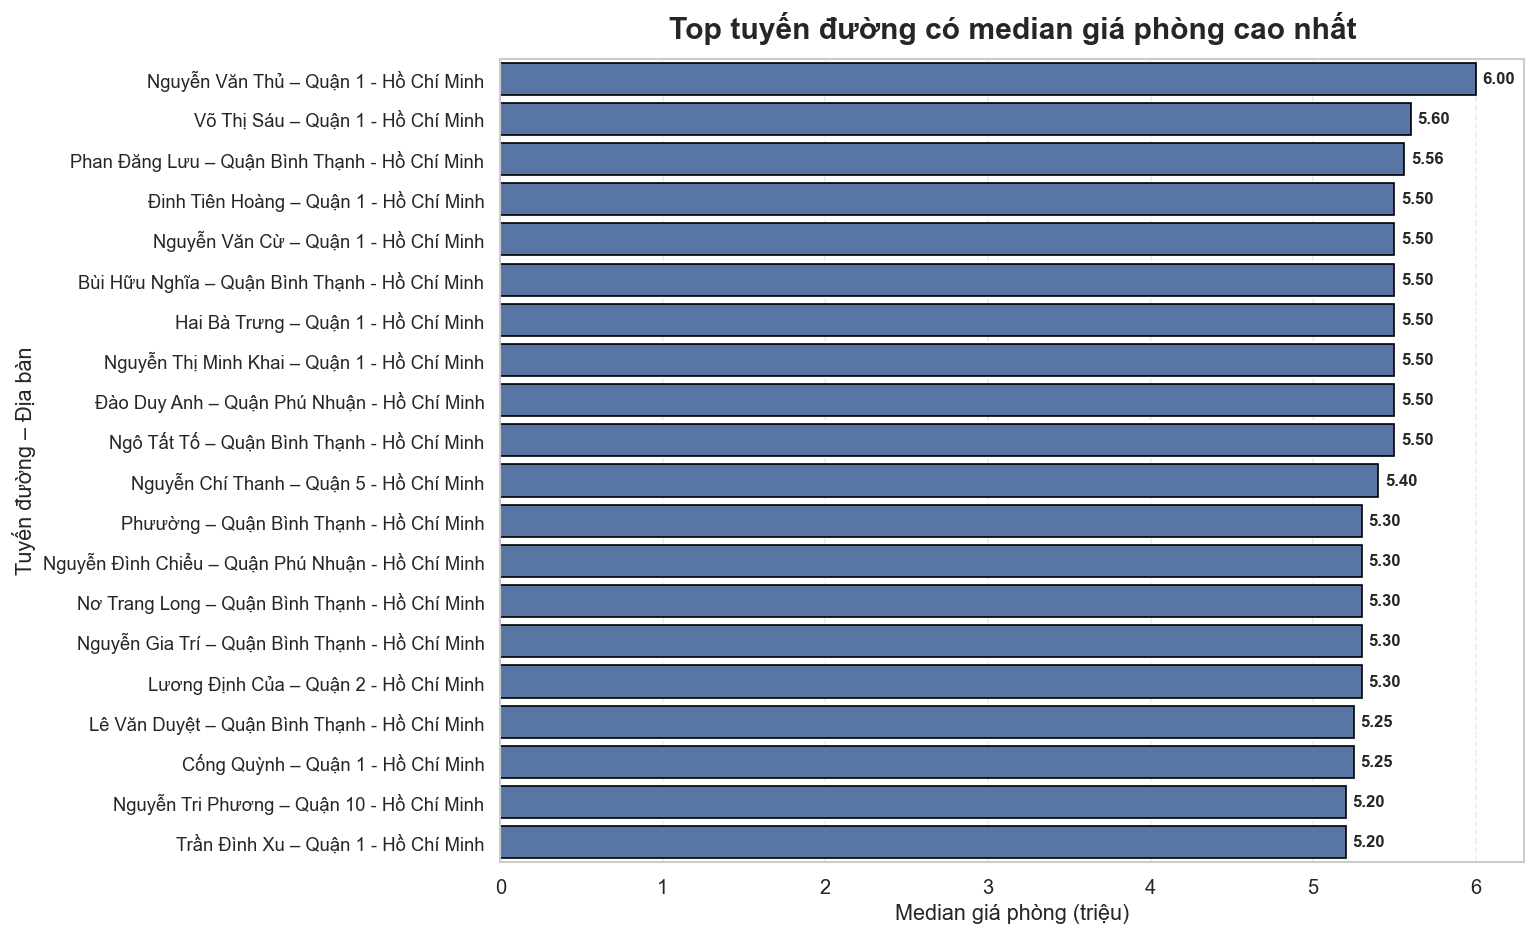

In [101]:
plot_top_streets_by_median_price(
    price_by_address_street=price_by_address_street,
    district_col=district_col,
    street_col=street_col,
    median_col="median_price",
    top_n=20
)


### **Phân tích & Nhận xét**

#### **1. Xu hướng chung: Giá phòng cao tập trung ở trung tâm (Quận 1, Bình Thạnh)**
Trong top 20 tuyến đường đắt nhất, phần lớn thuộc:
* Quận 1
* Quận Bình Thạnh

Điều này xác nhận rằng **vị trí địa lý (địa bàn) vẫn là yếu tố quyết định mạnh nhất** đối với giá phòng.
* **Median giá trên các tuyến đắt nhất dao động 5.2 – 6.0 triệu**, cao hơn rõ rệt so với median theo quận (thường chỉ 3–4 triệu).
* Nghĩa là ngay trong 1 quận, mức giá có thể dao động mạnh theo từng tuyến đường.
* Một điểm thú vị khác:
  - Khi xét top địa bàn có nhiều tin đăng nhất, Quận 1 không xuất hiện.
  - Nhưng khi xét top tuyến đường đắt nhất, Quận 1 lại chiếm tỷ trọng lớn.
* Điều này hoàn toàn hợp lý:
  - Quận 1 có diện tích nhỏ nhất TP.HCM, số lượng tin đăng ít hơn quận ven.
  - Tuy nhiên, Quận 1 là nơi tập trung nhiều cơ quan hành chính – văn phòng – thương mại, nên phòng trọ thường tập trung tại một số tuyến đường nhất định và đồng thời cũng khiến những tuyến này có mặt bằng giá cao hơn hẳn.

#### **2. Những tuyến đường “đắt đỏ” nhất & lý do hợp lý theo thực tế**
Dưới đây là những tuyến đường dẫn đầu cùng lý do có thể giải thích theo thực tế khu vực:

**2.1. Nguyễn Văn Thủ (Quận 1) – Median 6.0 triệu**
* Gần trung tâm hành chính – tài chính (Đa Kao).
* Nhiều căn hộ dịch vụ mini, khách thuê chủ yếu dân văn phòng.
* Tiện ích rất cao → AC 94%, Balcony 76%, Elevator 100%.
* **Đặc điểm mạnh:** Diện tích trung bình ~32 m² → lớn hơn mặt bằng chung phòng trọ.

**2.2. Võ Thị Sáu (Quận 1) – Median 5.6 triệu**
* Tuyến đường lớn, thông nhiều Q1–Q3–Phú Nhuận.
* Gần trường học, văn phòng → nhu cầu cao.
* Mức tiện ích rất cao: Balcony 100%, Elevator 100%.

**2.3. Phan Đăng Lưu (Bình Thạnh) – Median 5.56 triệu**
* Cửa ngõ đông đúc, gần Phú Nhuận và Q1.
* Diện tích rộng (34m²).
* Tất cả tiện ích gần như 100%.

**2.4. Bùi Hữu Nghĩa (Bình Thạnh) – Median 5.5 triệu**
* Gần khu D1, cầu Thị Nghè, nối Q1 và Q2.
* Giá hợp lý nhưng tiện ích cực cao:
    * Mezzanine 96%
    * Balcony 100%
    * Elevator 100%

**2.5. Hai Bà Trưng (Quận 1) – Median 5.5 triệu**
* Tuyến đường trung tâm, gần Diamond – Lê Duẩn – Nhà Thờ Đức Bà.
* Lượng phòng cao cấp nhiều (studio mini, dịch vụ tốt).

#### **3. Những tuyến đường “gây bất ngờ”**
**3.1. Nơ Trang Long (Bình Thạnh)**
* **Median: 5.3 triệu**
* Là tuyến đường có nhiều phòng trọ cho thuê nhất (Khi xem google maps ta có thể hiểu được vì đây là một tuyến đường khá dài)
* Mặc dù đường đông xe, nhà cũ nhiều nhưng vẫn có trong top .
* Bộ tiện ích gần như 90–100% ở tất cả cột.

**3.2. Nguyễn Gia Trí (D2) – Bình Thạnh**
* Khu sinh viên, gần ĐH Ngoại Thương nhưng giá vẫn lên đến **5.3 triệu** chứng tỏ phân khúc căn hộ mini cho sinh viên khá mạnh.

#### **4. Diện tích trung bình có vai trò rất lớn trong sự khác biệt giá**
Nhìn các số liệu diện tích:

| Tuyến đường | Mean area (m²) | Median area | Nhận xét |
| :--- | :--- | :--- | :--- |
| Nguyễn Văn Thủ | 32.1 | 30 | Phòng rộng → giá cao |
| Hai Bà Trưng | 34.5 | 32.5 | Không gian “studio cao cấp” |
| Phan Đăng Lưu | 34.5 | 30 | Diện tích lớn nhất nhóm top |
| Nơ Trang Long | 28.7 | 30 | Nhỏ hơn → giá thấp hơn một chút |
| Cống Quỳnh | 32.9 | 30 | Nhiều căn hộ dịch vụ cao cấp |

**Nhận xét:**
Khi 2 tuyến đường cùng quận, tuyến nào có diện tích trung bình lớn hơn → giá cao hơn đáng kể. Gợi ý ta có thể FE thêm `mean_area_by_street`, hoặc `area / street_median_area` trong modeling.

#### **5. Tiện ích cũng góp phần đẩy giá – nhưng theo nhóm**
Hầu hết các tuyến đường top đầu đều có tiện ích rất cao:
* AC: 85–100%
* Washing machine: 80–100%
* Mezzanine: 88–100%
* Balcony: 82–100%
* Elevator: 96–100%

**Nhưng có điều đáng chú ý:**
Không phải tiện ích nào cũng làm giá tăng mạnh.
Giá cao thường đi kèm **combo tiện ích + vị trí + diện tích**, chứ không phải 1 tiện ích riêng lẻ.

*Ví dụ:*
* **Bùi Hữu Nghĩa (Bình Thạnh):** Tiện ích gần như full (90–100%) + Diện tích ~28 m² (nhỏ hơn) → **Giá 5.5 triệu** (cao nhưng không phải cao nhất).
* **Hai Bà Trưng (Quận 1):** Tiện ích tương đương + Diện tích lớn hơn (34 m²) → **Giá tương đương 5.5 triệu** → hợp lý theo logic cung-cầu.

#### **6. Những tuyến đường cùng quận nhưng giá chênh lệch mạnh**
**Quận Bình Thạnh:**

| Street | Median | Area | Nhận xét |
| :--- | :--- | :--- | :--- |
| Phan Đăng Lưu | 5.56 | 34.5 | Gần trung tâm – phòng lớn |
| Bùi Hữu Nghĩa | 5.5 | 28.4 | Tiện ích cao |
| Nguyễn Gia Trí | 5.3 | 31.2 | Khu sinh viên – demand cao |
| Nguyễn Văn Đậu | 5.2 | 28.6 | Phổ thông hơn |

**Nhận xét:** giá lệch theo **khoảng cách tới Q1 + diện tích + nhu cầu khách thuê.**

#### **7. Feature Engineering**
**Nên tạo các feature sau:**
* **street_median_price:** Giá trung vị của từng tuyến đường. Mạnh hơn `address_median_price`.
* **delta_street_vs_district:** Chênh lệch giá của tuyến đường so với quận. Giúp model hiểu “hot street”.
* **mean_area_by_street:** Đánh giá mặt bằng diện tích phòng trên tuyến đường.
* **amenity_density_by_street:** Tiện ích trung bình (0–1) trên tuyến đường → proxy cho “đời phòng”.

#### **8. Kết luận**
* **Địa bàn + tuyến đường + diện tích** là 3 yếu tố chi phối giá mạnh nhất.
* Các tuyến đường đắt nhất đều thuộc quận trung tâm hoặc khu sầm uất (Q1, Bình Thạnh, Phú Nhuận).
* Tiện ích cao là đặc điểm chung nhưng không phải yếu tố quyết định duy nhất.
* Sự kết hợp giữa **phân khúc phòng** (studio vs trọ thường) và **đời phòng** đóng vai trò rất lớn.
* Các feature dựa trên tuyến đường sẽ tăng chất lượng mô hình dự đoán giá rõ rệt.

---

#### **Sự chênh lệch của các tuyến đường so với địa bàn**

In [102]:
out_df, top_delta = top_street_premium_vs_district(
    price_by_address_street=price_by_address_street,
    district_col="address",
    street_col="street_name",
    median_col="median_price",
    top_n=20,
    include_area=True,
    sample_amenities=[
        "amenity_air_conditioning",
        "amenity_balcony",
        "amenity_mezzanine",
        "amenity_elevator",
        "amenity_parking",
    ],
    round_digits=2,
    display_result=True
)


,address,street_name,count,median_price,mean_area,median_area,amenity_air_conditioning,amenity_mezzanine,amenity_balcony,amenity_elevator,amenity_parking,district_median,delta_vs_district
0,Quận Tân Bình - Hồ Chí Minh,Yên Thế,18,5.15,29.67,30.0,0.56,0.17,0.28,0.33,0.11,4.00,1.15
1,Quận Ba Đình - Hà Nội,Đội Cấn,16,4.90,28.44,26.0,0.56,0.06,0.19,0.56,0.00,3.80,1.10
2,Quận Thanh Xuân - Hà Nội,Triều Khúc,12,3.85,28.25,25.5,0.58,0.08,0.33,0.50,0.00,2.78,1.08
3,Quận 9 - Hồ Chí Minh,Tây Hòa,16,4.50,37.69,29.5,0.62,0.00,0.19,0.12,0.12,3.42,1.08
4,Quận Tân Bình - Hồ Chí Minh,Ni Sư Huỳnh Liên,18,5.00,28.06,30.0,0.56,0.00,0.33,0.28,0.17,4.00,1.00
5,Quận 5 - Hồ Chí Minh,Nguyễn Chí Thanh,13,5.40,30.00,25.0,0.54,0.00,0.00,0.38,0.38,4.40,1.00
6,Quận 2 - Hồ Chí Minh,Lương Định Của,11,5.30,24.09,26.0,0.18,0.09,0.45,0.00,0.00,4.30,1.00
7,Quận Bình Tân - Hồ Chí Minh,Số 4,10,3.70,52.40,22.0,0.70,0.20,0.10,0.20,0.00,2.80,0.90
8,Quận 12 - Hồ Chí Minh,Hà Thị Khiêm,18,3.90,25.94,25.0,0.67,0.06,0.67,0.44,0.22,3.00,0.90
9,Quận 4 - Hồ Chí Minh,Tôn Thất Thuyết,36,4.25,24.75,25.0,0.56,0.03,0.06,0.17,0.03,3.40,0.85


#### **Visualize**

d:\SCHOOLS\NHAP_MON_KHDL\DO_AN\Intro2DS\utilities\visualize.py:794: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=11)


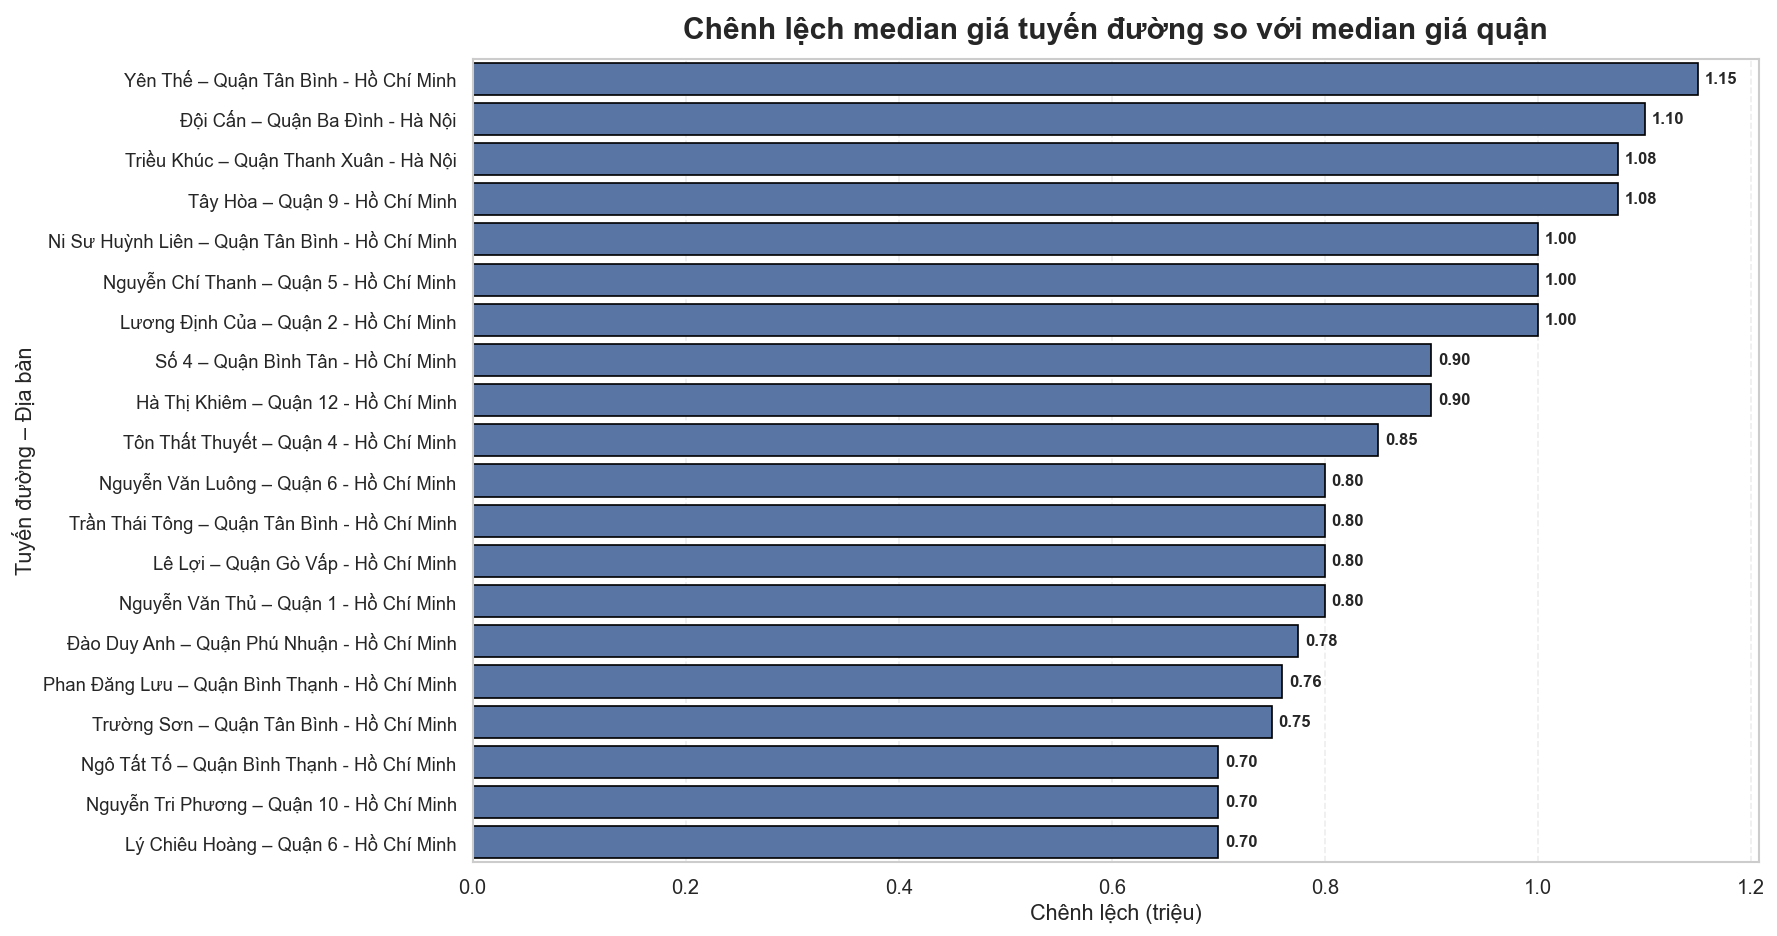

In [103]:
plot_street_delta_vs_district(
    top_delta=top_delta,
    district_col="address",
    street_col="street_name",
    delta_col="delta_vs_district",
    top_n=20
)


### **Phân tích & Nhận xét**

Bảng kết quả cho thấy **sự khác biệt rất lớn giữa giá phòng theo từng tuyến đường**, ngay cả khi nằm trong cùng một quận. Điều này nhấn mạnh rằng: **Địa chỉ (street-level location)** quan trọng không kém, thậm chí quan trọng **hơn cả quận**, khi đánh giá giá phòng trọ.

#### **1. Tuyến đường tăng giá mạnh nhất đều nằm ở quận có nhu cầu rất cao**

Những tuyến dẫn đầu chênh lệch:

| Tuyến đường | Quận | Delta |
|-------------|------|--------|
| **Yên Thế** | Tân Bình | **+1.15 triệu**  
| **Đội Cấn** | Ba Đình (HN) | **+1.10 triệu**  
| **Triều Khúc** | Thanh Xuân (HN) | **+1.08 triệu**  
| **Tây Hòa** | Quận 9 | **+1.08 triệu**  

**Giải thích:**
- Đây đều là **trục giao thông lớn**, đông dân cư, nhu cầu thuê cực cao.  
- Nhiều phòng **đời mới**, có nhiều tiện ích, phù hợp người đi làm / sinh viên.  
- Nhu cầu thuê cao dẫn đến giá bị đẩy lên cao.

**Ví dụ điển hình: Yên Thế – Quận Tân Bình**
- Gần sân bay Tân Sơn Nhất, các trường đại học Công Nghiệp và có công viên Gia Định khá lớn .  
- Người thuê ngắn hạn và dài hạn đều đông  
- Tiện ích gần như full: Ban công, thang máy, máy lạnh  
-> Không ngạc nhiên khi Yên Thế đứng đầu danh sách.

#### **2. Tuyến đường “đắt bất thường” so với mặt bằng quận**

Một số tuyến tuy **không thuộc quận đắt đỏ**, nhưng lại có chênh lệch cao:

**Lương Định Của – Quận 2 (+1.00 triệu)**
- Gần khu vực Thủ Thiêm – được quy hoạch thành "trung tâm mới của Sài Gòn"  
- Nhiều studio đẹp  
- Gần trung tâm  
→ Giá “vượt” mặt bằng quận

**Số 4 – Bình Tân (+0.90 triệu)**
- Bình Tân vốn rẻ nhưng phòng tại tuyến này:  
  - **Diện tích 52m²** (rất lớn)  
  - Tiện ích full  
  - Khu vực quy hoạch bài bản
→ Giá cao do **diện tích + chất lượng phòng**, không phải do vị trí.

#### **3. Diện tích cũng là một yếu tố đẩy giá**

Một số tuyến có diện tích trung bình lớn trong top:
- Số 4 (Bình Tân): **52.4 m²**  
- Lê Lợi (Gò Vấp): **39.8 m²**  
- Tây Hòa (Quận 9): **37.7 m²**

Trong khi các tuyến Quận 1 chỉ ~30 m².

→ **Diện tích cũng là một feature quan trọng khi xét chênh lệch giá giữa các tuyến đường.**

#### **4. Hà Nội xuất hiện khi xét “độ lệch giá”, dù không xuất hiện trong top địa bàn hoặc top tuyến đường**
Một điểm rất thú vị là:
- **Ở danh sách top địa bàn xuất hiện nhiều tin nhất → không có quận nào của Hà Nội hay địa phương khác.**  
- **Ở danh sách top tuyến đường xét theo giá median → cũng không có tên tuyến đường Hà Nội.**

Nhưng khi chuyển sang phân tích *chênh lệch giá tuyến đường so với mặt bằng quận*, **Hà Nội bất ngờ xuất hiện với 2 ứng viên:**
- **Đội Cấn – Quận Ba Đình** (+1.10 triệu)  
- **Triều Khúc – Quận Thanh Xuân** (+1.08 triệu)

Điều này cho thấy:

- Dù không phải nơi có nhiều tin đăng như TP.HCM,  
- Và cũng không phải nơi có các tuyến đường có median giá tuyệt đối cao nhất,  
- **Nhưng một số tuyến đường tại Hà Nội lại đắt “bất thường” so với chính quận của chúng.**

**Giải thích theo thực tế:**

- **Ba Đình và Thanh Xuân đều là khu trung tâm – lõi hành chính, kinh tế, giáo dục của Hà Nội**, nên mức giá phòng tăng mạnh ở các tuyến đường tập trung sinh viên, người đi làm, hoặc gần các tiện ích trọng điểm.
- Điều này phản ánh rằng **sự phân hóa giá trong nội bộ từng quận ở Hà Nội khá lớn**, đặc biệt ở các tuyến đường đông sinh viên (Triều Khúc) hoặc gần trung tâm hành chính (Đội Cấn).

#### **Kết luận**

| Yếu tố | Tác động |
|--------|----------|
| Địa bàn quận | ảnh hưởng giá tổng thể  
| Tuyến đường | quyết định giá cao hay thấp  
| Tiện ích đầy đủ | giúp tăng giá nhẹ nhưng giữ “chuẩn cao cấp”  
| Diện tích | tác động cao đến giá  
| Quận 2, Tân Bình, Bình Thạnh | nhiều tuyến đường “đắt vượt quận”  
| Quận ven (9, 12, Gò Vấp) | giá tăng mạnh nếu tuyến đường tập trung phòng đời mới  


Từ các nhận định trên ta có thể tạo các feature rất mạnh như:
- `street_median_price`  
- `delta_price_vs_district`  
- `is_hot_street` (1/0)  
- `amenity_score`  
- `area_bucket`  

Những feature này sẽ giúp mô hình **nhận diện phân khúc giá chính xác hơn rất nhiều**.

---

### **3.2.3. Giá phòng theo tiện ích**
Mặc dù ở phần tương quan ta đã thấy rằng tiện ích không có mối liên hệ tuyến tính mạnh với giá phòng, nhưng điều đó không đồng nghĩa với việc tiện ích không ảnh hưởng đến mức giá. **Tương quan chỉ đo mức độ tuyến tính, trong khi tác động của tiện ích thường mang tính phân khúc (categorical effect), không phải tuyến tính.**

Vì vậy, trong phần này ta tiếp tục kiểm tra xem: **Liệu các tiện ích có tạo ra sự khác biệt đáng kể về giá hay không?**

#### Cách làm:
1. **Chọn một số tiện ích quan trọng, dễ ảnh hưởng đến giá:**
   * mezzanine – gác lửng
   * balcony – ban công
   * elevator – thang máy
   * parking – chỗ để xe
   * air_conditioning – máy lạnh
   * kitchen – bếp

2. **Với từng tiện ích, tiến hành:**
   * Chia phòng thành nhóm **có (1/True)** và nhóm **không (0/False)**
   * **Tính thống kê:**
     * count, mean, median, q25, q75, min, max
   * **So sánh:**
     * Nhóm có tiện ích cao hơn bao nhiêu % so với nhóm không có
     * Mức độ chênh lệch median để xem tiện ích đó thực sự ảnh hưởng đến giá hay không

#### Ý nghĩa phân tích
Phân tích này giúp xác định:
* **Tiện ích nào thực sự làm tăng giá** → nên giữ lại khi xây dựng mô hình
* **Tiện ích nào chỉ mang tính cơ bản** → ít ảnh hưởng, có thể bỏ nếu cần giảm số lượng feature
* **Những tiện ích “tín hiệu mạnh”** giúp model dễ phân biệt phân khúc phòng (studio – gác – cao cấp)

In [104]:
amenities_for_price = [
    "air_conditioning",
    "fridge",
    "washing_machine",
    "mezzanine",
    "kitchen",
    "wardrobe",
    "bed",
    "balcony",
    "elevator",
    "free_time",
    "parking",
]

summary_amenity_effect = analyze_amenity_price_effect(
    df_price=df_price,
    amenity_cols=amenities_for_price,
    price_col="price"
)


Ảnh hưởng của từng tiện ích đến median giá phòng:


,Tiện ích,Số lượng (không có),Số lượng (có),Median (không),Median (có),Chênh lệch,Chênh lệch (%)
0,Balcony,18878.0,5184.0,3.6,4.1,0.5,13.89
1,Elevator,18739.0,5323.0,3.6,4.0,0.4,11.11
2,Fridge,18306.0,5756.0,3.6,4.0,0.4,11.11
3,Bed,17605.0,6457.0,3.7,4.0,0.3,8.11
4,Parking,21493.0,2569.0,3.7,4.0,0.3,8.11
5,Wardrobe,20452.0,3610.0,3.7,4.0,0.3,8.11
6,Free Time,14214.0,9848.0,3.8,3.8,0.0,0.00
7,Air Conditioning,11078.0,12984.0,3.8,3.7,-0.1,-2.63
8,Kitchen,14035.0,10027.0,3.8,3.7,-0.1,-2.63
9,Washing Machine,16358.0,7704.0,3.8,3.7,-0.1,-2.63


#### **Visualize**

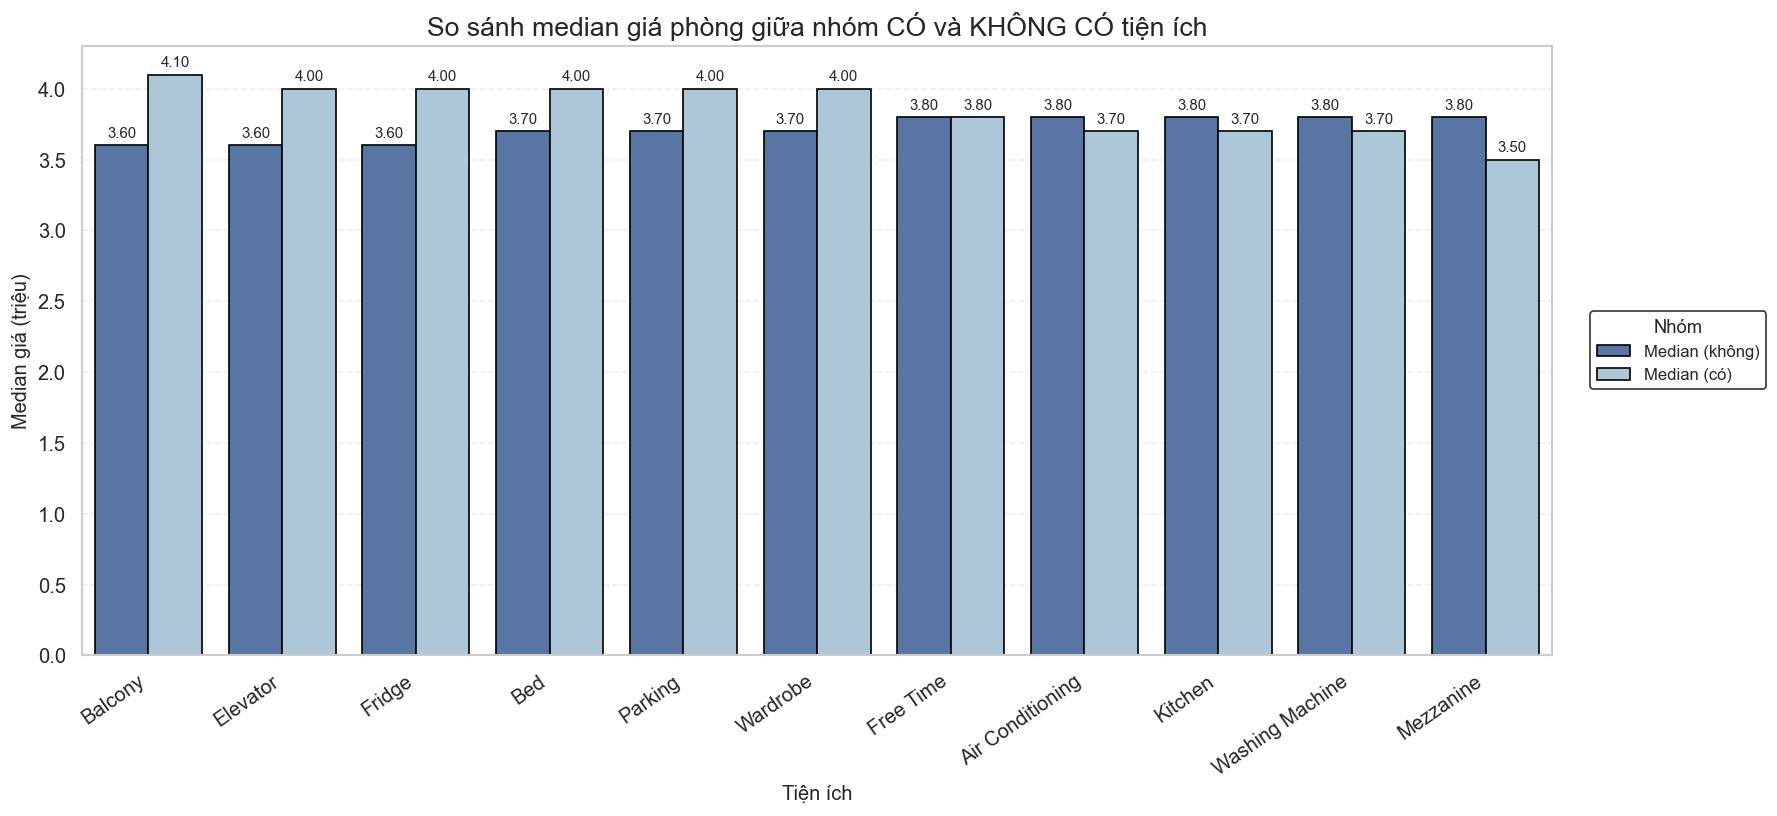

In [105]:
df_show = summary_amenity_effect.copy()

plot_median_price_yes_no_amenity(df_show)


#### **Phân tích & Nhận xét**

Kết quả cho thấy tất cả các tiện ích đều có chênh lệch giá nhỏ, đặt biệt nhiều tiện ích khiến median giá giảm thay vì tăng. Điều này dẫn đến một số kết luận quan trọng:

##### **1. Các tiện ích không làm giá phòng tăng lên thậm chí còn giảm**
Nhìn vào cột Chênh lệch (%), ta thấy:

| Tiện ích | Chênh lệch (%) |
| :--- | :--- |
| Balcony | 0.0% |
| Free Time | 0.0% |
| Kitchen | –2.63% |
| Parking | –5.13% |
| Air Conditioning | –7.5% |
| Fridge | –7.5% |
| Washing Machine | –7.5% |
| Mezzanine | –7.5% |
| Wardrobe | –7.5% |
| Bed | –7.5% |
| Elevator | –11.63% |

Không có tiện ích nào làm tăng median. Thậm chí **elevator (thang máy)** có mức chênh lệch âm mạnh nhất (–11.63%).

**Giải thích thực tế:**
- Các tiện ích này quá phổ biến, tỉ lệ sở hữu cao đến mức: “Có tiện ích” là tiêu chuẩn tối thiểu thời nay, không phải điểm cộng để tăng giá.
Mặc dù trực giác thường khiến ta nghĩ rằng **“có thêm tiện ích thì giá phải cao hơn”**, nhưng thực tế dữ liệu lại cho thấy điều ngược lại: **Nhiều tiện ích làm median giá giảm.** Lý do nằm ở cấu trúc phân bố địa lý của các loại phòng:
  * **Những phòng có nhiều tiện ích hiện đại** (gác lửng, thang máy, máy lạnh, máy giặt…) thường tập trung ở khu vực **vùng ven** — nơi quỹ đất rộng, tòa nhà mới, và các chủ trọ cạnh tranh bằng tiện ích để bù lại vị trí xa trung tâm.
  * **Ngược lại:** Những phòng **“không tiện ích”** (không thang máy, không parking, không bếp…) lại xuất hiện chủ yếu tại các khu vực **trung tâm** như Quận 1, Quận 3, Phú Nhuận — nơi vị trí đắt đỏ đến mức không cần đầu tư tiện ích mà giá vẫn cao.

 * **Kết hợp với các phân tích trước:**
    * Tiện ích có tương quan gần bằng 0 với giá, không phải yếu tố quyết định.
    * Giá phòng theo quận và theo tuyến đường cho thấy **vị trí là yếu tố chi phối mạnh nhất**.
    * Các quận trung tâm vốn có mức giá cơ bản cao hơn từ 20–50% so với vùng ven.

Vì vậy, khi so sánh median giữa nhóm có tiện ích và không tiện ích, ta đang vô tình so sánh:
1.  **Phòng vùng ven hiện đại** (nhiều tiện ích nhưng giá thấp hơn)
2.  **Phòng trung tâm nhỏ nhưng đắt** (ít tiện ích nhưng giá cao hơn nhờ vị trí)

**Nên việc median giảm ở nhóm “có tiện ích” là hiện tượng hoàn toàn hợp lý và phản ánh đúng thị trường.** Khi 80–95% phòng đều có tiện ích đó, nó không còn phân biệt phân khúc nữa, vì phòng không có tiện ích mới là “dị”.

##### **2. “Ban công” và “Free Time” có chênh lệch = 0**
* **Balcony:** 0.0%
* **Free Time:** 0.0%

**Ban công không tạo ra sự khác biệt về giá** vì đây không phải là một tiện ích “quyết định hành vi thuê”.
  * Người thuê nhà trọ thường ưu tiên các yếu tố như **diện tích – bếp – máy lạnh – vị trí – chỗ để xe** hơn là ban công.
  * Ban công chỉ làm phòng dễ chịu hơn, thoáng hơn, nhưng không phải là yếu tố khiến người thuê sẵn sàng trả thêm tiền.
 Do đó, việc có hay không ban công ít ảnh hưởng đến mức giá median.

**Free time (giờ giấc tự do)** cũng không tạo ra chênh lệch giá vì bản thân tiện ích này có ưu – nhược điểm cân bằng:
  * **Nếu ở chung chủ** (không free time) thì thông thường được an ninh tốt, trông coi kỹ, phù hợp với nhiều các người thuê có giờ giấc ổn định.
  * **Nếu tự do giờ giấc** thì thoải mái hơn nhưng đi kèm tự quản lý an ninh, môi trường “tự do hơn”, đôi khi kém ổn định hơn.

**Nhận xét:**
* Hai tiện ích này không hề giúp mô hình dự đoán giá.
* Hoặc chỉ nên dùng như feature binary tiêu chuẩn, không kỳ vọng nhiều thông tin.

##### **3. Đúc kết cho Feature Engineering (FE)**
* **Không nên kỳ vọng tiện ích giúp mô hình dự đoán giá tốt.** Nhìn vào thực tế ta có thể thấy tác động thực sự là nhỏ hoặc ngược nghĩa.

* **Tác động giá chủ yếu nằm ở:**
  * Vị trí quận
  * Tên đường
  * Diện tích
  * Đặc điểm mô tả (nội thất cao cấp, view đẹp, gần trung tâm, mới xây)

* **Nên kết hợp tiện ích theo dạng feature tổng hợp:**
  * `amenity_score` = tổng tiện ích
  * `is_premium_unit` = (elevator & balcony & kitchen)
  * `old_vs_new` = 1 nếu có washing_machine + elevator + free_time (phòng mới xây)

##### **Kết luận**
* Tiện ích không phải yếu tố quyết định giá. **Vị trí + diện tích mới là chủ đạo.**

* Tiện ích chủ yếu đại diện **loại hình phòng trò(truyền thống - hiện đại)**, không còn là tiêu chí để định hinh giá trị phòng.
Nhìn vào bảng số liệu, ta thấy giá phòng ở TP.HCM hiện đại hóa ở mức cao đến nỗi tiện ích không còn là điểm phân biệt mạnh, mà chỉ đóng vai trò mô tả “phòng hiện đại” hay “phòng truyền thống” thậm chí nếu không có còn được coi là "kì lạ".

---

## **Initial Observations & Insights**

### **1. Thị trường cho thuê tập trung gần như hoàn toàn ở TP.HCM**
* **Top 10 địa bàn có nhiều tin nhất** đều là quận thuộc TP.HCM: Bình Thạnh, Tân Bình, Gò Vấp, Tân Phú, Quận 7, Quận 12, Quận 10, Bình Tân, Quận 9, Phú Nhuận.
* Các huyện/thị xã ở tỉnh khác (Hậu Giang, Hà Giang, Bạc Liêu, Quảng Trị,…) chỉ có 1 tin, mang tính “điểm xuyết”.
* **Ý nghĩa:**
    * Dataset thực chất đang phản ánh thị trường thuê trọ TP.HCM là chính, các tỉnh/thành khác chỉ đóng vai trò “rìa dữ liệu”.
    * Mọi kết luận về giá, tiện ích, phân khúc… chỉ nên diễn giải cho bối cảnh đô thị lớn (đặc biệt là TP.HCM), không nên khái quát cho cả nước.
    * Trong modeling, nếu đưa cả các tỉnh khác vào mà không xử lý, mô hình sẽ ngầm thiên lệch về TP.HCM (class imbalance theo vùng). Khả năng rất cao ta sẽ chuyển về bài toán dự đoán giá thuê ở khu vực Thành phố Hồ Chí Minh.

### **2. Giá phòng không phụ thuộc tuyến tính vào diện tích hay tiện ích**
* **Kết quả từ ma trận tương quan:**
    * `price ↔ amenities`: khoảng –0.04 → 0.05 → gần như không liên quan tuyến tính.
    * `area ↔ amenities` ≈ 0.
    * `price ↔ area` ≈ 0.085 (rất yếu).
* **Kết luận:**
    * Thêm 1–2 tiện ích như `air_conditioning`, `washing_machine`, `kitchen`, `balcony` không làm giá tăng theo kiểu tuyến tính.
    * Diện tích cũng không phải yếu tố quyết định chính: một phòng 18–20m² ở Quận 1 cũng có thể đắt hơn căn 30–40m² ở quận ven.
* **Điều này hoàn toàn khớp với thực tế:**
    * Ở Sài Gòn, “vị trí” và “phân khúc tòa nhà” thường quyết định giá, chứ không phải mỗi 1m² thêm vào hay thêm 1 cái tủ lạnh.
* **Khi modeling:**
    * Không nên kỳ vọng mô hình tuyến tính đơn giản (Linear, ElasticNet…) với feature chính là `area` + `amenities` sẽ dự đoán giá tốt.
    * Cần: Feature về location (quận, đường, cụm khu vực), Feature phân khúc (full nội thất, căn hộ mini, trọ truyền thống), và mô hình phi tuyến (tree-based, boosted trees,…).

### **3. Tiện ích không định giá trực tiếp, nhưng thể hiện “phân khúc phòng”**
#### 3.1. Các cluster tiện ích rất rõ ràng
Từ các hệ số tương quan giữa tiện ích:
* **Cụm full nội thất:**
    * `fridge ↔ wardrobe`: ~0.81
    * `bed ↔ wardrobe`: ~0.72
    * `bed ↔ fridge`: ~0.63
    * `washing_machine ↔ fridge`: ~0.58
    * `air_conditioning ↔ bed`: ~0.55
    * → Khi chủ trọ đã trang bị thì thường chơi “combo” chứ không trang bị lẻ tẻ.
* **Cụm căn hộ / chung cư mini:**
    * `balcony ↔ bed/wardrobe/fridge`: khoảng 0.35–0.40
    * `elevator ↔ mezzanine/washing_machine`: khoảng 0.24–0.37
    * → Ban công + thang máy + máy giặt thường đi kèm với dạng căn hộ mini / chung cư nhiều tầng.
* `free_time` (giờ giấc tự do) cũng tương quan nhẹ với `washing_machine`, `parking`, `fridge`, `kitchen` → phòng tự do giờ giấc có xu hướng nằm trong tòa nhà tiện nghi hơn.
* **Ý nghĩa:**
    * Tiện ích không “tăng giá 200k – 300k” theo kiểu cộng dồn, mà: Định nghĩa phân khúc: trọ bình dân, full nội thất, căn hộ dịch vụ.
    * Phù hợp dùng để gán nhãn phân khúc hoặc làm feature cho clustering / segmentation.

### **4. “Vị trí” là yếu tố chi phối mạnh nhất: từ quận → đường → chênh lệch so với quận**
#### 4.1. Theo quận (address)
* Nhóm trung tâm / cận trung tâm (Bình Thạnh, Phú Nhuận, Quận 7, Quận 10) có median price từ 4–5 triệu.
* Nhóm ven (Gò Vấp, Tân Phú, Quận 9, Quận 12, Bình Tân) có median ≈ 3 triệu, giá mềm hơn nhưng tiện ích lại rất tốt.
* **Đặc biệt:**
    * **Bình Thạnh:** Median ≈ 5 triệu – cao nhất nhóm. `q25–q75` ~ 4–6 triệu → mặt bằng giá ổn định nhưng vẫn có outlier cao (studio, căn hộ mini gần trung tâm).
    * **Bình Tân:** Median mềm, nhưng max lên tới 260 triệu → outlier rõ ràng.

#### 4.2. Theo tuyến đường (street)
* Khi đi sâu xuống `street_name`: Top 20 tuyến có median giá cao nhất phần lớn nằm ở:
    * Quận 1 (Nguyễn Văn Thủ, Hai Bà Trưng, Cống Quỳnh, Nguyễn Thị Minh Khai, Võ Thị Sáu,…)
    * Bình Thạnh (Phan Đăng Lưu, Bùi Hữu Nghĩa, Ngô Tất Tố, Nơ Trang Long, Nguyễn Gia Trí,…)
* Median đường ~5.2–6.0 triệu, cao hơn rõ rệt so với median quận (thường chỉ 3–4 triệu).
* **Một điều đặc biệt:** Quận 1 không xuất hiện trong top quận nhiều tin, nhưng khi xét tuyến đường đắt nhất thì Quận 1 lại chiếm tỷ trọng lớn → do diện tích quận nhỏ, phòng trọ tập trung vào vài tuyến “đinh”, nhưng những tuyến này lại cực kỳ đắt.

#### 4.3. Delta vs district – khi “sốc giá” xuất hiện
* Khi so sánh median_price của tuyến đường với district_median: Các tuyến như Yên Thế, Ni Sư Huỳnh Liên (Tân Bình), Lương Định Của (Quận 2), Tây Hòa (Quận 9), Nguyễn Văn Thủ (Q1)… có `delta_vs_district` từ +0.7 đến +1.15 triệu.
* **Đặc biệt thú vị:** Khi xét top địa bàn và top street theo giá tuyệt đối → không thấy HN xuất hiện. Nhưng khi xét chênh lệch tuyến đường so với quận, xuất hiện 2 cái tên từ Hà Nội:
    * Đội Cấn – Ba Đình
    * Triều Khúc – Thanh Xuân
    * → Đây là những tuyến đắt “bất thường” so với chính quận của nó.
* **Ý nghĩa:**
    * Đường phố (street-level) chứa rất nhiều thông tin về “độ hot” của khu vực.
    * `delta_price_vs_district` là một feature cực mạnh để nhận diện “hot street” và điều chỉnh giá so với mặt bằng chung.

### **5. Tiện ích gần như không làm giá tăng – thậm chí nhóm “có tiện ích” còn rẻ hơn**
* **Khi so sánh median giá có / không tiện ích:** Không tiện ích nào làm median tăng lên, nhiều cái còn làm median giảm 5–10%:
    * `Elevator`: –11.6%
    * `Air_conditioning`, `fridge`, `washing_machine`, `mezzanine`, `wardrobe`, `bed`: khoảng –7.5%
    * `Kitchen`, `parking`: chênh lệch âm nhẹ
    * `Balcony`, `free_time`: ~0%
* **Như đã giải thích bên trên:**
    * **Phòng có nhiều tiện ích:** Tập trung ở quận ven (Quận 9, 12, Gò Vấp, Tân Phú,…). Được xây mới, có thang máy, máy giặt, full nội thất để bù cho vị trí xa trung tâm cho nên giá vẫn "mềm".
    * **Phòng không nhiều tiện ích:** Tập trung nhiều hơn ở quận trung tâm (Q1, Q3, Phú Nhuận, Bình Thạnh). Dù thiếu tiện ích nhưng vị trí quá ngon nên giá vẫn cao.
* **Do đó:** Khi nhìn thuần tuý theo tiện ích, ta thấy “có tiện ích” lại rẻ hơn “không tiện ích” là chuyện hoàn toàn hợp lý. Tiện ích không phải là công cụ chính của giá, mà bị “vị trí đè giá”.
* **Ý nghĩa cho FE & modeling:** Tiện ích không phù hợp để dùng như “feature định giá trực tiếp”. Nhưng lại rất phù hợp để phân khúc loại phòng (bình dân / full nội thất / căn hộ mini) hoặc ước lượng “đời phòng” (phòng mới hay cũ, nhà xây mới hay nhà lâu năm).

### **Kết luận**
Từ toàn bộ các phân tích trên, có thể tóm tắt:
1.  **Location is king:** Từ quận → đường → “độ lệch so với quận”, tất cả đều cho thấy vị trí là nhân tố chi phối mạnh nhất đến giá. HCM là “trọng tâm dữ liệu”, các tỉnh khác chỉ là phụ.
2.  **Tiện ích phản ánh phân khúc, không định giá tuyến tính:** Full nội thất & căn hộ mini tạo thành các cluster rất rõ trong ma trận tương quan. Nhưng ảnh hưởng đến giá bị lấn át bởi vị trí.
3.  **Quận ven (tiện ích tốt, giá mềm) vs Quận trung tâm (tiện ích ít hơn, giá cao):** Giải thích vì sao median nhóm “có tiện ích” lại thấp hơn nhóm “không tiện ích”.
4.  **Tuyến đường là đơn vị phân giải rất tốt:** Cùng quận nhưng tuyến đường chênh nhau 0.5–1.5 triệu là chuyện bình thường. `street_median_price` và `delta_vs_district` là hai feature cực kỳ tiềm năng.
5.  **Feature Engineering nên xoay quanh:**
    * `district_median_price`, `street_median_price`, `delta_price_vs_district`
    * `amenity_score`, `is_full_furnished`, `is_apartment_like`
    * `area_bucket`, `center_vs_suburb`

---

## **Red Flags**

### 1. Data imbalance rất lớn giữa TP.HCM và các tỉnh khác
* TP.HCM chiếm gần như toàn bộ tin đăng. Nhiều huyện/tỉnh chỉ có 1–2 dòng → thống kê theo các địa bàn này không đáng tin.
* **Hệ quả:** Mô hình học ra sẽ thiên về hành vi thị trường ở TP.HCM. Nếu deploy cho tỉnh/thành khác → kết quả dự đoán có thể sai lệch lớn.

### 2. Nhiều quận/huyện & tuyến đường có số mẫu rất nhỏ
* Một số quận/tỉnh chỉ có vài tin → median, mean, q25, q75… rất dễ nhiễu.
* Một số tuyến đường trong phân tích giá theo street phải lọc bằng ngưỡng `min_ads_street`, `min_ads_pair` mới đủ tin.
* **Hệ quả:** Nếu không lọc kỹ, các bảng thống kê dễ bị chi phối bởi các nhóm quá nhỏ. Trong modeling, các category hiếm (address, street_name) sẽ khó học và dễ gây overfitting.

### 3. Outlier giá & area
* Các giá như 0 hoặc 260 triệu rõ ràng là lỗi nhập liệu (thiếu số, thừa số 0).
* Một số phòng có diện tích bất thường so với mặt bằng (quá nhỏ/quá lớn).
* **Hệ quả:** Gây lệch phân phối price/area, đặc biệt là khi dùng scale theo min–max hoặc mô hình nhạy cảm với outlier (Linear, KNN,…).
* **Cần:** Bỏ các giá 0, clipping khoảng giá hợp lý, kiểm tra rule-based cho các giá quá cao.

### 4. Vấn đề chuẩn hóa địa chỉ và tên đường
* Một số lỗi trong address như: “Quận 6 - H Chí Minh” vs “Quận 6 - Hồ Chí Minh”.
* Một số `street_name` bị lỗi, viết tắt, sai chính tả.
* **Hệ quả:** Làm nổ category không cần thiết (2 chuỗi khác nhau nhưng thực chất là 1 địa điểm). Giảm chất lượng các feature như `street_median_price`, `delta_vs_district`.
* **Cần:** Bước clean & standardize mạnh cho tên tỉnh/thành, quận/huyện và tên đường (chính tả, viết tắt, dấu).

### 5. Multicollinearity giữa các tiện ích
* Các tiện ích nội thất (`AC`, `fridge`, `washing_machine`, `kitchen`, `wardrobe`, `bed`) tương quan rất mạnh với nhau. Dễ gây đa cộng tuyến nếu dùng trong các mô hình tuyến tính.
* **Hệ quả:** Hệ số ước lượng của mô hình Linear/Logistic có thể không ổn định. Khó giải thích từng tiện ích riêng lẻ.
* **Đề xuất:** Gộp thành 1–2 feature tổng hợp (ví dụ: `amenity_count`, `is_full_furnished`) thay vì dùng từng cột thô.

### 6. Ý nghĩa thực tế & giới hạn của dataset
* Data phản ánh rất đúng thực tế Sài Gòn: Tiện ích đã “chuẩn hóa”, vị trí mới là thứ định giá, các quận ven bù vị trí bằng chất lượng phòng.
* **Nhưng:**
    * Không đủ phong phú để đại diện cho toàn bộ thị trường nhà trọ Việt Nam (nông thôn, thị trấn, các thành phố nhỏ).
    * Thiếu toạ độ (lat/lng), thiếu loại hình nhà (chung cư, nhà nguyên căn, phòng trọ…).